In [1]:
import os
from os.path import exists, join
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np
from collections import Counter

import sys
sys.path.append('../../..')
# from miit.reg_graph import RegGraph
import json

In [2]:
def get_sp_stats(df, col1, col2, corr_type='s'):
    if corr_type == 's':
        sp_corr = scipy.stats.spearmanr(df[col1], df[col2])
    else:
        sp_corr = scipy.stats.pearsonr(df[col1], df[col2])
    result = {
        'statistic': sp_corr.statistic,
        'pvalue': sp_corr.pvalue,
        'n': df.shape[0]
    }
    return pd.DataFrame(result, index=[0])

def preprocess(df, sort_by_recurrence=True):
    # First renaming
    if sort_by_recurrence:
        df = df.sort_values('recurrence')
    df.loc[df.unified_hp_class == 'Non-cancer glands', 'unified_hp_class'] = 'Gland'
    df.loc[df.msi_hist == 'Non-cancer glands', 'msi_hist'] = 'Gland'
    df.loc[df['Histology Class'] == 'Non-cancer glands', 'Histology Class'] = 'Gland'
    # hist_classes = ['Stroma', 'Non-cancer glands']
    hist_classes = ['Stroma', 'Gland']
    df = df[df.unified_hp_class.isin(hist_classes)]
    df = df[df.adjusted_core_type == 'n']
    return df

def preprocess_2(df):
    df = df[df.unified_hp_class == df.msi_hist]
    return df

def to_new_id(row):
    p_id = row['New_patient']
    if len(p_id) == 2:
        new_p_id = p_id[0] + '0' + p_id[1]
    else:
        new_p_id = p_id
    return new_p_id + '_' + str(row['Samp_nr'])

def fix_patient_id(row):
    s_id = row['Sample ID']
    s_id = s_id.replace(' ', '_')
    s_id = s_id.replace('.', '_')
    return s_id

In [3]:
# df = pd.read_csv('../metadata_big_final.csv')
df = pd.read_csv('../../../../spami/analysis/metadata_big_final.csv')

In [4]:
new_sid_df = pd.read_csv('../../../../spami/analysis/new_sample_id.tsv', sep='\t')
new_sid_df['new_sample_id'] = new_sid_df.apply(lambda x: to_new_id(x), axis=1)
metadata_df = pd.read_csv('../../../../spami/analysis/metadata_big_final.csv')
metadata_df['fixed_sample_id'] = metadata_df.apply(lambda x: fix_patient_id(x), axis=1)
metadata_df = metadata_df.merge(new_sid_df, left_on='fixed_sample_id', right_on='Sample ID')
metadata_df.head(2)

Sample ID_x adjusted_core_type  Round nr Square (a-d) on slide    type  \
0  PS D008.c2                  c        47                     a  Cancer   
1  PS D004.c6                  c        47                     b  Cancer   

   recurrence patient_id core_name st_identifier_y correct_st_identifier  \
0     control    PS_D008    047_01    V10A20_007_1          V10A20_007_A   
1  recurrence    PS_D004    047_02    V10A20_007_2          V10A20_007_B   

  fixed_sample_id Sample ID_y New_samp Patient New_patient  Samp_nr  slide  \
0      PS_D008_c2  PS_D008_c2    P28_2    D008         P28        2     47   
1      PS_D004_c6  PS_D004_c6    P27_3    D004         P27        3     47   

  position new_sample_id  
0        a         P28_2  
1        b         P27_3

In [5]:
# Set up all path
# merged_neg_correct_df = pd.read_csv('st_msi_meta_big_correct_data.csv')
# merged_neg_wrong_df = pd.read_csv('st_msi_meta_big_wrong_data.csv')
# merged_pos_correct_df = pd.read_csv('st_msi_pos_meta_big_correct_data.csv')
# merged_pos_wrong_df = pd.read_csv('st_msi_pos_meta_big_wrong_data.csv')
import pandas as pd

# merged_neg_correct_df = pd.read_csv('/mnt/scratch/maximilw/data/global_integration_files/merged_st_msi_neg.csv', index_col=0)
# merged_neg_wrong_df = pd.read_csv('/mnt/scratch/maximilw/data/global_integration_files/artificial_merged_st_msi_neg.csv', index_col=0)
# merged_pos_correct_df = pd.read_csv('/mnt/scratch/maximilw/data/global_integration_files/merged_st_msi_pos.csv', index_col=0)
# merged_pos_wrong_df = pd.read_csv('/mnt/scratch/maximilw/data/global_integration_files/artificial_merged_st_msi_pos.csv', index_col=0)

merged_neg_correct_df = pd.read_csv('/mnt/scratch/maximilw/data/paper1/data_to_analyze/st_msi_neg_correct.csv', index_col=0)
merged_neg_wrong_df = pd.read_csv('/mnt/scratch/maximilw/data/paper1/data_to_analyze/st_msi_neg_artificial.csv', index_col=0)
merged_pos_correct_df = pd.read_csv('/mnt/scratch/maximilw/data/paper1/data_to_analyze/st_msi_pos_correct.csv', index_col=0)
merged_pos_wrong_df = pd.read_csv('/mnt/scratch/maximilw/data/paper1/data_to_analyze/st_msi_pos_artificial.csv', index_col=0)


In [6]:
merged_neg_correct_df['Histology Class'] = merged_neg_correct_df['unified_hp_class']
merged_neg_wrong_df['Histology Class'] = merged_neg_wrong_df['unified_hp_class']
merged_pos_correct_df['Histology Class'] = merged_pos_correct_df['unified_hp_class']
merged_pos_wrong_df['Histology Class'] = merged_pos_wrong_df['unified_hp_class']

In [7]:
merged_neg_correct_df_red = preprocess(merged_neg_correct_df)
merged_neg_wrong_df_red = preprocess(merged_neg_wrong_df)
merged_pos_correct_df_red = preprocess(merged_pos_correct_df)
merged_pos_wrong_df_red = preprocess(merged_pos_wrong_df)

In [8]:
merged_neg_correct_df_red2 = preprocess_2(merged_neg_correct_df_red)
merged_neg_wrong_df_red2 = preprocess_2(merged_neg_wrong_df_red)
merged_pos_correct_df_red2 = preprocess_2(merged_pos_correct_df_red)
merged_pos_wrong_df_red2 = preprocess_2(merged_pos_wrong_df_red)

In [9]:
merged_neg_correct_df_red.shape, merged_neg_correct_df_red2.shape

((3834, 52), (2538, 52))

In [10]:
merged_pos_correct_df_red.shape, merged_pos_correct_df_red2.shape

((3780, 43), (2534, 43))

In [11]:
merged_neg_correct_df_red2.shape, merged_neg_wrong_df_red2.shape

((2538, 52), (1869, 52))

## Plot correlations core wise

In [12]:
merged_neg_correct_df_red2['Histology Class'].unique()

array(['Stroma', 'Gland'], dtype=object)

In [13]:
merged_neg_correct_df.shape, merged_neg_correct_df_red.shape, merged_neg_correct_df_red2.shape

((4296, 52), (3834, 52), (2538, 52))

In [14]:
def get_basic_stats(df, src_col, dst_col, c_type='s', group_col='core_name'):
    df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))
    return df_

src_col = 'Citsper'
dst_neg_col = 'Citrate'
dst_neg_col2 = 'Zinc'
dst_pos_col = 'Spermine'
c_type = 's'

nc_1_cit_core_sp_stats = get_basic_stats(merged_neg_correct_df_red, src_col, dst_neg_col, c_type)
nw_1_cit_core_sp_stats = get_basic_stats(merged_neg_wrong_df_red, src_col, dst_neg_col, c_type)
nc_1_zinc_core_sp_stats = get_basic_stats(merged_neg_correct_df_red, src_col, dst_neg_col2, c_type)
nw_1_zinc_core_sp_stats = get_basic_stats(merged_neg_wrong_df_red, src_col, dst_neg_col2, c_type)
pc_1_spe_core_sp_stats = get_basic_stats(merged_pos_correct_df_red, src_col, dst_pos_col, c_type)
pw_1_spe_core_sp_stats = get_basic_stats(merged_pos_wrong_df_red, src_col, dst_pos_col, c_type)

nc_2_cit_core_sp_stats = get_basic_stats(merged_neg_correct_df_red2, src_col, dst_neg_col, c_type)
nw_2_cit_core_sp_stats = get_basic_stats(merged_neg_wrong_df_red2, src_col, dst_neg_col, c_type)
nc_2_zinc_core_sp_stats = get_basic_stats(merged_neg_correct_df_red2, src_col, dst_neg_col2, c_type)
nw_2_zinc_core_sp_stats = get_basic_stats(merged_neg_wrong_df_red2, src_col, dst_neg_col2, c_type)
pc_2_spe_core_sp_stats = get_basic_stats(merged_pos_correct_df_red2, src_col, dst_pos_col, c_type)
pw_2_spe_core_sp_stats = get_basic_stats(merged_pos_wrong_df_red2, src_col, dst_pos_col, c_type)

# w_core_sp_stats_f = w_spot_annotations_df_merged_matching_f.groupby('core_name').apply(lambda x: get_sp_stats(x, 'Citsper', 'met_median_Citrate'))
# core_sp_stats_f = spot_annotations_df_merged_matching_f.groupby('core_name').apply(lambda x: get_sp_stats(x, 'Citsper', 'met_Citrate'))
# all_stats_1 = pd.concat([core_sp_stats_f.rename(columns={x: x + '_correct' for x in core_sp_stats_f.columns}), w_core_sp_stats_f.rename(columns={x: x + '_wrong' for x in w_core_sp_stats_f.columns})], axis=1)
# all_stats_1.index = [x[0] for x in all_stats_1.index]

/mnt/scratch/tmp/ipykernel_24015/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))
/mnt/scratch/tmp/ipykernel_24015/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))
/mnt/scratch/tmp/ipykern

In [15]:
def merge_correct_and_wrong(df1, df2):
    df3 = pd.concat([df1.rename(columns={x: x + '_correct' for x in df1.columns}), df2.rename(columns={x: x + '_wrong' for x in df2.columns})], axis=1)
    return df3


In [16]:
a1_cit_merged_df = merge_correct_and_wrong(nc_1_cit_core_sp_stats, nw_1_cit_core_sp_stats)
a1_zinc_merged_df = merge_correct_and_wrong(nc_1_zinc_core_sp_stats, nw_1_zinc_core_sp_stats)
a1_spe_merged_df = merge_correct_and_wrong(pc_1_spe_core_sp_stats, pw_1_spe_core_sp_stats)
a2_cit_merged_df = merge_correct_and_wrong(nc_2_cit_core_sp_stats, nw_2_cit_core_sp_stats)
a2_zinc_merged_df = merge_correct_and_wrong(nc_2_zinc_core_sp_stats, nw_2_zinc_core_sp_stats)
a2_spe_merged_df = merge_correct_and_wrong(pc_2_spe_core_sp_stats, pw_2_spe_core_sp_stats)

In [17]:
a2_zinc_merged_df

statistic_correct  pvalue_correct  n_correct  statistic_wrong  \
core_name                                                                    
001_04    0           0.381542    1.238627e-12        323         0.360405   
002_01    0           0.516194    2.038319e-28        397         0.384841   
003_02    0           0.016691    8.196767e-01        189         0.201843   
004_03    0           0.266109    2.769443e-07        362         0.108535   
045_03    0           0.454575    2.601039e-30        568         0.149560   
047_04    0           0.490220    1.175376e-26        418         0.485560   
048_02    0           0.364105    3.100740e-10        281        -0.021154   

             pvalue_wrong  n_wrong  
core_name                           
001_04    0  3.888540e-10      284  
002_01    0  1.592381e-12      314  
003_02    0  1.678010e-02      140  
004_03    0  8.185637e-02      258  
045_03    0  4.513171e-03      359  
047_04    0  4.217768e-21      333  
048_02    0  7.774355e-01      181

In [18]:
a2_cit_merged_df

statistic_correct  pvalue_correct  n_correct  statistic_wrong  \
core_name                                                                    
001_04    0           0.564231    1.513401e-28        323         0.342934   
002_01    0           0.613349    2.166576e-42        397         0.328816   
003_02    0           0.083298    2.544755e-01        189         0.127444   
004_03    0           0.276095    9.344658e-08        362         0.070732   
045_03    0           0.527788    4.694456e-42        568         0.305336   
047_04    0           0.598520    5.607112e-42        418         0.464828   
048_02    0           0.400269    3.090669e-12        281        -0.035760   

             pvalue_wrong  n_wrong  
core_name                           
001_04    0  2.944270e-09      284  
002_01    0  2.369165e-09      314  
003_02    0  1.334740e-01      140  
004_03    0  2.576207e-01      258  
045_03    0  3.488929e-09      359  
047_04    0  2.972758e-19      333  
048_02    0  6.327079e-01      181

In [19]:
a2_spe_merged_df

statistic_correct  pvalue_correct  n_correct  statistic_wrong  \
core_name                                                                    
001_04    0           0.518806    1.386870e-23        322         0.343911   
002_01    0           0.625631    1.191510e-43        389         0.323724   
003_02    0           0.371682    1.108729e-07        192        -0.157983   
004_03    0           0.283562    2.399408e-08        374         0.114969   
045_03    0           0.503048    2.444988e-38        577         0.372743   
047_04    0           0.551335    6.003603e-33        397         0.414301   
048_02    0           0.489775    1.763732e-18        283         0.029014   

             pvalue_wrong  n_wrong  
core_name                           
001_04    0  6.113947e-09      271  
002_01    0  1.130258e-08      297  
003_02    0  5.431836e-02      149  
004_03    0  6.626927e-02      256  
045_03    0  2.422370e-13      361  
047_04    0  5.398765e-15      327  
048_02    0  7.022758e-01      176

## Analyze correlation between spe and cit,zinc

In [20]:
# merged_neg_correct_df_red2.set_index('copy_index', inplace=True)
# merged_pos_correct_df_red2.set_index('copy_index', inplace=True)
idxs_intersection = merged_neg_correct_df_red2.index.intersection(merged_pos_correct_df_red2.index)
idxs_intersection.shape


(2337,)

In [21]:
unique_cols = [x for x in merged_pos_correct_df_red2.columns if x not in merged_neg_correct_df_red2.columns]

In [22]:
match_pos_neg_df = merged_neg_correct_df_red2.loc[idxs_intersection].copy()
match_pos_neg_df = pd.concat([match_pos_neg_df, merged_pos_correct_df_red2.loc[idxs_intersection, unique_cols]], axis=1)
match_pos_neg_df

unified_hp_class adjusted_core_type  \
V19S23_002_A_ATGGGCCTCGGCCTCT-1           Stroma                  n   
V19S23_002_A_CAATGGATCTCTACCA-1           Stroma                  n   
V19S23_002_A_CAATTAAGGGTGATGA-1           Stroma                  n   
V19S23_002_A_CACAATGAGCTGCTAT-1           Stroma                  n   
V19S23_002_A_CACACGCGCTGTCTTA-1           Stroma                  n   
...                                          ...                ...   
V10A20_009_B_CGAGTTCTGTCCCACC-1            Gland                  n   
V10A20_009_B_CGATACCTCGCGGACA-1            Gland                  n   
V10A20_009_B_CGCACATGTCCACTAC-1           Stroma                  n   
V10A20_009_B_CGCATGGTGCGATGCT-1           Stroma                  n   
V10A20_009_B_GAGTCCGCTTACCGGA-1           Stroma                  n   

                                    Citsper st_identifier             barcode  \
V19S23_002_A_ATGGGCCTCGGCCTCT-1  -41.816877  V19S23_002_A  ATGGGCCTCGGCCTCT-1   
V19S23_002_A_CAATGGATCTCTACCA-1   15.047291  V19S23_002_A  CAATGGATCTCTACCA-1   
V19S23_002_A_CAATTAAGGGTGATGA-1  164.664305  V19S23_002_A  CAATTAAGGGTGATGA-1   
V19S23_002_A_CACAATGAGCTGCTAT-1   79.472576  V19S23_002_A  CACAATGAGCTGCTAT-1   
V19S23_002_A_CACACGCGCTGTCTTA-1   -1.242437  V19S23_002_A  CACACGCGCTGTCTTA-1   
...                                     ...           ...                 ...   
V10A20_009_B_CGAGTTCTGTCCCACC-1   95.012898  V10A20_009_B  CGAGTTCTGTCCCACC-1   
V10A20_009_B_CGATACCTCGCGGACA-1  157.450283  V10A20_009_B  CGATACCTCGCGGACA-1   
V10A20_009_B_CGCACATGTCCACTAC-1  -36.365931  V10A20_009_B  CGCACATGTCCACTAC-1   
V10A20_009_B_CGCATGGTGCGATGCT-1  -26.809028  V10A20_009_B  CGCATGGTGCGATGCT-1   
V10A20_009_B_GAGTCCGCTTACCGGA-1   58.753461  V10A20_009_B  GAGTCCGCTTACCGGA-1   

                                correct_st_identifier core_name  recurrence  \
V19S23_002_A_ATGGGCCTCGGCCTCT-1          V19S23_002_A    002_01     control   
V19S23_002_A_CAATGGATCTCTACCA-1          V19S23_002_A    002_01     control   
V19S23_002_A_CAATTAAGGGTGATGA-1          V19S23_002_A    002_01     control   
V19S23_002_A_CACAATGAGCTGCTAT-1          V19S23_002_A    002_01     control   
V19S23_002_A_CACACGCGCTGTCTTA-1          V19S23_002_A    002_01     control   
...                                               ...       ...         ...   
V10A20_009_B_CGAGTTCTGTCCCACC-1          V10A20_009_B    048_02  recurrence   
V10A20_009_B_CGATACCTCGCGGACA-1          V10A20_009_B    048_02  recurrence   
V10A20_009_B_CGCACATGTCCACTAC-1          V10A20_009_B    048_02  recurrence   
V10A20_009_B_CGCATGGTGCGATGCT-1          V10A20_009_B    048_02  recurrence   
V10A20_009_B_GAGTCCGCTTACCGGA-1          V10A20_009_B    048_02  recurrence   

                                   type patient_id  ...  PC (36:4)  PC (36:2)  \
V19S23_002_A_ATGGGCCTCGGCCTCT-1  Normal    PS_A004  ...   3.203598   8.475282   
V19S23_002_A_CAATGGATCTCTACCA-1  Normal    PS_A004  ...   3.141997  10.492858   
V19S23_002_A_CAATTAAGGGTGATGA-1  Normal    PS_A004  ...   3.717644  13.696252   
V19S23_002_A_CACAATGAGCTGCTAT-1  Normal    PS_A004  ...   3.441063  12.652351   
V19S23_002_A_CACACGCGCTGTCTTA-1  Normal    PS_A004  ...   2.806029   9.323074   
...                                 ...        ...  ...        ...        ...   
V10A20_009_B_CGAGTTCTGTCCCACC-1  Normal    PS_C003  ...   7.951388  18.014982   
V10A20_009_B_CGATACCTCGCGGACA-1  Normal    PS_C003  ...   3.366359  10.157199   
V10A20_009_B_CGCACATGTCCACTAC-1  Normal    PS_C003  ...   6.327328   4.874830   
V10A20_009_B_CGCATGGTGCGATGCT-1  Normal    PS_C003  ...   4.239188   3.416067   
V10A20_009_B_GAGTCCGCTTACCGGA-1  Normal    PS_C003  ...   5.882319   4.802031   

                                 PC (36:1)  PC (36:4)_1  PC (36:3)  \
V19S23_002_A_ATGGGCCTCGGCCTCT-1   6.039750     7.972848   8.262280   
V19S23_002_A_CAATGGATCTCTACCA-1   5.020889     7.792337   6.886548   
V19S23_002_A_CAATTAAGGGTGATGA-1   6.907041     7.443066   7.710362   
V19S

In [23]:
nc_2_cit_core_sp_stats.index = [x[0] for x in nc_2_cit_core_sp_stats.index]
nw_2_cit_core_sp_stats.index = [x[0] for x in nw_2_cit_core_sp_stats.index]
nc_1_cit_core_sp_stats.index = [x[0] for x in nc_1_cit_core_sp_stats.index]
nw_1_cit_core_sp_stats.index = [x[0] for x in nw_1_cit_core_sp_stats.index]
nc_2_zinc_core_sp_stats.index = [x[0] for x in nc_2_zinc_core_sp_stats.index]
nw_2_zinc_core_sp_stats.index = [x[0] for x in nw_2_zinc_core_sp_stats.index]
nc_1_zinc_core_sp_stats.index = [x[0] for x in nc_1_zinc_core_sp_stats.index]
nw_1_zinc_core_sp_stats.index = [x[0] for x in nw_1_zinc_core_sp_stats.index]
pc_2_spe_core_sp_stats.index = [x[0] for x in pc_2_spe_core_sp_stats.index]
pw_2_spe_core_sp_stats.index = [x[0] for x in pw_2_spe_core_sp_stats.index]
pc_1_spe_core_sp_stats.index = [x[0] for x in pc_1_spe_core_sp_stats.index]
pw_1_spe_core_sp_stats.index = [x[0] for x in pw_1_spe_core_sp_stats.index]

In [161]:
print('Loss of available spots for neg integration: ', 1 - nc_2_cit_core_sp_stats.n.sum()/nc_1_cit_core_sp_stats.n.sum())

Loss of available spots for neg integration:  0.3380281690140845


In [162]:
print('Loss of available spots for neg integration: ', 1 - pc_2_spe_core_sp_stats.n.sum()/pc_1_spe_core_sp_stats.n.sum())

Loss of available spots for neg integration:  0.3296296296296296


In [26]:
1-2537/3848, 

(0.3406964656964657,)

In [27]:
# First 3 are control, the rest is recurrence
plot_order = ['001_04', '002_01', '045_03', '003_02', '004_03', '047_04', '048_02']

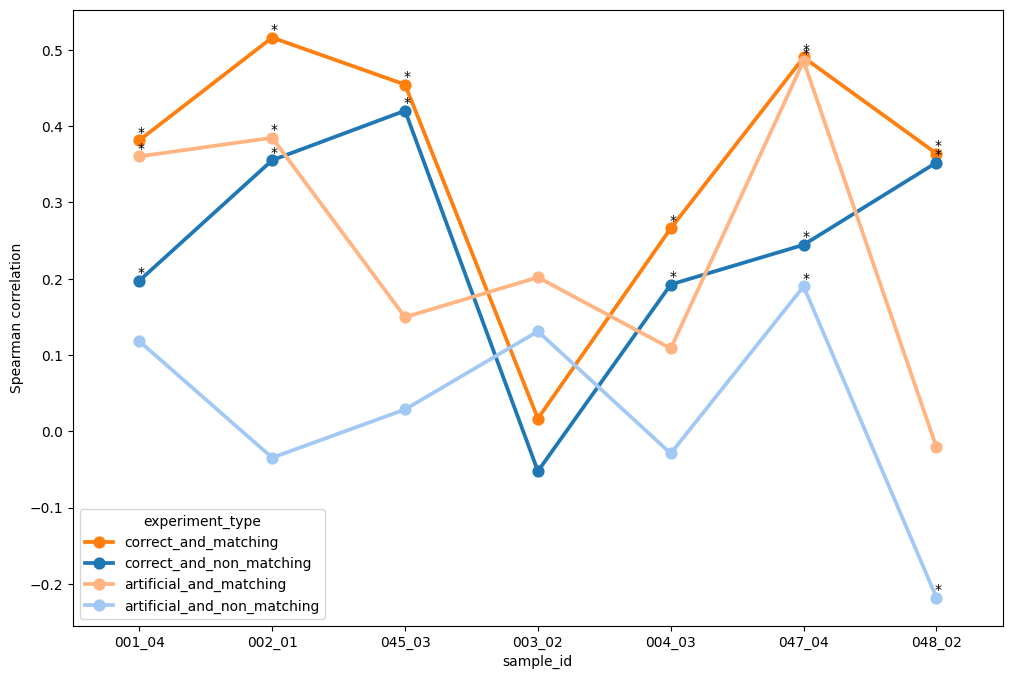

In [28]:
# Built a plotable dataframe.
as2c_df = nc_2_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_2_zinc_core_sp_stats.columns})
as2c_df['experiment_type'] = 'correct_and_matching'
as2w_df = nw_2_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_2_zinc_core_sp_stats.columns})
as2w_df['experiment_type'] = 'artificial_and_matching'
as1c_df = nc_1_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_1_zinc_core_sp_stats.columns})
as1c_df['experiment_type'] = 'correct_and_non_matching'
as1w_df = nw_1_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_1_zinc_core_sp_stats.columns})
as1w_df['experiment_type'] = 'artificial_and_non_matching'
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['sample_id'] = stats_df.index
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)
stats_df.head(4)
standard_color = sns.color_palette()
light_color = sns.color_palette('pastel')
experiment_type_color_mapping = {}
experiment_type_color_mapping['correct_and_non_matching'] = standard_color[0]
experiment_type_color_mapping['artificial_and_non_matching'] = light_color[0]
experiment_type_color_mapping['correct_and_matching'] = standard_color[1] 
experiment_type_color_mapping['artificial_and_matching'] = light_color[1]

_, axs = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue='experiment_type', 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs,
                   order=plot_order)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    sub_df = stats_df.loc[sample_id, :]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center')
# ax.set_ylabel('Spearman correlation', fontsize=12);
# plt.savefig('images/citsper_citrate_analysis/spearman_correlations_citsper_zinc.png')
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/speamran_correlations_citsper_zinc.png')

/mnt/scratch/tmp/ipykernel_24015/3330211119.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  leg_ax.set_xticklabels(leg_ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3330211119.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  leg_ax.set_yticklabels(leg_ax.get_yticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3330211119.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3330211119.py:197: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ip

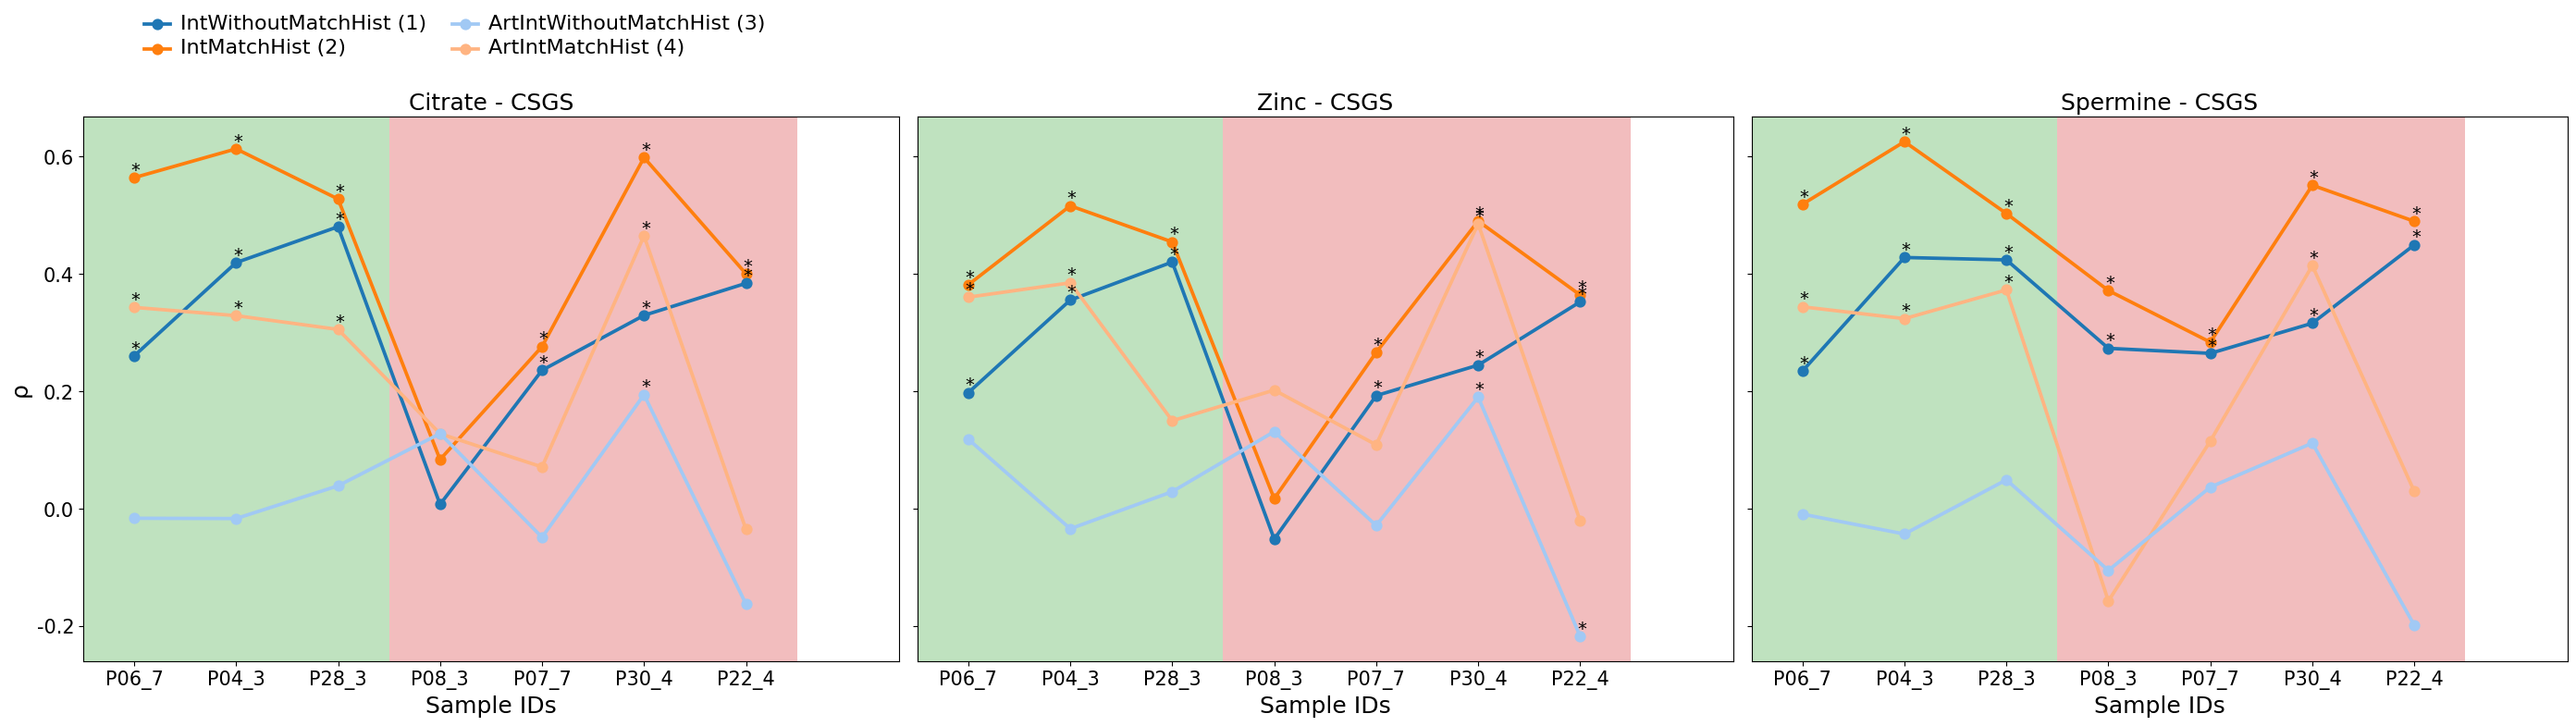

In [29]:
# Plot both images in the same frame
from matplotlib.ticker import FormatStrFormatter

fig, axs = plt.subplots(1, 3, figsize=(28, 8), sharey=True)
fig.subplots_adjust(hspace=0.025, wspace=0.025)

experiment_type_col_name = 'Dataset type'
exp_type1 = 'IntMatchHist'
exp_type2 = 'IntWithoutMatchHist'
exp_type3 = 'ArtIntMatchHist'
exp_type4 = 'ArtIntWithoutMatchHist'
fontsize=18
tick_fontsize=15
xlim_max = 7.5
xlim_min = -.5
all_stats = pd.DataFrame()

core_ids_to_paper_ids = {
    '001_04': 'P06_7',
    '002_01': 'P04_3',
    '003_02': 'P08_3',
    '004_03': 'P07_7',
    '045_03': 'P28_3',
    '047_04': 'P30_4',
    '048_02': 'P22_4'
}

plot_order =['P06_7', 'P04_3', 'P28_3', 'P08_3', 'P07_7', 'P30_4', 'P22_4']

as2c_df = nc_2_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_2_cit_core_sp_stats.columns})
as2c_df[experiment_type_col_name] = 'correct_and_matching'
as2w_df = nw_2_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_2_cit_core_sp_stats.columns})
as2w_df[experiment_type_col_name] = 'artificial_and_matching'
as1c_df = nc_1_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_1_cit_core_sp_stats.columns})
as1c_df[experiment_type_col_name] = 'correct_and_non_matching'
as1w_df = nw_1_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_1_cit_core_sp_stats.columns})
as1w_df[experiment_type_col_name] = 'artificial_and_non_matching'
as2c_df[experiment_type_col_name] = exp_type1
as2w_df[experiment_type_col_name] = exp_type3
as1c_df[experiment_type_col_name] = exp_type2
as1w_df[experiment_type_col_name] = exp_type4
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['core_id'] = stats_df.index
stats_df['sample_id'] = core_ids_to_paper_ids
# stats_df['sample_id'] = stats_df.index
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)
stats_df['background'] = stats_df.sample_id.apply(lambda x: 'C02' if x.startswith('N') else 'C03')
standard_color = sns.color_palette()
light_color = sns.color_palette('pastel')
experiment_type_color_mapping = {}
# experiment_type_color_mapping['IW'] = standard_color[0]
# experiment_type_color_mapping['AW'] = light_color[0]
# experiment_type_color_mapping['IM'] = standard_color[1] 
# experiment_type_color_mapping['AM'] = light_color[1]
experiment_type_color_mapping[exp_type2] = standard_color[0]
experiment_type_color_mapping[exp_type4] = light_color[0]
experiment_type_color_mapping[exp_type1] = standard_color[1] 
experiment_type_color_mapping[exp_type3] = light_color[1]

# ax = sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)
# ranges = fmri.groupby('background')['timepoint'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
 
leg_ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue=experiment_type_col_name, 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs[0],
                   order=plot_order)
leg_ax.set_xlim(xlim_min, xlim_max)
leg_ax.axvspan(xmin=-0.5, xmax=2.5, facecolor='C02', alpha=.3)
leg_ax.axvspan(xmin=2.5, xmax=6.5, facecolor='C03', alpha=.3)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    # sub_df = stats_df.loc[sample_id, :]
    sub_df = stats_df.loc[stats_df.sample_id == sample_id]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        leg_ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center', fontsize=14)
leg_ax.legend([],[], frameon=False)
leg_ax.set_xlabel('Sample IDs', fontsize=fontsize)
leg_ax.set_ylabel('ρ', fontsize=fontsize)
# ax.set_title('Correlation Citrate vs. CSGS', fontsize=fontsize)
leg_ax.set_title('Citrate - CSGS', fontsize=fontsize)
leg_ax.set_xticklabels(leg_ax.get_xticklabels(), size=tick_fontsize)
leg_ax.set_yticklabels(leg_ax.get_yticklabels(), size=tick_fontsize)


stats_df['metabolite'] = 'citrate'
all_stats = pd.concat([all_stats, stats_df])

# Built a plotable dataframe.
as2c_df = nc_2_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_2_zinc_core_sp_stats.columns})
as2c_df[experiment_type_col_name] = 'correct_and_matching'
as2w_df = nw_2_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_2_zinc_core_sp_stats.columns})
as2w_df[experiment_type_col_name] = 'artificial_and_matching'
as1c_df = nc_1_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_1_zinc_core_sp_stats.columns})
as1c_df[experiment_type_col_name] = 'correct_and_non_matching'
as1w_df = nw_1_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_1_zinc_core_sp_stats.columns})
# as2c_df[experiment_type_col_name] = 'IM'
# as2w_df[experiment_type_col_name] = 'AM'
# as1c_df[experiment_type_col_name] = 'IW'
# as1w_df[experiment_type_col_name] = 'AW'
as2c_df[experiment_type_col_name] = exp_type1
as2w_df[experiment_type_col_name] = exp_type3
as1c_df[experiment_type_col_name] = exp_type2
as1w_df[experiment_type_col_name] = exp_type4
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['core_id'] = stats_df.index
stats_df['sample_id'] = core_ids_to_paper_ids
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)

ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue=experiment_type_col_name, 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs[1],
                   order=plot_order)
ax.set_xlim(xlim_min, xlim_max)
ax.axvspan(xmin=-0.5, xmax=2.5, facecolor='C02', alpha=.3)
ax.axvspan(xmin=2.5, xmax=6.5, facecolor='C03', alpha=.3)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    # sub_df = stats_df.loc[sample_id, :]
    sub_df = stats_df.loc[stats_df.sample_id == sample_id]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center', fontsize=14)
# ax.set_title('Correlation Zinc vs. CSGS', fontsize=fontsize)
ax.set_title('Zinc - CSGS', fontsize=fontsize)
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.legend([],[], frameon=False)
stats_df['metabolite'] = 'zinc'
all_stats = pd.concat([all_stats, stats_df])
# Built a plotable dataframe.
as2c_df = pc_2_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pc_2_spe_core_sp_stats.columns})
as2c_df[experiment_type_col_name] = 'correct_and_matching'
as2w_df = pw_2_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pw_2_spe_core_sp_stats.columns})
as2w_df[experiment_type_col_name] = 'artificial_and_matching'
as1c_df = pc_1_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pc_1_spe_core_sp_stats.columns})
as1c_df[experiment_type_col_name] = 'correct_and_non_matching'
as1w_df = pw_1_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pw_1_spe_core_sp_stats.columns})
as1w_df[experiment_type_col_name] = 'artificial_and_non_matching'
# as2c_df[experiment_type_col_name] = 'IM'
# as2w_df[experiment_type_col_name] = 'AM'
# as1c_df[experiment_type_col_name] = 'IW'
# as1w_df[experiment_type_col_name] = 'AW'
as2c_df[experiment_type_col_name] = exp_type1
as2w_df[experiment_type_col_name] = exp_type3
as1c_df[experiment_type_col_name] = exp_type2
as1w_df[experiment_type_col_name] = exp_type4
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['core_id'] = stats_df.index
stats_df['sample_id'] = core_ids_to_paper_ids
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)

ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue=experiment_type_col_name, 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs[2],
                   order=plot_order)
ax.set_xlim(xlim_min, xlim_max)
ax.axvspan(xmin=-0.5, xmax=2.5, facecolor='C02', alpha=.3)
ax.axvspan(xmin=2.5, xmax=6.5, facecolor='C03', alpha=.3)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    # sub_df = stats_df.loc[sample_id, :]
    sub_df = stats_df.loc[stats_df.sample_id == sample_id]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center', fontsize=14)
# ax.set_ylabel('Spearman correlation', fontsize=12);
# ax.set_title('Correlation Spermine vs. CSGS', fontsize=fontsize)
ax.set_title('Spermine - CSGS', fontsize=fontsize)
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
# ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
stats_df['metabolite'] = 'spermine'
all_stats = pd.concat([all_stats, stats_df])
legend_handles, legend_labels = leg_ax.get_legend_handles_labels()
legend_handles_new_order = [legend_handles[1], legend_handles[0], legend_handles[3], legend_handles[2]]
legend_labels_new_order = [legend_labels[1] + ' (1)', legend_labels[0] + ' (2)', legend_labels[3] + ' (3)', legend_labels[2] + ' (4)']
leg_ax.legend(handles=legend_handles_new_order, labels=legend_labels_new_order)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(
    leg_ax, "center right",
    bbox_to_anchor=(.85, 1.15), ncol=2, title=None, frameon=False,
)
plt.setp(leg_ax.get_legend().get_texts(), fontsize=16) # for legend text
plt.setp(leg_ax.get_legend().get_title(), fontsize=14) # for legend title
ax.legend([],[], frameon=False)
# sns.move_legend(ax, "lower right")
# plt.savefig('images/citsper_citrate_analysis/spearman_correlations_citsper_spermine.png')
fig.tight_layout()
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/spearman_correlations_citsper_citrate_zinc_spermine_with_color.png', transparent=True)
# plt.savefig('../../images/citsper_citrate_analysis/spearman_correlations_citsper_citrate_zinc_spermine_with_color.png', transparent=True)

In [30]:
# Plot each part separately.


# Plot both images in the same frame
from matplotlib.ticker import FormatStrFormatter

# fig, axs = plt.subplots(1, 3, figsize=(28, 8), sharey=True)
# fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig, axs = plt.subplots(1, 2, figsize=(30, 11))

experiment_type_col_name = 'Dataset type'
exp_type1 = 'IntMatchHist'
exp_type2 = 'IntWithoutMatchHist'
exp_type3 = 'ArtIntMatchHist'
exp_type4 = 'ArtIntWithoutMatchHist'
fontsize=34
tick_fontsize=24
xlim_max = 7.5
xlim_min = -.5
all_stats = pd.DataFrame()

core_ids_to_paper_ids = {
    '001_04': 'P06_7',
    '002_01': 'P04_3',
    '003_02': 'P08_3',
    '004_03': 'P07_7',
    '045_03': 'P28_3',
    '047_04': 'P30_4',
    '048_02': 'P22_4'
}

plot_order =['P06_7', 'P04_3', 'P28_3', 'P08_3', 'P07_7', 'P30_4', 'P22_4']

as2c_df = nc_2_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_2_cit_core_sp_stats.columns})
as2c_df[experiment_type_col_name] = 'correct_and_matching'
as2w_df = nw_2_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_2_cit_core_sp_stats.columns})
as2w_df[experiment_type_col_name] = 'artificial_and_matching'
as1c_df = nc_1_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_1_cit_core_sp_stats.columns})
as1c_df[experiment_type_col_name] = 'correct_and_non_matching'
as1w_df = nw_1_cit_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_1_cit_core_sp_stats.columns})
as1w_df[experiment_type_col_name] = 'artificial_and_non_matching'
as2c_df[experiment_type_col_name] = exp_type1
as2w_df[experiment_type_col_name] = exp_type3
as1c_df[experiment_type_col_name] = exp_type2
as1w_df[experiment_type_col_name] = exp_type4
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['core_id'] = stats_df.index
stats_df['sample_id'] = core_ids_to_paper_ids
# stats_df['sample_id'] = stats_df.index
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)
stats_df['background'] = stats_df.sample_id.apply(lambda x: 'C02' if x.startswith('N') else 'C03')
standard_color = sns.color_palette()
light_color = sns.color_palette('pastel')
experiment_type_color_mapping = {}
# experiment_type_color_mapping['IW'] = standard_color[0]
# experiment_type_color_mapping['AW'] = light_color[0]
# experiment_type_color_mapping['IM'] = standard_color[1] 
# experiment_type_color_mapping['AM'] = light_color[1]
experiment_type_color_mapping[exp_type2] = standard_color[0]
experiment_type_color_mapping[exp_type4] = light_color[0]
experiment_type_color_mapping[exp_type1] = standard_color[1] 
experiment_type_color_mapping[exp_type3] = light_color[1]

# ax = sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)
# ranges = fmri.groupby('background')['timepoint'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
 
leg_ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue=experiment_type_col_name, 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs[0],
                   order=plot_order)
leg_ax.set_xlim(xlim_min, xlim_max)
# leg_ax.axvspan(xmin=-0.5, xmax=2.5, facecolor='C02', alpha=.3)
# leg_ax.axvspan(xmin=2.5, xmax=6.5, facecolor='C03', alpha=.3)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    # sub_df = stats_df.loc[sample_id, :]
    sub_df = stats_df.loc[stats_df.sample_id == sample_id]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        leg_ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center', fontsize=14)
leg_ax.legend([],[], frameon=False)
leg_ax.set_xlabel('Sample IDs', fontsize=fontsize)
leg_ax.set_ylabel('ρ', fontsize=fontsize)
# ax.set_title('Correlation Citrate vs. CSGS', fontsize=fontsize)
leg_ax.set_title('Citrate - CSGS', fontsize=fontsize)
leg_ax.set_xticklabels(leg_ax.get_xticklabels(), size=tick_fontsize)
leg_ax.set_yticklabels(leg_ax.get_yticklabels(), size=tick_fontsize)

legend_handles, legend_labels = leg_ax.get_legend_handles_labels()
legend_handles_new_order = [legend_handles[1], legend_handles[0], legend_handles[3], legend_handles[2]]
legend_labels_new_order = [legend_labels[1] + ' (1)', legend_labels[0] + ' (2)', legend_labels[3] + ' (3)', legend_labels[2] + ' (4)']
leg_ax.legend(handles=legend_handles_new_order, labels=legend_labels_new_order)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(
    leg_ax, "center right",
    bbox_to_anchor=(.85, 1.15), ncol=2, title=None, frameon=False,
)
plt.setp(leg_ax.get_legend().get_texts(), fontsize=24) # for legend text
plt.setp(leg_ax.get_legend().get_title(), fontsize=24) # for legend title
ax.legend([],[], frameon=False)
# plt.savefig('../../images/citsper_citrate_analysis/spearman_correlations_citsper_citrate_zinc_spermine_with_color.png', transparent=True)
# fig.tight_layout()
# plt.savefig('../../images/citsper_citrate_analysis/spearman_correlations_citsper_citrate_with_color.png', transparent=True)
# plt.close()
# fig, axs = plt.subplots(1, 1, figsize=(13, 8))

stats_df['metabolite'] = 'citrate'
all_stats = pd.concat([all_stats, stats_df])

# Built a plotable dataframe.
as2c_df = nc_2_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_2_zinc_core_sp_stats.columns})
as2c_df[experiment_type_col_name] = 'correct_and_matching'
as2w_df = nw_2_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_2_zinc_core_sp_stats.columns})
as2w_df[experiment_type_col_name] = 'artificial_and_matching'
as1c_df = nc_1_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nc_1_zinc_core_sp_stats.columns})
as1c_df[experiment_type_col_name] = 'correct_and_non_matching'
as1w_df = nw_1_zinc_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in nw_1_zinc_core_sp_stats.columns})
# as2c_df[experiment_type_col_name] = 'IM'
# as2w_df[experiment_type_col_name] = 'AM'
# as1c_df[experiment_type_col_name] = 'IW'
# as1w_df[experiment_type_col_name] = 'AW'
as2c_df[experiment_type_col_name] = exp_type1
as2w_df[experiment_type_col_name] = exp_type3
as1c_df[experiment_type_col_name] = exp_type2
as1w_df[experiment_type_col_name] = exp_type4
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['core_id'] = stats_df.index
stats_df['sample_id'] = core_ids_to_paper_ids
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)

ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue=experiment_type_col_name, 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs[1],
                   order=plot_order)
ax.set_xlim(xlim_min, xlim_max)
# ax.axvspan(xmin=-0.5, xmax=2.5, facecolor='C02', alpha=.3)
# ax.axvspan(xmin=2.5, xmax=6.5, facecolor='C03', alpha=.3)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    # sub_df = stats_df.loc[sample_id, :]
    sub_df = stats_df.loc[stats_df.sample_id == sample_id]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center', fontsize=14)
# ax.set_title('Correlation Zinc vs. CSGS', fontsize=fontsize)
ax.set_title('Zinc - CSGS', fontsize=fontsize)
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('ρ', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
ax.legend([],[], frameon=False)


fig.tight_layout()
# plt.savefig('../../images/citsper_citrate_analysis/spearman_correlations_citsper_with_citrate_zinc_color.png', transparent=True)
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/spearman_correlations_citsper_with_citrate_zinc_color.png', transparent=True)

plt.close()
fig, axs = plt.subplots(1, 1, figsize=(13, 8))

stats_df['metabolite'] = 'zinc'
all_stats = pd.concat([all_stats, stats_df])
# Built a plotable dataframe.
as2c_df = pc_2_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pc_2_spe_core_sp_stats.columns})
as2c_df[experiment_type_col_name] = 'correct_and_matching'
as2w_df = pw_2_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pw_2_spe_core_sp_stats.columns})
as2w_df[experiment_type_col_name] = 'artificial_and_matching'
as1c_df = pc_1_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pc_1_spe_core_sp_stats.columns})
as1c_df[experiment_type_col_name] = 'correct_and_non_matching'
as1w_df = pw_1_spe_core_sp_stats[['statistic', 'pvalue', 'n']].rename(columns={x: x.split('_')[0] for x in pw_1_spe_core_sp_stats.columns})
as1w_df[experiment_type_col_name] = 'artificial_and_non_matching'
# as2c_df[experiment_type_col_name] = 'IM'
# as2w_df[experiment_type_col_name] = 'AM'
# as1c_df[experiment_type_col_name] = 'IW'
# as1w_df[experiment_type_col_name] = 'AW'
as2c_df[experiment_type_col_name] = exp_type1
as2w_df[experiment_type_col_name] = exp_type3
as1c_df[experiment_type_col_name] = exp_type2
as1w_df[experiment_type_col_name] = exp_type4
stats_df = pd.concat([as2c_df, as1c_df, as2w_df, as1w_df])
stats_df['core_id'] = stats_df.index
stats_df['sample_id'] = core_ids_to_paper_ids
stats_df.rename(columns={'statistic': 'Spearman correlation'}, inplace=True)

ax = sns.pointplot(stats_df, 
                   y='Spearman correlation', 
                   x='sample_id', 
                   hue=experiment_type_col_name, 
                   linestyles='-', 
                   palette=experiment_type_color_mapping,
                   ax=axs,
                   order=plot_order)
ax.set_xlim(xlim_min, xlim_max)
# ax.axvspan(xmin=-0.5, xmax=2.5, facecolor='C02', alpha=.3)
# ax.axvspan(xmin=2.5, xmax=6.5, facecolor='C03', alpha=.3)
sample_ids = stats_df.index.unique()
sample_ids = plot_order
for idx, sample_id in enumerate(sample_ids):
    # sub_df = stats_df.loc[sample_id, :]
    sub_df = stats_df.loc[stats_df.sample_id == sample_id]
    for row_idx, row in sub_df.iterrows():
        y = row['Spearman correlation']
        p = row['pvalue']
        if p > 0.0001:
            continue
        ax.annotate('*', xy=(idx+.015, y+.005), horizontalalignment='center', fontsize=14)
# ax.set_ylabel('Spearman correlation', fontsize=12);
# ax.set_title('Correlation Spermine vs. CSGS', fontsize=fontsize)
ax.set_title('Spermine - CSGS', fontsize=fontsize)
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('ρ', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
# ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# plt.savefig('../../images/citsper_citrate_analysis/spearman_correlations_citsper_with_spermine_color.png', transparent=True)
# plt.close()
# fig, axs = plt.subplots(1, 1, figsize=(10, 10), sharey=True)

stats_df['metabolite'] = 'spermine'
all_stats = pd.concat([all_stats, stats_df])
# legend_handles, legend_labels = leg_ax.get_legend_handles_labels()
# legend_handles_new_order = [legend_handles[1], legend_handles[0], legend_handles[3], legend_handles[2]]
# legend_labels_new_order = [legend_labels[1] + ' (1)', legend_labels[0] + ' (2)', legend_labels[3] + ' (3)', legend_labels[2] + ' (4)']
# leg_ax.legend(handles=legend_handles_new_order, labels=legend_labels_new_order)
# # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(
#     leg_ax, "center right",
#     bbox_to_anchor=(.85, 1.15), ncol=2, title=None, frameon=False,
# )
# plt.setp(leg_ax.get_legend().get_texts(), fontsize=16) # for legend text
# plt.setp(leg_ax.get_legend().get_title(), fontsize=14) # for legend title
ax.legend([],[], frameon=False)
# sns.move_legend(ax, "lower right")
fig.tight_layout()
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/spearman_correlations_citsper_with_spermine_color.png', transparent=True)
# plt.savefig('../../images/citsper_citrate_analysis/spearman_correlations_citsper_with_spermine_color.png', transparent=True)
plt.close()

/mnt/scratch/tmp/ipykernel_24015/3182483568.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  leg_ax.set_xticklabels(leg_ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3182483568.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  leg_ax.set_yticklabels(leg_ax.get_yticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3182483568.py:168: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3182483568.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
/mnt/scratch/t

In [31]:
metadata_df[metadata_df.core_name.isin(['001_04', '002_01', '003_02', '004_03', '045_03', '047_04', '048_02'])]

Sample ID_x adjusted_core_type  Round nr Square (a-d) on slide    type  \
3    PS D012.c8                  n        47                     d  Normal   
6    PS D008.c6                  n        45                     c  Normal   
9    PS C003.c8                  n        48                     b  Normal   
16  PS A004.c10                  n         2                     a  Normal   
23   PS A006.c7                  n         1                     d  Normal   
25  PS A008.c12                  n         3                     b  Normal   
30   PS A007.c9                  n         4                     c  Normal   

    recurrence patient_id core_name st_identifier_y correct_st_identifier  \
3   recurrence    PS_D012    047_04    V10A20_007_4          V10A20_007_D   
6      control    PS_D008    045_03    V10A20_008_3          V10A20_008_C   
9   recurrence    PS_C003    048_02    V10A20_009_2          V10A20_009_B   
16     control    PS_A004    002_01    V19S23_002_1          V19S23_002_A   
23     control    PS_A006    001_04    V19S23_106_4          V19S23_106_D   
25  recurrence    PS_A008    003_02    V19S23_107_2          V19S23_107_B   
30  recurrence    PS_A007    004_03    V19S23_108_3          V19S23_108_C   

   fixed_sample_id  Sample ID_y New_samp Patient New_patient  Samp_nr  slide  \
3       PS_D012_c8   PS_D012_c8    P30_4    D012         P30        4     47   
6       PS_D008_c6   PS_D008_c6    P28_3    D008         P28        3     45   
9       PS_C003_c8   PS_C003_c8    P22_4    C003         P22        4     48   
16     PS_A004_c10  PS_A004_c10     P4_3    A004          P4        3      2   
23      PS_A006_c7   PS_A006_c7     P6_7    A006          P6        7      1   
25     PS_A008_c12  PS_A008_c12     P8_3    A008          P8        3      3   
30      PS_A007_c9   PS_A007_c9     P7_7    A007          P7        7      4   

   position new_sample_id  
3         d         P30_4  
6         c         P28_3  
9         b         P22_4  
16        a         P04_3  
23        d         P06_7  
25        b         P08_3  
30        c         P07_7

In [32]:
stats_df['background_color'] = stats_df['sample_id'].apply(lambda x: 'C')

In [33]:
all_stats.to_csv('correlations_csgs_czs.csv')

In [70]:
all_stats

Spearman correlation        pvalue    n            Dataset type  \
001_04              0.564231  1.513401e-28  323            IntMatchHist   
002_01              0.613349  2.166576e-42  397            IntMatchHist   
003_02              0.083298  2.544755e-01  189            IntMatchHist   
004_03              0.276095  9.344658e-08  362            IntMatchHist   
045_03              0.527788  4.694456e-42  568            IntMatchHist   
...                      ...           ...  ...                     ...   
003_02             -0.105744  3.962945e-02  379  ArtIntWithoutMatchHist   
004_03              0.036363  4.111579e-01  513  ArtIntWithoutMatchHist   
045_03              0.048800  1.949570e-01  707  ArtIntWithoutMatchHist   
047_04              0.111472  7.056728e-03  583  ArtIntWithoutMatchHist   
048_02             -0.199345  1.704616e-04  351  ArtIntWithoutMatchHist   

       core_id sample_id background metabolite         Experiment type  \
001_04  001_04     P06_7        C03    citrate            IntMatchHist   
002_01  002_01     P04_3        C03    citrate            IntMatchHist   
003_02  003_02     P08_3        C03    citrate            IntMatchHist   
004_03  004_03     P07_7        C03    citrate            IntMatchHist   
045_03  045_03     P28_3        C03    citrate            IntMatchHist   
...        ...       ...        ...        ...                     ...   
003_02  003_02     P08_3        NaN   spermine  ArtIntWithoutMatchHist   
004_03  004_03     P07_7        NaN   spermine  ArtIntWithoutMatchHist   
045_03  045_03     P28_3        NaN   spermine  ArtIntWithoutMatchHist   
047_04  047_04     P30_4        NaN   spermine  ArtIntWithoutMatchHist   
048_02  048_02     P22_4        NaN   spermine  ArtIntWithoutMatchHist   

                       Dataset  z_transformed_correlations  
001_04            IntMatchHist                    0.639019  
002_01            IntMatchHist                    0.714272  
003_02            IntMatchHist                    0.083492  
004_03            IntMatchHist                    0.283450  
045_03            IntMatchHist                    0.587074  
...                        ...                         ...  
003_02  ArtIntWithoutMatchHist                   -0.106141  
004_03  ArtIntWithoutMatchHist                    0.036379  
045_03  ArtIntWithoutMatchHist                    0.048839  
047_04  ArtIntWithoutMatchHist                    0.111937  
048_02  ArtIntWithoutMatchHist                   -0.202050  

[84 rows x 11 columns]

In [34]:
all_stats['Experiment type'] = all_stats['Dataset type']

In [35]:
all_stats.to_csv('all_stats.csv')

Compute correlations in R script "all_stats_analysis.R"

In [36]:
fisher_df = pd.read_csv('fisher_correlations.csv', index_col=0)
fisher_df

sample_id metabolite                  scrExp                  dstExp  \
1       P06_7    citrate            IntMatchHist            IntMatchHist   
2       P06_7    citrate            IntMatchHist     IntWithoutMatchHist   
3       P06_7    citrate            IntMatchHist         ArtIntMatchHist   
4       P06_7    citrate            IntMatchHist  ArtIntWithoutMatchHist   
5       P06_7    citrate     IntWithoutMatchHist            IntMatchHist   
..        ...        ...                     ...                     ...   
332     P22_4   spermine         ArtIntMatchHist  ArtIntWithoutMatchHist   
333     P22_4   spermine  ArtIntWithoutMatchHist            IntMatchHist   
334     P22_4   spermine  ArtIntWithoutMatchHist     IntWithoutMatchHist   
335     P22_4   spermine  ArtIntWithoutMatchHist         ArtIntMatchHist   
336     P22_4   spermine  ArtIntWithoutMatchHist  ArtIntWithoutMatchHist   

     statistic distribution        pvalue  
1     0.000000            z  5.000000e-01  
2     5.283309            z  9.999999e-01  
3     3.444541            z  9.997140e-01  
4     9.302595            z  1.000000e+00  
5    -5.283309            z  6.343569e-08  
..         ...          ...           ...  
332   2.483939            z  9.935031e-01  
333  -9.190433            z  1.956319e-20  
334  -9.133879            z  3.304407e-20  
335  -2.483939            z  6.496902e-03  
336   0.000000            z  5.000000e-01  

[336 rows x 7 columns]

In [41]:
from os.path import join

In [42]:
fisher_df

sample_id metabolite                  scrExp                  dstExp  \
1       P06_7    citrate            IntMatchHist            IntMatchHist   
2       P06_7    citrate            IntMatchHist     IntWithoutMatchHist   
3       P06_7    citrate            IntMatchHist         ArtIntMatchHist   
4       P06_7    citrate            IntMatchHist  ArtIntWithoutMatchHist   
5       P06_7    citrate     IntWithoutMatchHist            IntMatchHist   
..        ...        ...                     ...                     ...   
332     P22_4   spermine         ArtIntMatchHist  ArtIntWithoutMatchHist   
333     P22_4   spermine  ArtIntWithoutMatchHist            IntMatchHist   
334     P22_4   spermine  ArtIntWithoutMatchHist     IntWithoutMatchHist   
335     P22_4   spermine  ArtIntWithoutMatchHist         ArtIntMatchHist   
336     P22_4   spermine  ArtIntWithoutMatchHist  ArtIntWithoutMatchHist   

     statistic distribution        pvalue  
1     0.000000            z  5.000000e-01  
2     5.283309            z  9.999999e-01  
3     3.444541            z  9.997140e-01  
4     9.302595            z  1.000000e+00  
5    -5.283309            z  6.343569e-08  
..         ...          ...           ...  
332   2.483939            z  9.935031e-01  
333  -9.190433            z  1.956319e-20  
334  -9.133879            z  3.304407e-20  
335  -2.483939            z  6.496902e-03  
336   0.000000            z  5.000000e-01  

[336 rows x 7 columns]

In [37]:
def get_corr_df(df):
    exp_types = ['DCM', 'DCW', 'DAM', 'DAW']
    m = np.zeros((len(exp_types), len(exp_types)))
    for i, e1 in enumerate(exp_types):
        for j, e2 in enumerate(exp_types):
            # if e1 == e2:
            #     m[i,j] = 1
            row = sub_f_df[(df.scrExp == e1) & (df.dstExp == e2)]
            if row.shape[0] == 0:
                continue
            val = row.pvalue
            m[i,j] = val
    corr_df = pd.DataFrame(m, columns=exp_types, index=exp_types)
    return corr_df

short_to_long_dtype = {
    'IM': 'IntMatchHist',
    'IW': 'IntWithoutMatchHist',
    'AM': 'ArtIntMatchHist',
    'AW': 'ArtIntWithoutMatchHist'
}

# fisher_df['src_dtype'] = fisher_df.scrExp.apply(lambda x: short_to_long_dtype[x])
# fisher_df['dst_dtype'] = fisher_df.dstExp.apply(lambda x: short_to_long_dtype[x])

# sample_id = 'P06_7'
# metabolite = 'citrate'
for sample_id in fisher_df.sample_id.unique():
    for metabolite in fisher_df.metabolite.unique():
        print(sample_id, metabolite)
        sub_f_df = fisher_df[(fisher_df.sample_id == sample_id) & (fisher_df.metabolite == metabolite)]
        corr_df = get_corr_df(sub_f_df)
        mask = np.triu(np.ones_like(corr_df))
        # path = join(f'../../images/citsper_citrate_analysis/heatmaps/{sample_id}_{metabolite}.png')
        path = join(f'/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/{sample_id}_{metabolite}.png')
        _, axs = plt.subplots(1,1,figsize=(8,8))
        ax = sns.heatmap(corr_df, mask=mask, ax=axs)
        ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=22)
        ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=22)
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=22)
        plt.savefig(path, transparent=True)
        plt.close()

P06_7 citrate
P06_7 zinc
P06_7 spermine
P04_3 citrate
P04_3 zinc
P04_3 spermine
P08_3 citrate
P08_3 zinc
P08_3 spermine
P07_7 citrate
P07_7 zinc
P07_7 spermine
P28_3 citrate
P28_3 zinc
P28_3 spermine
P30_4 citrate
P30_4 zinc
P30_4 spermine
P22_4 citrate
P22_4 zinc
P22_4 spermine


Experient: Tissue or non tissue matching

In [38]:
all_stats

Spearman correlation        pvalue    n            Dataset type  \
001_04              0.564231  1.513401e-28  323            IntMatchHist   
002_01              0.613349  2.166576e-42  397            IntMatchHist   
003_02              0.083298  2.544755e-01  189            IntMatchHist   
004_03              0.276095  9.344658e-08  362            IntMatchHist   
045_03              0.527788  4.694456e-42  568            IntMatchHist   
...                      ...           ...  ...                     ...   
003_02             -0.105744  3.962945e-02  379  ArtIntWithoutMatchHist   
004_03              0.036363  4.111579e-01  513  ArtIntWithoutMatchHist   
045_03              0.048800  1.949570e-01  707  ArtIntWithoutMatchHist   
047_04              0.111472  7.056728e-03  583  ArtIntWithoutMatchHist   
048_02             -0.199345  1.704616e-04  351  ArtIntWithoutMatchHist   

       core_id sample_id background metabolite         Experiment type  
001_04  001_04     P06_7        C03    citrate            IntMatchHist  
002_01  002_01     P04_3        C03    citrate            IntMatchHist  
003_02  003_02     P08_3        C03    citrate            IntMatchHist  
004_03  004_03     P07_7        C03    citrate            IntMatchHist  
045_03  045_03     P28_3        C03    citrate            IntMatchHist  
...        ...       ...        ...        ...                     ...  
003_02  003_02     P08_3        NaN   spermine  ArtIntWithoutMatchHist  
004_03  004_03     P07_7        NaN   spermine  ArtIntWithoutMatchHist  
045_03  045_03     P28_3        NaN   spermine  ArtIntWithoutMatchHist  
047_04  047_04     P30_4        NaN   spermine  ArtIntWithoutMatchHist  
048_02  048_02     P22_4        NaN   spermine  ArtIntWithoutMatchHist  

[84 rows x 9 columns]

In [132]:
# Make table with differences between matching and non matching tissue types
df1 = all_stats[all_stats['Dataset type'] == 'IntMatchHist'].set_index(['metabolite', 'sample_id'])
df2 = all_stats[all_stats['Dataset type'] == 'IntWithoutMatchHist'].set_index(['metabolite', 'sample_id'])
df3 = df1.merge(df2, left_index=True, right_index=True)
df3 = df3[['Spearman correlation_y','Spearman correlation_x', 'n_y', 'n_x']]
tissue_matching_sigs = fisher_df[(fisher_df.scrExp == 'IW') & (fisher_df.dstExp == 'IM')].set_index(['metabolite', 'sample_id'])
df3['diff_pvalues'] = tissue_matching_sigs['pvalue']
metabolites = np.unique([x[0] for x in df3.index])

In [40]:
df3.to_csv('tissue_type_matching_or_not.csv', sep=';')

In [133]:
from scipy.stats import ttest_rel

def z_transform(r):
    return 0.5*np.log((1 + r)/(1 - r))

In [135]:
df3

Spearman correlation_y  Spearman correlation_x  n_y  \
metabolite sample_id                                                        
citrate    P06_7                       0.260                   0.564  542   
           P04_3                       0.419                   0.613  656   
           P08_3                       0.007                   0.083  406   
           P07_7                       0.236                   0.276  522   
           P28_3                       0.481                   0.528  717   
           P30_4                       0.329                   0.599  621   
           P22_4                       0.384                   0.400  370   
zinc       P06_7                       0.197                   0.382  542   
           P04_3                       0.355                   0.516  656   
           P08_3                      -0.052                   0.017  406   
           P07_7                       0.192                   0.266  522   
           P28_3                       0.420                   0.455  717   
           P30_4                       0.244                   0.490  621   
           P22_4                       0.352                   0.364  370   
spermine   P06_7                       0.234                   0.519  539   
           P04_3                       0.428                   0.626  643   
           P08_3                       0.273                   0.372  397   
           P07_7                       0.265                   0.284  534   
           P28_3                       0.424                   0.503  717   
           P30_4                       0.316                   0.551  586   
           P22_4                       0.450                   0.490  364   

                      n_x  diff_pvalues  
metabolite sample_id                     
citrate    P06_7      323           NaN  
           P04_3      397           NaN  
           P08_3      189           NaN  
           P07_7      362           NaN  
           P28_3      568           NaN  
           P30_4      418           NaN  
           P22_4      281           NaN  
zinc       P06_7      323           NaN  
           P04_3      397           NaN  
           P08_3      189           NaN  
           P07_7      362           NaN  
           P28_3      568           NaN  
           P30_4      418           NaN  
           P22_4      281           NaN  
spermine   P06_7      322           NaN  
           P04_3      389           NaN  
           P08_3      192           NaN  
           P07_7      374           NaN  
           P28_3      577           NaN  
           P30_4      397           NaN  
           P22_4      283           NaN

In [134]:
corrs_exp2 = {}
for metabolite in metabolites:
    scy = df3.loc[metabolite]['Spearman correlation_y'].apply(lambda x: z_transform(x))
    scx = df3.loc[metabolite]['Spearman correlation_x'].apply(lambda x: z_transform(x))
    # scy = df3.loc[metabolite]['Spearman correlation_y']
    # scx = df3.loc[metabolite]['Spearman correlation_x']
    corrs_exp2[metabolite] = ttest_rel(scy, scx, alternative='less')
corrs_exp2

{'citrate': TtestResult(statistic=-2.933074708217398, pvalue=0.013091101453507916, df=6),
 'spermine': TtestResult(statistic=-3.502056580774395, pvalue=0.006397153263877299, df=6),
 'zinc': TtestResult(statistic=-3.3071390105721448, pvalue=0.008131286993293116, df=6)}

In [152]:
a = all_stats[(all_stats.metabolite == 'citrate') & (all_stats['Dataset type'] == 'IntMatchHist')]
a['Spearman correlation'].mean()

0.4376500089981407

In [153]:
b = all_stats[(all_stats.metabolite == 'citrate') & (all_stats['Dataset type'] == 'IntWithoutMatchHist')]
b['Spearman correlation'].mean()

0.3022602328767635

In [154]:
ttest_rel(b.z_transformed_correlations.to_numpy(), a.z_transformed_correlations.to_numpy(), alternative='less')

TtestResult(statistic=-2.933074708217398, pvalue=0.013091101453507916, df=6)

In [155]:
a = all_stats[(all_stats.metabolite == 'zinc') & (all_stats['Dataset type'] == 'IntMatchHist')]
a['Spearman correlation'].mean()

0.3556338307829322

In [156]:
b = all_stats[(all_stats.metabolite == 'zinc') & (all_stats['Dataset type'] == 'IntWithoutMatchHist')]
b['Spearman correlation'].mean()

0.24428390388023472

In [157]:
ttest_rel(b.z_transformed_correlations.to_numpy(), a.z_transformed_correlations.to_numpy(), alternative='less')

TtestResult(statistic=-3.3071390105721448, pvalue=0.008131286993293116, df=6)

In [158]:
a = all_stats[(all_stats.metabolite == 'spermine') & (all_stats['Dataset type'] == 'IntMatchHist')]
a['Spearman correlation'].mean()

0.47769122418537313

In [159]:
b = all_stats[(all_stats.metabolite == 'spermine') & (all_stats['Dataset type'] == 'IntWithoutMatchHist')]
b['Spearman correlation'].mean()

0.3413399240191346

In [160]:
ttest_rel(b.z_transformed_correlations.to_numpy(), a.z_transformed_correlations.to_numpy(), alternative='less')

TtestResult(statistic=-3.502056580774395, pvalue=0.006397153263877299, df=6)

In [146]:
b.z_transformed_correlations

001_04    0.266
002_01    0.447
003_02    0.007
004_03    0.240
045_03    0.524
047_04    0.342
048_02    0.405
Name: z_transformed_correlations, dtype: float64

In [147]:
a.z_transformed_correlations

001_04    0.266
002_01    0.447
003_02    0.007
004_03    0.240
045_03    0.524
047_04    0.342
048_02    0.405
Name: z_transformed_correlations, dtype: float64

In [143]:
a.z_transformed_correlations

001_04    0.266
002_01    0.447
003_02    0.007
004_03    0.240
045_03    0.524
047_04    0.342
048_02    0.405
Name: z_transformed_correlations, dtype: float64

In [136]:
scy = df3['Spearman correlation_y'].apply(lambda x: z_transform(x))
scx = df3['Spearman correlation_x'].apply(lambda x: z_transform(x))
ttest_rel(scy, scx, alternative='less')


TtestResult(statistic=-5.7249904721875575, pvalue=6.652986882823272e-06, df=20)

In [44]:
# Average rho's
val_dict = {}
int_match_df = all_stats[all_stats['Dataset type'] == 'IntMatchHist']
metabolite = 'citrate'
val_dict[f'{metabolite} mean'] = int_match_df[int_match_df.metabolite == metabolite]['Spearman correlation'].mean()
val_dict[f'{metabolite} std'] = int_match_df[int_match_df.metabolite == metabolite]['Spearman correlation'].std()
metabolite = 'zinc'
val_dict[f'{metabolite} mean'] = int_match_df[int_match_df.metabolite == metabolite]['Spearman correlation'].mean()
val_dict[f'{metabolite} std'] = int_match_df[int_match_df.metabolite == metabolite]['Spearman correlation'].std()
metabolite = 'spermine'
val_dict[f'{metabolite} mean'] = int_match_df[int_match_df.metabolite == metabolite]['Spearman correlation'].mean()
val_dict[f'{metabolite} std'] = int_match_df[int_match_df.metabolite == metabolite]['Spearman correlation'].std()
val_dict

{'citrate mean': 0.4376500089981407,
 'citrate std': 0.19746698429261025,
 'zinc mean': 0.3556338307829322,
 'zinc std': 0.1719119026260368,
 'spermine mean': 0.47769122418537313,
 'spermine std': 0.11453760688371997}

In [45]:
all_stats['Dataset type'].unique()

array(['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist',
       'ArtIntWithoutMatchHist'], dtype=object)

Experiment: Artificial or not

In [127]:

# Make table with differences between matching and non matching tissue types
df1 = all_stats[all_stats['Dataset type'] == 'IntWithoutMatchHist'].set_index(['metabolite', 'sample_id'])
df2 = all_stats[all_stats['Dataset type'] == 'ArtIntWithoutMatchHist'].set_index(['metabolite', 'sample_id'])
df3 = df1.merge(df2, left_index=True, right_index=True)
df3 = df3[['Spearman correlation_y','Spearman correlation_x', 'n_y', 'n_x']]
# tissue_matching_sigs = fisher_df[(fisher_df.scrExp == 'DAW') & (fisher_df.dstExp == 'DCW')].set_index(['metabolite', 'sample_id'])
# df3['diff_pvalues'] = tissue_matching_sigs['pvalue']
metabolites = np.unique([x[0] for x in df3.index])
corrs_exp3 = {}
for metabolite in metabolites:
    scy = df3.loc[metabolite]['Spearman correlation_y'].apply(lambda x: z_transform(x))
    scx = df3.loc[metabolite]['Spearman correlation_x'].apply(lambda x: z_transform(x))
    corrs_exp3[metabolite] = ttest_rel(scy, scx, alternative='less')
corrs_exp3

{'citrate': TtestResult(statistic=-3.3799845175191434, pvalue=0.007429040836509576, df=6),
 'spermine': TtestResult(statistic=-5.928058068765922, pvalue=0.000513730282914883, df=6),
 'zinc': TtestResult(statistic=-2.277447408664515, pvalue=0.03151006135128087, df=6)}

In [130]:
df3

Spearman correlation_y  Spearman correlation_x  n_y  n_x
metabolite sample_id                                                          
citrate    P06_7                      -0.017                   0.260  545  542
           P04_3                      -0.017                   0.419  648  656
           P08_3                       0.128                   0.007  393  406
           P07_7                      -0.049                   0.236  512  522
           P28_3                       0.039                   0.481  711  717
           P30_4                       0.194                   0.329  600  621
           P22_4                      -0.163                   0.384  359  370
zinc       P06_7                       0.118                   0.197  545  542
           P04_3                      -0.035                   0.355  648  656
           P08_3                       0.131                  -0.052  393  406
           P07_7                      -0.029                   0.192  512  522
           P28_3                       0.029                   0.420  711  717
           P30_4                       0.190                   0.244  600  621
           P22_4                      -0.218                   0.352  359  370
spermine   P06_7                      -0.010                   0.234  542  539
           P04_3                      -0.044                   0.428  640  643
           P08_3                      -0.106                   0.273  379  397
           P07_7                       0.036                   0.265  513  534
           P28_3                       0.049                   0.424  707  717
           P30_4                       0.111                   0.316  583  586
           P22_4                      -0.199                   0.450  351  364

In [128]:
scy = df3['Spearman correlation_y'].apply(lambda x: z_transform(x))
scx = df3['Spearman correlation_x'].apply(lambda x: z_transform(x))
ttest_rel(scy, scx, alternative='less')

TtestResult(statistic=-6.188435279916647, pvalue=2.4002786412616786e-06, df=20)

In [48]:
all_stats['Dataset'] = all_stats['Dataset type']

In [49]:
all_stats.Dataset.unique()

array(['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist',
       'ArtIntWithoutMatchHist'], dtype=object)

In [50]:
# Make correlation matrices
# datasets = ['IM', 'IW', 'AM', 'AW']
datasets = all_stats.Dataset.unique()
# datasets = ['IM', 'IW', 'AM']
corr_all_np = np.zeros((len(datasets), len(datasets)))
corr_citrate_np = np.zeros((len(datasets), len(datasets)))
corr_zinc_np = np.zeros((len(datasets), len(datasets)))
corr_spermine_np = np.zeros((len(datasets), len(datasets)))
for i1, d_type1 in enumerate(datasets):
    for i2, d_type2 in enumerate(datasets):
        df1 = all_stats[all_stats.Dataset == d_type1].set_index(['metabolite', 'sample_id'])
        df2 = all_stats[all_stats.Dataset == d_type2].set_index(['metabolite', 'sample_id'])
        df3 = df1.merge(df2, left_index=True, right_index=True)
        df3 = df3[['Spearman correlation_y','Spearman correlation_x', 'n_y', 'n_x', 'pvalue_y', 'pvalue_x']]
        # valid_samples_idxs = (df3.pvalue_y < 0.05) & (df3.pvalue_x < 0.05)
        # df3 = df3.loc[valid_samples_idxs]
        # tissue_matching_sigs = fisher_df[(fisher_df.scrExp == 'DAW') & (fisher_df.dstExp == 'DCW')].set_index(['metabolite', 'sample_id'])
        # df3['diff_pvalues'] = tissue_matching_sigs['pvalue']
        metabolites = np.unique([x[0] for x in df3.index])
        corrs_exp3 = {}
        metabolite = 'citrate'
        scy = df3.loc[metabolite]['Spearman correlation_y'].apply(lambda x: z_transform(x))
        scx = df3.loc[metabolite]['Spearman correlation_x'].apply(lambda x: z_transform(x))
        t_stats = ttest_rel(scy, scx, alternative='less')
        corr_citrate_np[i1, i2] = t_stats.pvalue
        metabolite = 'zinc'
        scy = df3.loc[metabolite]['Spearman correlation_y'].apply(lambda x: z_transform(x))
        scx = df3.loc[metabolite]['Spearman correlation_x'].apply(lambda x: z_transform(x))
        t_stats = ttest_rel(scy, scx, alternative='less')
        corr_zinc_np[i1, i2] = t_stats.pvalue
        metabolite = 'spermine'
        scy = df3.loc[metabolite]['Spearman correlation_y'].apply(lambda x: z_transform(x))
        scx = df3.loc[metabolite]['Spearman correlation_x'].apply(lambda x: z_transform(x))
        t_stats = ttest_rel(scy, scx, alternative='less')
        corr_spermine_np[i1, i2] = t_stats.pvalue
        scy = df3['Spearman correlation_y'].apply(lambda x: z_transform(x))
        scx = df3['Spearman correlation_x'].apply(lambda x: z_transform(x))
        t_stats = ttest_rel(scy, scx, alternative='less')
        corr_all_np[i1, i2] = t_stats.pvalue
corr_citrate_df = pd.DataFrame(corr_citrate_np, columns=datasets, index=datasets)
corr_zinc_df = pd.DataFrame(corr_zinc_np, columns=datasets, index=datasets)
corr_spermine_df = pd.DataFrame(corr_spermine_np, columns=datasets, index=datasets)
corr_all_df = pd.DataFrame(corr_all_np, columns=datasets, index=datasets)


In [131]:
corr_all_df

IntMatchHist  IntWithoutMatchHist  ArtIntMatchHist  \
IntMatchHist                     NaN            6.653e-06        7.185e-06   
IntWithoutMatchHist              1.0                  NaN        7.984e-02   
ArtIntMatchHist                  1.0            9.202e-01              NaN   
ArtIntWithoutMatchHist           1.0            1.000e+00        1.000e+00   

                        ArtIntWithoutMatchHist  
IntMatchHist                         8.754e-09  
IntWithoutMatchHist                  2.400e-06  
ArtIntMatchHist                      1.497e-07  
ArtIntWithoutMatchHist                     NaN

Text(0.5, 1.0, 'Citrate')

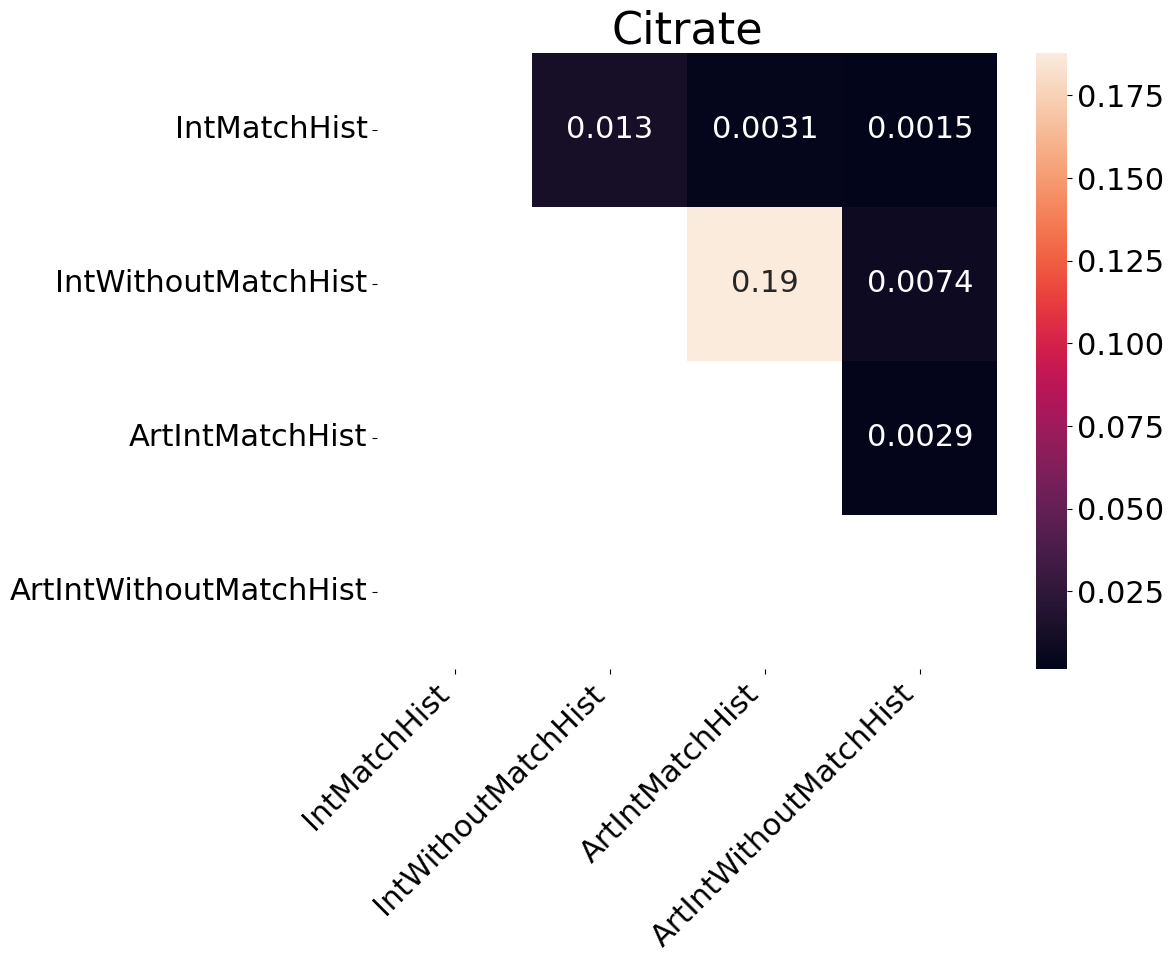

In [57]:
_, axs = plt.subplots(1, 1, figsize=(10, 8))
mask = np.tril(np.ones_like(corr_citrate_df))
ax = sns.heatmap(corr_citrate_df, mask=mask, annot=True, ax=axs, annot_kws={'fontsize': 22})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=22, rotation=45, ha='right')
# axs.set_xticks(ax.get_xticks()-1)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=22, rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
axs.set_title('Citrate', fontsize=32)
# axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
# axs.set_yticklabels(axs.get_yticklabels(), rotation=0)
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.xticks([0.5, 1.0, 1.5, 2])
# ax.set_xticks(ax.get_xticks() - 0.25)
# ax.set_xticks(ax.get_xticks()., rotation=45)
# path = 'images/citsper_citrate_analysis/heatmaps/citrate_heatmap.png'
# plt.savefig(path, transparent=True)
# plt.close()

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
mask = np.tril(np.ones_like(corr_citrate_df))
ax = sns.heatmap(corr_citrate_df, mask=mask, annot=True, ax=axs, annot_kws={'fontsize': 22})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=22, rotation=45, ha='right')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=22, rotation=0)
axs.set_title('Citrate', fontsize=32)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
path = '/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/heatmaps/citrate_heatmap.png'
# path = '../../images/citsper_citrate_analysis/heatmaps/citrate_heatmap.png'
fig.tight_layout()
plt.savefig(path, transparent=False)
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(12, 10))
mask = np.tril(np.ones_like(corr_zinc_df))
ax = sns.heatmap(corr_zinc_df, mask=mask, annot=True, ax=axs, annot_kws={'fontsize': 22})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=22, rotation=45, ha='right')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=22, rotation=0)
axs.set_title('Zinc', fontsize=32)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
# path = '../../images/citsper_citrate_analysis/heatmaps/zinc_heatmap.png'
path = '/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/heatmaps/zinc_heatmap.png'
fig.tight_layout()
plt.savefig(path, transparent=True)
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(12, 10))
mask = np.tril(np.ones_like(corr_spermine_df))
ax = sns.heatmap(corr_spermine_df, mask=mask, annot=True, ax=axs, annot_kws={'fontsize': 22})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=22, rotation=45, ha='right')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=22, rotation=0)
axs.set_title('Spermine', fontsize=32)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
# path = '../../images/citsper_citrate_analysis/heatmaps/spermine_heatmap.png'
path = '/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/heatmaps/spermine_heatmap.png'
fig.tight_layout()
plt.savefig(path, transparent=True)
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(12, 10))
mask = np.tril(np.ones_like(corr_all_df))
ax = sns.heatmap(corr_all_df, mask=mask, annot=True, ax=axs, annot_kws={'fontsize': 22})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=22, rotation=45, ha='right')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=22, rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
# path = '../../images/citsper_citrate_analysis/heatmaps/all_heatmap.png'
path = '/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/heatmaps/all_heatmap.png'
fig.tight_layout()
plt.savefig(path, transparent=True)
plt.close()

In [60]:
all_stats

Spearman correlation        pvalue    n            Dataset type  \
001_04              0.564231  1.513401e-28  323            IntMatchHist   
002_01              0.613349  2.166576e-42  397            IntMatchHist   
003_02              0.083298  2.544755e-01  189            IntMatchHist   
004_03              0.276095  9.344658e-08  362            IntMatchHist   
045_03              0.527788  4.694456e-42  568            IntMatchHist   
...                      ...           ...  ...                     ...   
003_02             -0.105744  3.962945e-02  379  ArtIntWithoutMatchHist   
004_03              0.036363  4.111579e-01  513  ArtIntWithoutMatchHist   
045_03              0.048800  1.949570e-01  707  ArtIntWithoutMatchHist   
047_04              0.111472  7.056728e-03  583  ArtIntWithoutMatchHist   
048_02             -0.199345  1.704616e-04  351  ArtIntWithoutMatchHist   

       core_id sample_id background metabolite         Experiment type  \
001_04  001_04     P06_7        C03    citrate            IntMatchHist   
002_01  002_01     P04_3        C03    citrate            IntMatchHist   
003_02  003_02     P08_3        C03    citrate            IntMatchHist   
004_03  004_03     P07_7        C03    citrate            IntMatchHist   
045_03  045_03     P28_3        C03    citrate            IntMatchHist   
...        ...       ...        ...        ...                     ...   
003_02  003_02     P08_3        NaN   spermine  ArtIntWithoutMatchHist   
004_03  004_03     P07_7        NaN   spermine  ArtIntWithoutMatchHist   
045_03  045_03     P28_3        NaN   spermine  ArtIntWithoutMatchHist   
047_04  047_04     P30_4        NaN   spermine  ArtIntWithoutMatchHist   
048_02  048_02     P22_4        NaN   spermine  ArtIntWithoutMatchHist   

                       Dataset  
001_04            IntMatchHist  
002_01            IntMatchHist  
003_02            IntMatchHist  
004_03            IntMatchHist  
045_03            IntMatchHist  
...                        ...  
003_02  ArtIntWithoutMatchHist  
004_03  ArtIntWithoutMatchHist  
045_03  ArtIntWithoutMatchHist  
047_04  ArtIntWithoutMatchHist  
048_02  ArtIntWithoutMatchHist  

[84 rows x 10 columns]

In [51]:
# Bivariate normality test
citrate = merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name== '001_04']['Citrate']
citsper =merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == '001_04']['Citsper']

In [52]:
def average_correlation_unequal_sample_size(rs, ns):
    k = rs.shape[0]
    return ((ns - 1)*rs).sum()/(ns.sum() - k)

def average_z_transform(rs):
    return np.arctanh(rs.apply(z_transform).mean())

In [53]:
metabolite = 'citrate'
scy = df3.loc[metabolite]['Spearman correlation_y']
scx = df3.loc[metabolite]['Spearman correlation_x']
ny = df3.loc[metabolite]['n_y']
nx = df3.loc[metabolite]['n_x']
scx.mean(), average_correlation_unequal_sample_size(scx, nx), scy.mean(), average_correlation_unequal_sample_size(scy, ny)

(0.016243515313086904,
 0.023860247974907767,
 0.016243515313086904,
 0.023860247974907767)

In [54]:
metabolite = 'citrate'
scy = df3.loc[metabolite]['Spearman correlation_y'].apply(lambda x: z_transform(x))
scx = df3.loc[metabolite]['Spearman correlation_x'].apply(lambda x: z_transform(x))

In [55]:
mean_corrs = {}
mean_corrs2 = {}
mean_corrs3 = {}
for metabolite in metabolites:
    for dataset in datasets:
        mean_corrs[f'{dataset}_{metabolite}'] = all_stats[(all_stats.Dataset == dataset) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
        rs = all_stats[(all_stats.Dataset == dataset) & (all_stats.metabolite == metabolite)]['Spearman correlation']
        ns = all_stats[(all_stats.Dataset == dataset) & (all_stats.metabolite == metabolite)]['n']
        mean_corrs2[f'{dataset}_{metabolite}'] = average_correlation_unequal_sample_size(rs, ns)
        mean_corrs3[f'{dataset}_{metabolite}'] = average_z_transform(rs)
        
mean_corrs, mean_corrs2, mean_corrs3

({'IntMatchHist_citrate': 0.4376500089981407,
  'IntWithoutMatchHist_citrate': 0.3022602328767635,
  'ArtIntMatchHist_citrate': 0.22919015188871536,
  'ArtIntWithoutMatchHist_citrate': 0.016243515313086904,
  'IntMatchHist_spermine': 0.47769122418537313,
  'IntWithoutMatchHist_spermine': 0.3413399240191346,
  'ArtIntMatchHist_spermine': 0.20581137485705656,
  'ArtIntWithoutMatchHist_spermine': -0.0231278173453438,
  'IntMatchHist_zinc': 0.3556338307829322,
  'IntWithoutMatchHist_zinc': 0.24428390388023472,
  'ArtIntMatchHist_zinc': 0.23851272369121387,
  'ArtIntWithoutMatchHist_zinc': 0.02652044576707813},
 {'IntMatchHist_citrate': 0.47444201383209644,
  'IntWithoutMatchHist_citrate': 0.32163054453525786,
  'ArtIntMatchHist_citrate': 0.2648008879664916,
  'ArtIntWithoutMatchHist_citrate': 0.023860247974907767,
  'IntMatchHist_spermine': 0.4876304125859308,
  'IntWithoutMatchHist_spermine': 0.3449632228194208,
  'ArtIntMatchHist_spermine': 0.25625199876901694,
  'ArtIntWithoutMatchHist_

In [56]:
all_stats['z_transformed_correlations'] = all_stats['Spearman correlation'].apply(z_transform)

In [67]:
relapse_free_group = ['P06_7', 'P04_3', 'P28_3']
relapse_group = ['P08_3', 'P07_7', 'P30_4', 'P22_4']
metabolite = 'citrate'
dataset = 'IM'
rf_corrs = all_stats[(all_stats.sample_id.isin(relapse_free_group)) & (all_stats.metabolite == metabolite) & (all_stats.Dataset == dataset)]['Spearman correlation']
r_corrs = all_stats[all_stats.sample_id.isin(relapse_group) & (all_stats.metabolite == metabolite) & (all_stats.Dataset == dataset)]['Spearman correlation']
rf_corrs.mean(), rf_corrs.std(), r_corrs.mean(), r_corrs.std(), scipy.stats.ttest_ind(rf_corrs, r_corrs, alternative='greater', equal_var=False)

/mnt/scratch/tmp/ipykernel_6374/1936919952.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  rf_corrs.mean(), rf_corrs.std(), r_corrs.mean(), r_corrs.std(), scipy.stats.ttest_ind(rf_corrs, r_corrs, alternative='greater', equal_var=False)


(nan, nan, nan, nan, TtestResult(statistic=nan, pvalue=nan, df=nan))

In [68]:
relapse_free_group = ['P06_7', 'P04_3', 'P28_3']
relapse_group = ['P08_3', 'P07_7', 'P30_4', 'P22_4']
metabolite = 'zinc'
dataset = 'IM'
rf_corrs = all_stats[(all_stats.sample_id.isin(relapse_free_group)) & (all_stats.metabolite == metabolite) & (all_stats.Dataset == dataset)]['Spearman correlation']
r_corrs = all_stats[all_stats.sample_id.isin(relapse_group) & (all_stats.metabolite == metabolite) & (all_stats.Dataset == dataset)]['Spearman correlation']
rf_corrs.mean(), rf_corrs.std(), r_corrs.mean(), r_corrs.std(), scipy.stats.ttest_ind(rf_corrs, r_corrs, alternative='greater', equal_var=False)

/mnt/scratch/tmp/ipykernel_6374/1726327344.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  rf_corrs.mean(), rf_corrs.std(), r_corrs.mean(), r_corrs.std(), scipy.stats.ttest_ind(rf_corrs, r_corrs, alternative='greater', equal_var=False)


(nan, nan, nan, nan, TtestResult(statistic=nan, pvalue=nan, df=nan))

In [69]:
relapse_free_group = ['P06_7', 'P04_3', 'P28_3']
relapse_group = ['P08_3', 'P07_7', 'P30_4', 'P22_4']
metabolite = 'spermine'
dataset = 'IM'
rf_corrs = all_stats[(all_stats.sample_id.isin(relapse_free_group)) & (all_stats.metabolite == metabolite) & (all_stats.Dataset == dataset)]['Spearman correlation']
r_corrs = all_stats[all_stats.sample_id.isin(relapse_group) & (all_stats.metabolite == metabolite) & (all_stats.Dataset == dataset)]['Spearman correlation']
rf_corrs.mean(), rf_corrs.std(), r_corrs.mean(), r_corrs.std(), scipy.stats.ttest_ind(rf_corrs, r_corrs, alternative='greater', equal_var=False)

/mnt/scratch/tmp/ipykernel_6374/115609660.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  rf_corrs.mean(), rf_corrs.std(), r_corrs.mean(), r_corrs.std(), scipy.stats.ttest_ind(rf_corrs, r_corrs, alternative='greater', equal_var=False)


(nan, nan, nan, nan, TtestResult(statistic=nan, pvalue=nan, df=nan))

<Axes: >

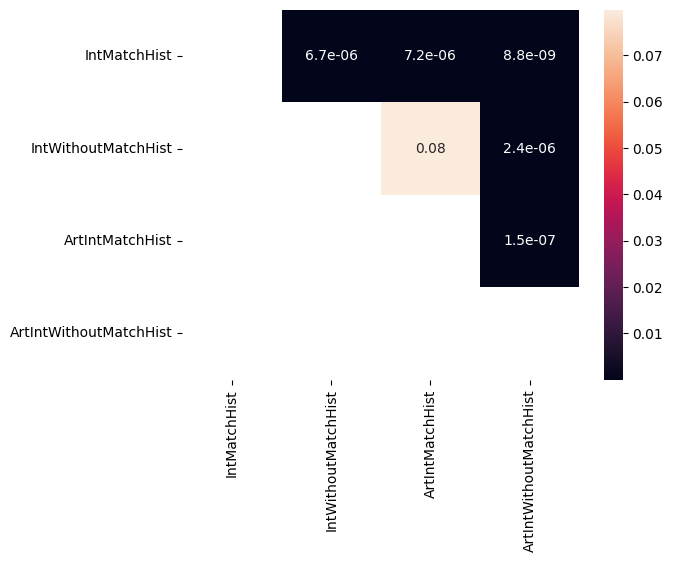

In [70]:
mask = np.tril(np.ones_like(corr_all_df))
sns.heatmap(corr_all_df, mask=mask, annot=True)

In [94]:
# Now do comparison between correct and artificial.
# Make table with differences between matching and non matching tissue types
df1 = all_stats[all_stats.Dataset == 'DCW'].set_index(['metabolite', 'sample_id'])
df2 = all_stats[all_stats.Dataset == 'DAW'].set_index(['metabolite', 'sample_id'])
df3 = df1.merge(df2, left_index=True, right_index=True)
df3 = df3[['Spearman correlation_y','Spearman correlation_x', 'n_y', 'n_x']]
tissue_matching_sigs = fisher_df[(fisher_df.scrExp == 'DCW') & (fisher_df.dstExp == 'DAW')].set_index(['metabolite', 'sample_id'])
df3['diff_pvalues'] = tissue_matching_sigs['pvalue']
df3.to_csv('comparison_correct_artificial_integration.csv')

In [107]:

df1 = all_stats[all_stats['Dataset type'] == 'IntWithoutMatchHist'].set_index(['metabolite', 'sample_id'])
df2 = all_stats[all_stats['Dataset type'] == 'IntMatchHist'].set_index(['metabolite', 'sample_id'])
df3 = df2.merge(df1, left_index=True, right_index=True)
df3 = df3[['Spearman correlation_y','Spearman correlation_x', 'n_y', 'n_x']]
tissue_matching_sigs = fisher_df[(fisher_df.scrExp == 'IntWithoutMatchHist') & (fisher_df.dstExp == 'IntMatchHist')].set_index(['metabolite', 'sample_id'])
df3['diff_pvalues'] = tissue_matching_sigs['pvalue']
df3.to_csv('comparison_correct_artificial_integration.csv')

In [108]:
df3

Spearman correlation_y  Spearman correlation_x  n_y  \
metabolite sample_id                                                        
citrate    P06_7                       0.260                   0.564  542   
           P04_3                       0.419                   0.613  656   
           P08_3                       0.007                   0.083  406   
           P07_7                       0.236                   0.276  522   
           P28_3                       0.481                   0.528  717   
           P30_4                       0.329                   0.599  621   
           P22_4                       0.384                   0.400  370   
zinc       P06_7                       0.197                   0.382  542   
           P04_3                       0.355                   0.516  656   
           P08_3                      -0.052                   0.017  406   
           P07_7                       0.192                   0.266  522   
           P28_3                       0.420                   0.455  717   
           P30_4                       0.244                   0.490  621   
           P22_4                       0.352                   0.364  370   
spermine   P06_7                       0.234                   0.519  539   
           P04_3                       0.428                   0.626  643   
           P08_3                       0.273                   0.372  397   
           P07_7                       0.265                   0.284  534   
           P28_3                       0.424                   0.503  717   
           P30_4                       0.316                   0.551  586   
           P22_4                       0.450                   0.490  364   

                      n_x  diff_pvalues  
metabolite sample_id                     
citrate    P06_7      323     6.344e-08  
           P04_3      397     1.388e-05  
           P08_3      189     1.937e-01  
           P07_7      362     2.643e-01  
           P28_3      568     1.300e-01  
           P30_4      418     1.955e-08  
           P22_4      281     4.044e-01  
zinc       P06_7      323     2.121e-03  
           P04_3      397     8.815e-04  
           P08_3      189     2.178e-01  
           P07_7      362     1.285e-01  
           P28_3      568     2.257e-01  
           P30_4      418     3.096e-06  
           P22_4      281     4.327e-01  
spermine   P06_7      322     1.010e-06  
           P04_3      389     8.784e-06  
           P08_3      192     1.066e-01  
           P07_7      374     3.805e-01  
           P28_3      577     3.603e-02  
           P30_4      397     3.465e-06  
           P22_4      283     2.583e-01

In [102]:
all_stats['Dataset type'].unique()

array(['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist',
       'ArtIntWithoutMatchHist'], dtype=object)

In [73]:
from numpy.random import normal
from scipy.stats import norm

### Control vs. Recurrence analysis

In [74]:
reg_accs_df = pd.read_csv('/mnt/scratch/maximilw/data/multiomics_integration/st_maldi_pos_integration/stats.csv', index_col=0).transpose()
reg_accs_df = reg_accs_df.loc[['001_04', '002_01', '003_02', '047_04' ]]
reg_accs_df

multi_mean_rtre     multi_median_rtre      multi_mean_tre  \
001_04  0.019584991859054608   0.01685664394350595    81.0245907151756   
002_01  0.013774432105783805  0.012794224912467459   55.13773034915338   
003_02   0.03164677344024688   0.03100364027521648  129.62313267218084   
047_04  0.014992059475658478  0.013429541068358995  59.981466935954394   

          multi_median_tre      direct_mean_rtre    direct_median_rtre  \
001_04    69.7372092969531   0.03291162331087248   0.02642009525363826   
002_01  51.214054984803276   0.01285144518986262  0.011595720964544948   
003_02  126.98890091601089  0.029015568156608315  0.028874694668098142   
047_04   53.73001453634085  0.015570403884147384  0.013226354164218936   

           direct_mean_tre   direct_median_tre           duration  \
001_04  136.15787168696826  109.30192976272839  640.6549348831177   
002_01   51.44310226612048   46.41655865279846  652.6104004383087   
003_02  118.84588638472603   118.2688777071866   632.680561542511   
047_04  62.295354902560646   52.91708762711375  648.3847341537476   

       best_strategy  
001_04         multi  
002_01        direct  
003_02        direct  
047_04         multi

In [63]:
# Function for setting length labels.
from collections import Counter


def get_decimal_length(tick_labels):
    lengths = []
    for text in tick_labels:
        text_ = text.get_text()
        if '.' not in text_:
            lengths.append(0)
        else:
            lengths.append(len(text_.split('.')[-1]))
    counter= Counter(lengths)
    return counter
    # l = []
    # for key in counter:
    #     val = counter[key]
    #     l.append((key, val))
    # return max(l, key=lambda x: x[1])[0]

max_decimal_length = get_decimal_length(ax.get_yticklabels())
max_decimal_length

def set_decimal_length_of_tick_label(text, dec_len):
    t = text.get_text()
    if '.' not in t:
        return t
    pref = len(t.split('.')[0])
    return t[:(pref + 1 + dec_len)]

def set_decimal_length_of_tick_labels(tick_labels, dec_len):
    return map(lambda x: set_decimal_length_of_tick_label(x, dec_len), tick_labels)

# f = lambda x: x.get_text()[:3]

In [78]:
# Scatter plots
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_name = '001_04'
for idx, core_name in enumerate(merged_neg_correct_df_red2.core_name.unique()):
    _, axs = plt.subplots(1, 3, figsize=(30, 8))
    ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Citrate', hue='Histology Class', palette=color_mapping, ax=axs[0])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Citrate', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.legend([],[], frameon=False)
    ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Zinc', hue='Histology Class', palette=color_mapping, ax=axs[1])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Zinc', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.set_xticklabels(set_decimal_length_of_tick_labels(ax.get_xticklabels(), 1))
    ax.legend([],[], frameon=False)
    ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=axs[2])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Spermine', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
    plt.savefig(f'/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatterplot_csgs_czs_{core_name}.png', transparent=True)
    plt.close()

/mnt/scratch/tmp/ipykernel_6374/3555824385.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/3555824385.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/3555824385.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/3555824385.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
/mnt/scratch/tmp/ipykernel_6374/3

<Axes: xlabel='Citsper', ylabel='Spermine'>

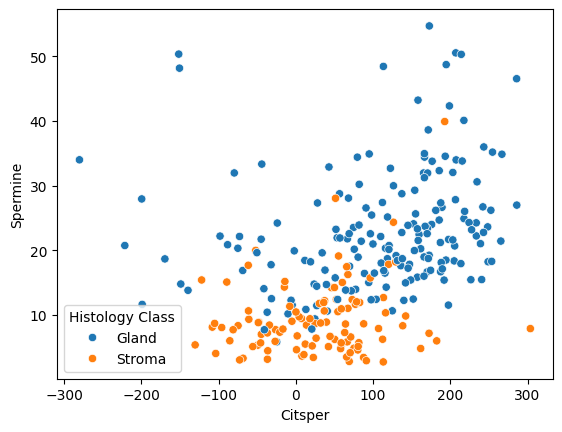

In [80]:
sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping)

In [81]:

if not exists('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatter_plots'):
    os.mkdir('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatter_plots')

In [84]:
# Scatter plots
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[0]
color_mapping['Gland'] = standard_color[1]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# core_name = '001_04'
for core_name in merged_neg_correct_df_red2.core_name.unique():
    fig, axs = plt.subplots(1, 3, figsize=(30, 8))
    ax = sns.regplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Citrate', ax=axs[0], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Citrate', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='met_Citrate', hue='Histology Class', palette=color_mapping, ax=axs[0])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Citrate', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.legend([],[], frameon=False)
    ax = sns.regplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Zinc', ax=axs[1], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Zinc', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='met_Zinc', hue='Histology Class', palette=color_mapping, ax=axs[1])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Zinc', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.set_xticklabels(set_decimal_length_of_tick_labels(ax.get_xticklabels(), 1))
    ax.legend([],[], frameon=False)
    ax = sns.regplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', ax=axs[2], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='met_Spermine', hue='Histology Class', palette=color_mapping, ax=axs[2])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Spermine', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
    fig.tight_layout()
    plt.savefig(f'/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatter_plots/scatterplot_csgs_czs_{core_name}_with_line.png', transparent=True)
    plt.close()

/mnt/scratch/tmp/ipykernel_6374/2824361062.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/2824361062.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/2824361062.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/2824361062.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
/mnt/scratch/tmp/ipykernel_6374/2

In [85]:
# Scatter plots
fontsize=28
tick_fontsize=22
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[0]
color_mapping['Gland'] = standard_color[1]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# core_name = '001_04'
for idx, core_name in enumerate(merged_neg_correct_df_red2.core_name.unique()):
    fig, axs = plt.subplots(2, 2, figsize=(29, 15))
    ax = sns.regplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Citrate', ax=axs[0,0], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Citrate', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='met_Citrate', hue='Histology Class', palette=color_mapping, ax=axs[0])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Citrate', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.legend([],[], frameon=False)
    ax = sns.regplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Zinc', ax=axs[0,1], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Zinc', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='met_Zinc', hue='Histology Class', palette=color_mapping, ax=axs[1])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Zinc', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.set_xticklabels(set_decimal_length_of_tick_labels(ax.get_xticklabels(), 1))
    ax.legend([],[], frameon=False)
    ax = sns.regplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', ax=axs[1,0], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='met_Spermine', hue='Histology Class', palette=color_mapping, ax=axs[2])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Spermine', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
    axs[1,1].axis('off')
    fig.tight_layout()
    fig.subplots_adjust(hspace=.25)
    fig.subplots_adjust(wspace=0.25)
    plt.savefig(f'/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatter_plots/scatterplot_csgs_czs_{core_name}_with_line_square_layout.png', transparent=True)
    plt.close()

/mnt/scratch/tmp/ipykernel_6374/3359211042.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/3359211042.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/3359211042.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/3359211042.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
/mnt/scratch/tmp/ipykernel_6374/3

/mnt/scratch/tmp/ipykernel_24015/3899008331.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3899008331.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3899008331.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/3899008331.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
/mnt/scratch/tmp/ipykernel_24

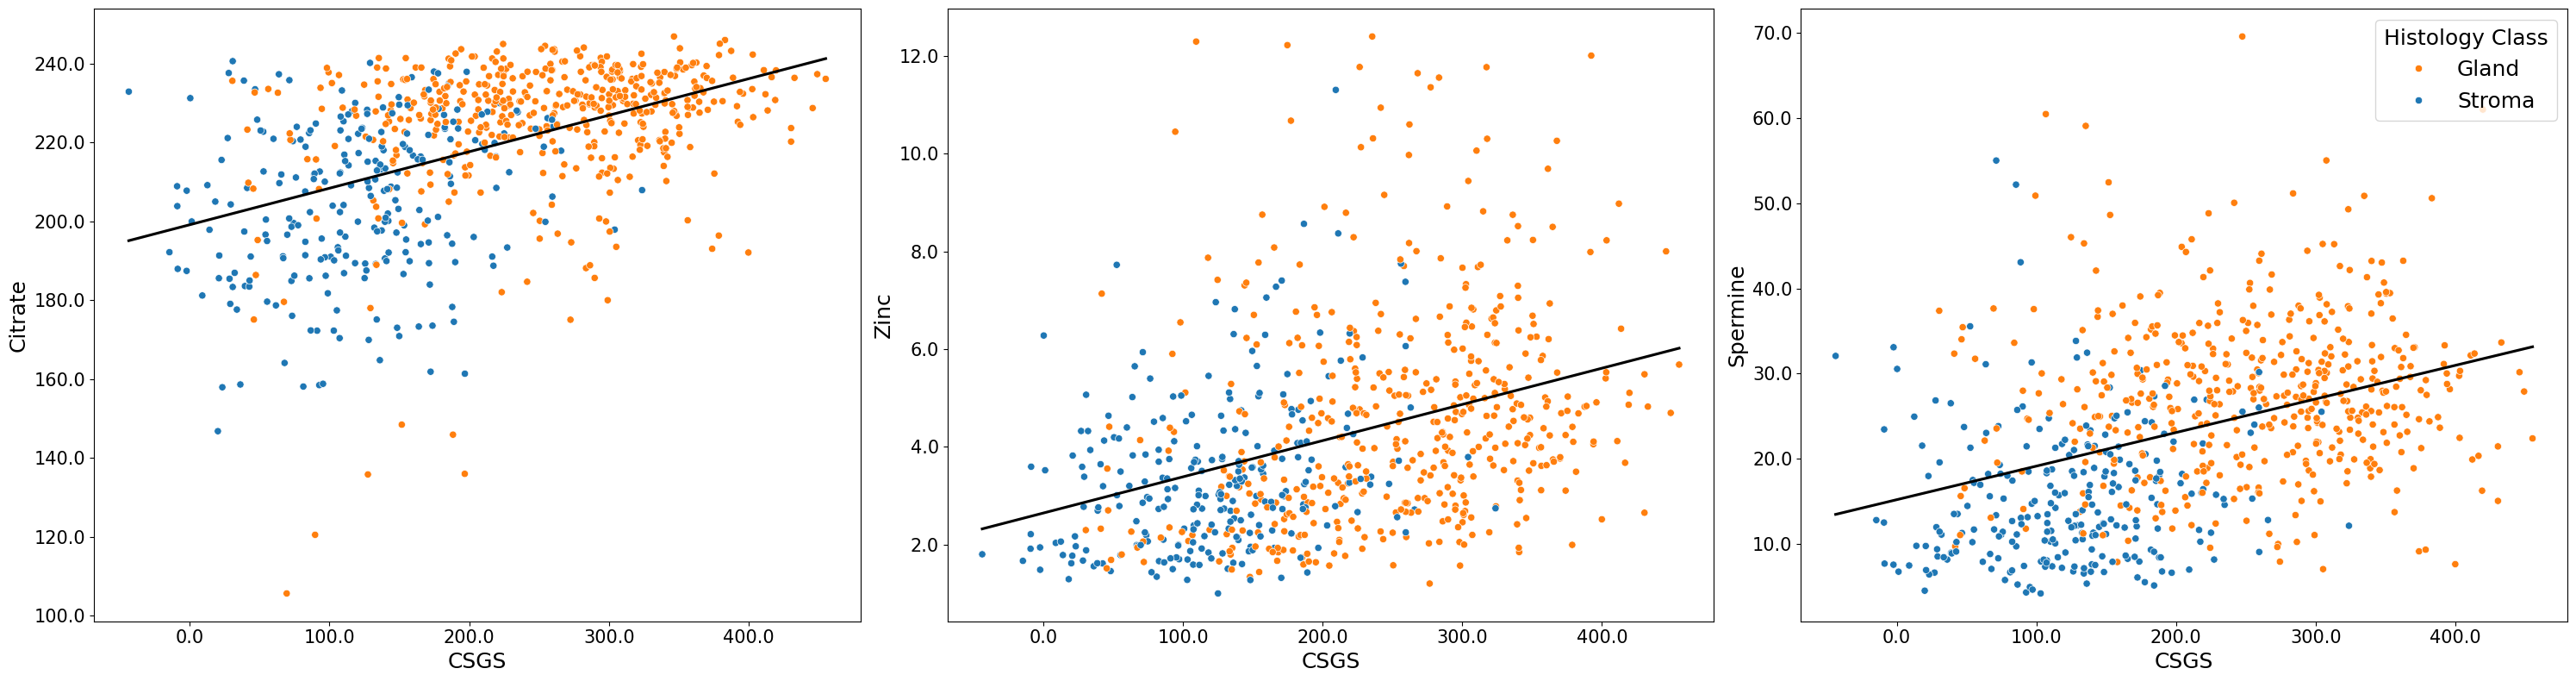

In [65]:
# Scatter plots
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[0]
color_mapping['Gland'] = standard_color[1]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# core_name = '001_04'
for core_name in merged_neg_correct_df_red2.core_name.unique():
    if core_name != '045_03':
        continue
    fig, axs = plt.subplots(1, 3, figsize=(30, 8))
    ax = sns.regplot(data=merged_neg_correct_df_red[merged_neg_correct_df_red.core_name == core_name], x='Citsper', y='Citrate', ax=axs[0], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_neg_correct_df_red[merged_neg_correct_df_red.core_name == core_name], x='Citsper', y='Citrate', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='met_Citrate', hue='Histology Class', palette=color_mapping, ax=axs[0])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Citrate', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.legend([],[], frameon=False)
    ax = sns.regplot(data=merged_neg_correct_df_red[merged_neg_correct_df_red.core_name == core_name], x='Citsper', y='Zinc', ax=axs[1], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_neg_correct_df_red[merged_neg_correct_df_red.core_name == core_name], x='Citsper', y='Zinc', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='met_Zinc', hue='Histology Class', palette=color_mapping, ax=axs[1])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Zinc', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_yticklabels(set_decimal_length_of_tick_labels(ax.get_yticklabels(), 1))
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    ax.set_xticklabels(set_decimal_length_of_tick_labels(ax.get_xticklabels(), 1))
    ax.legend([],[], frameon=False)
    ax = sns.regplot(data=merged_pos_correct_df_red[merged_pos_correct_df_red.core_name == core_name], x='Citsper', y='Spermine', ax=axs[2], scatter=False, line_kws={"color": "black"}, ci=None)
    ax = sns.scatterplot(data=merged_pos_correct_df_red[merged_pos_correct_df_red.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=ax)
    # ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='met_Spermine', hue='Histology Class', palette=color_mapping, ax=axs[2])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Spermine', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
    fig.tight_layout()
    break
    # plt.savefig(f'/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatter_plots/scatterplot_csgs_czs_{core_name}_with_line_without_tissue_matching.png', transparent=True)
    # plt.close()

In [87]:
merged_neg_correct_df_red2.groupby('core_name').apply(lambda x: x.recurrence.iloc[0])

/mnt/scratch/tmp/ipykernel_6374/755123155.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_neg_correct_df_red2.groupby('core_name').apply(lambda x: x.recurrence.iloc[0])


core_name
001_04       control
002_01       control
003_02    recurrence
004_03    recurrence
045_03       control
047_04    recurrence
048_02    recurrence
dtype: object

/mnt/scratch/tmp/ipykernel_6374/1130554386.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/1130554386.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/1130554386.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/1130554386.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_6374/1130554386.py:29: UserWa

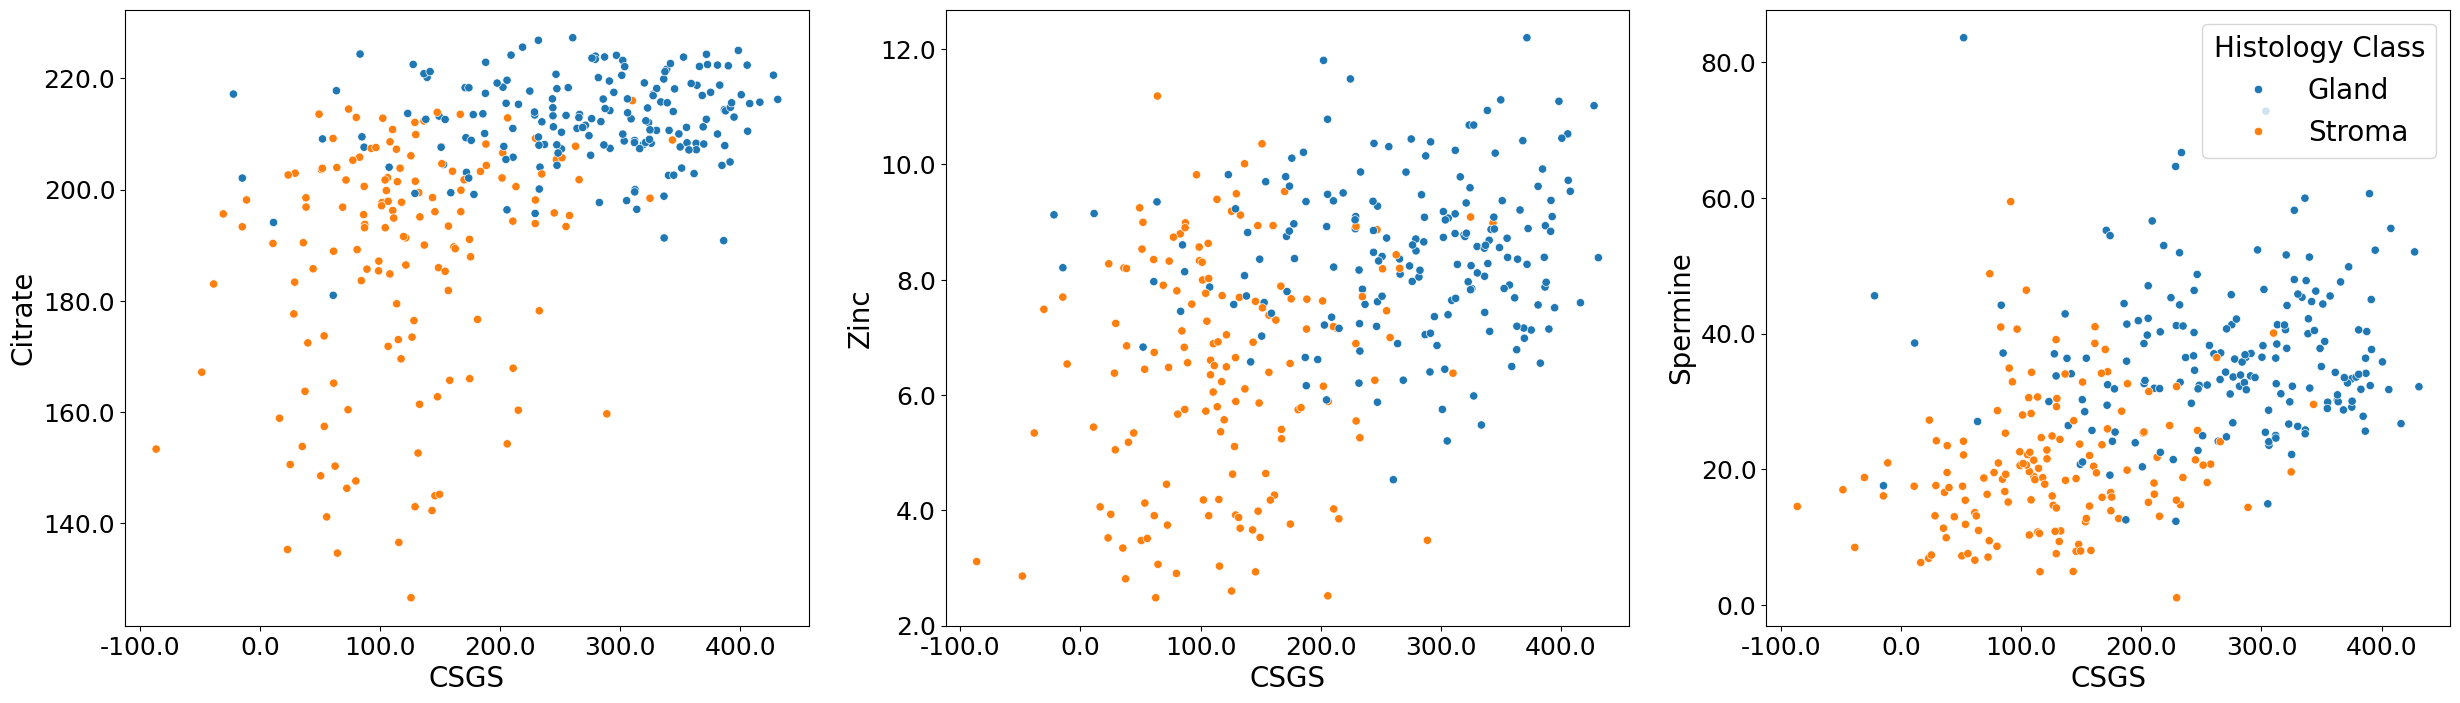

In [88]:
# Scatter plots
fontsize=20
tick_fontsize=18
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_name = '001_04'
_, axs = plt.subplots(1, 3, figsize=(30, 8))
ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Citrate', hue='Histology Class', palette=color_mapping, ax=axs[0])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Citrate', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
ax.legend([],[], frameon=False)
ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == core_name], x='Citsper', y='Zinc', hue='Histology Class', palette=color_mapping, ax=axs[1])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Zinc', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
ax.legend([],[], frameon=False)
ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=axs[2])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Spermine', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
# plt.savefig('../../images/citsper_citrate_analysis/scatterplot_csgs_czs.png', transparent=True)
plt.savefig(f'/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatterplot_csgs_czs.png', transparent=True)

In [89]:
import sys
sys.path.append('../../')

In [90]:
control_samples = ['001_04', '002_01', '045_03']
recurrence_samples = ['003_02', '004_03', '047_04', '048_02']

In [57]:
heatmap_df = all_stats[all_stats['Dataset type'] == 'IntMatchHist']
heatmap_df.set_index('sample_id', inplace=True)
sub_h1 = heatmap_df[heatmap_df.metabolite == 'citrate']['Spearman correlation']
sub_h1.name = 'Citrate'
sub_h2 = heatmap_df[heatmap_df.metabolite == 'zinc']['Spearman correlation']
sub_h2.name = 'Zinc'
sub_h3 = heatmap_df[heatmap_df.metabolite == 'spermine']['Spearman correlation']
sub_h3.name = 'Spermine'
heatmap_df = pd.concat([sub_h1, sub_h2, sub_h3], axis=1)
heatmap_df = heatmap_df.loc[plot_order]

In [61]:
def get_pval_star(value):
    if value <= 0.0001:
        return '****'
    elif value <= 0.001:
        return '***'
    elif value <= 0.01:
        return '**'
    elif value <= 0.05:
        return '*'
    return 'ns'


temp_df = all_stats[all_stats['Dataset type'] == 'IntMatchHist']
temp_df['pval_star'] = temp_df.pvalue.apply(get_pval_star)

temp_df

/mnt/scratch/tmp/ipykernel_24015/2588478469.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['pval_star'] = temp_df.pvalue.apply(get_pval_star)


Spearman correlation        pvalue    n  Dataset type core_id  \
001_04              0.564231  1.513401e-28  323  IntMatchHist  001_04   
002_01              0.613349  2.166576e-42  397  IntMatchHist  002_01   
003_02              0.083298  2.544755e-01  189  IntMatchHist  003_02   
004_03              0.276095  9.344658e-08  362  IntMatchHist  004_03   
045_03              0.527788  4.694456e-42  568  IntMatchHist  045_03   
047_04              0.598520  5.607112e-42  418  IntMatchHist  047_04   
048_02              0.400269  3.090669e-12  281  IntMatchHist  048_02   
001_04              0.381542  1.238627e-12  323  IntMatchHist  001_04   
002_01              0.516194  2.038319e-28  397  IntMatchHist  002_01   
003_02              0.016691  8.196767e-01  189  IntMatchHist  003_02   
004_03              0.266109  2.769443e-07  362  IntMatchHist  004_03   
045_03              0.454575  2.601039e-30  568  IntMatchHist  045_03   
047_04              0.490220  1.175376e-26  418  IntMatchHist  047_04   
048_02              0.364105  3.100740e-10  281  IntMatchHist  048_02   
001_04              0.518806  1.386870e-23  322  IntMatchHist  001_04   
002_01              0.625631  1.191510e-43  389  IntMatchHist  002_01   
003_02              0.371682  1.108729e-07  192  IntMatchHist  003_02   
004_03              0.283562  2.399408e-08  374  IntMatchHist  004_03   
045_03              0.503048  2.444988e-38  577  IntMatchHist  045_03   
047_04              0.551335  6.003603e-33  397  IntMatchHist  047_04   
048_02              0.489775  1.763732e-18  283  IntMatchHist  048_02   

       sample_id background metabolite Experiment type       Dataset  \
001_04     P06_7        C03    citrate    IntMatchHist  IntMatchHist   
002_01     P04_3        C03    citrate    IntMatchHist  IntMatchHist   
003_02     P08_3        C03    citrate    IntMatchHist  IntMatchHist   
004_03     P07_7        C03    citrate    IntMatchHist  IntMatchHist   
045_03     P28_3        C03    citrate    IntMatchHist  IntMatchHist   
047_04     P30_4        C03    citrate    IntMatchHist  IntMatchHist   
048_02     P22_4        C03    citrate    IntMatchHist  IntMatchHist   
001_04     P06_7        NaN       zinc    IntMatchHist  IntMatchHist   
002_01     P04_3        NaN       zinc    IntMatchHist  IntMatchHist   
003_02     P08_3        NaN       zinc    IntMatchHist  IntMatchHist   
004_03     P07_7        NaN       zinc    IntMatchHist  IntMatchHist   
045_03     P28_3        NaN       zinc    IntMatchHist  IntMatchHist   
047_04     P30_4        NaN       zinc    IntMatchHist  IntMatchHist   
048_02     P22_4        NaN       zinc    IntMatchHist  IntMatchHist   
001_04     P06_7        NaN   spermine    IntMatchHist  IntMatchHist   
002_01     P04_3        NaN   spermine    IntMatchHist  IntMatchHist   
003_02     P08_3        NaN   spermine    IntMatchHist  IntMatchHist   
004_03     P07_7        NaN   spermine    IntMatchHist  IntMatchHist   
045_03     P28_3        NaN   spermine    IntMatchHist  IntMatchHist   
047_04     P30_4        NaN   spermine    IntMatchHist  IntMatchHist   
048_02     P22_4        NaN   spermine    IntMatchHist  IntMatchHist   

        z_transformed_correlations pval_star  
001_04                    0.639019      ****  
002_01                    0.714272      ****  
003_02                    0.083492        ns  
004_03                    0.283450      ****  
045_03                    0.587074      ****  
047_04                    0.690837      ****  
048_02                    0.423970      ****  
001_04                    0.401864      ****  
002_01                    0.571137      ****  
003_02                    0.016693        ns  
004_03                    0.272671      ****  
045_03                    0.490452      ****  
047_04                    0.536350      ****  
048_02                    0.381610      ****  
001_04                    0.574705      ****  
002_01                    0.734204      ****  
003_02           

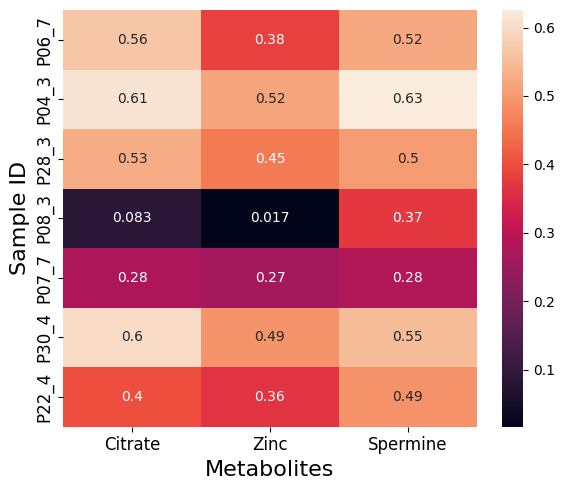

In [92]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
sns.heatmap(heatmap_df, ax=axs, annot=True)
axs.set_ylabel('Sample ID', fontsize=16)
axs.set_xlabel('Metabolites', fontsize=16)
axs.set_yticklabels(axs.get_yticklabels(), size=12)
axs.set_xticklabels(axs.get_xticklabels(), size=12)
fig.tight_layout()
# plt.savefig('../../images/citsper_citrate_analysis/heatmap_correlations_cczs.png', transparent=True)
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/heatmap_correlations_cczs.png', transparent=True)

In [93]:
heatmap_df

Citrate      Zinc  Spermine
sample_id                              
P06_7      0.564231  0.381542  0.518806
P04_3      0.613349  0.516194  0.625631
P28_3      0.527788  0.454575  0.503048
P08_3      0.083298  0.016691  0.371682
P07_7      0.276095  0.266109  0.283562
P30_4      0.598520  0.490220  0.551335
P22_4      0.400269  0.364105  0.489775

In [94]:
all_stats.loc['045_03']

Spearman correlation        pvalue    n            Dataset type  \
045_03              0.527788  4.694456e-42  568            IntMatchHist   
045_03              0.480509  1.076515e-42  717     IntWithoutMatchHist   
045_03              0.305336  3.488929e-09  359         ArtIntMatchHist   
045_03              0.038602  3.040127e-01  711  ArtIntWithoutMatchHist   
045_03              0.454575  2.601039e-30  568            IntMatchHist   
045_03              0.420287  4.693026e-32  717     IntWithoutMatchHist   
045_03              0.149560  4.513171e-03  359         ArtIntMatchHist   
045_03              0.028597  4.464534e-01  711  ArtIntWithoutMatchHist   
045_03              0.503048  2.444988e-38  577            IntMatchHist   
045_03              0.423986  1.195789e-32  717     IntWithoutMatchHist   
045_03              0.372743  2.422370e-13  361         ArtIntMatchHist   
045_03              0.048800  1.949570e-01  707  ArtIntWithoutMatchHist   

       core_id sample_id background metabolite         Experiment type  \
045_03  045_03     P28_3        C03    citrate            IntMatchHist   
045_03  045_03     P28_3        C03    citrate     IntWithoutMatchHist   
045_03  045_03     P28_3        C03    citrate         ArtIntMatchHist   
045_03  045_03     P28_3        C03    citrate  ArtIntWithoutMatchHist   
045_03  045_03     P28_3        NaN       zinc            IntMatchHist   
045_03  045_03     P28_3        NaN       zinc     IntWithoutMatchHist   
045_03  045_03     P28_3        NaN       zinc         ArtIntMatchHist   
045_03  045_03     P28_3        NaN       zinc  ArtIntWithoutMatchHist   
045_03  045_03     P28_3        NaN   spermine            IntMatchHist   
045_03  045_03     P28_3        NaN   spermine     IntWithoutMatchHist   
045_03  045_03     P28_3        NaN   spermine         ArtIntMatchHist   
045_03  045_03     P28_3        NaN   spermine  ArtIntWithoutMatchHist   

                       Dataset  z_transformed_correlations  
045_03            IntMatchHist                    0.587074  
045_03     IntWithoutMatchHist                    0.523646  
045_03         ArtIntMatchHist                    0.315394  
045_03  ArtIntWithoutMatchHist                    0.038621  
045_03            IntMatchHist                    0.490452  
045_03     IntWithoutMatchHist                    0.448040  
045_03         ArtIntMatchHist                    0.150691  
045_03  ArtIntWithoutMatchHist                    0.028605  
045_03            IntMatchHist                    0.553378  
045_03     IntWithoutMatchHist                    0.452542  
045_03         ArtIntMatchHist                    0.391605  
045_03  ArtIntWithoutMatchHist                    0.048839

In [95]:
ctr_df = pd.DataFrame('control', index=control_samples, columns=['status'])
rec_df = pd.DataFrame('recurrence', index=recurrence_samples, columns=['status'])
status_df = pd.concat([ctr_df, rec_df], axis=0)
nc_2_cit_core_sp_stats['status'] = status_df
nc_1_cit_core_sp_stats['status'] = status_df
nc_2_zinc_core_sp_stats['status'] = status_df
nc_1_zinc_core_sp_stats['status'] = status_df
pc_2_spe_core_sp_stats['status'] = status_df
pc_1_spe_core_sp_stats['status'] = status_df
nw_2_cit_core_sp_stats['status'] = status_df
nw_1_cit_core_sp_stats['status'] = status_df
nw_2_zinc_core_sp_stats['status'] = status_df
nw_1_zinc_core_sp_stats['status'] = status_df
pw_2_spe_core_sp_stats['status'] = status_df
pw_1_spe_core_sp_stats['status'] = status_df

In [96]:
import numpy as np

def get_mm_stats(df, p=0.0001):
    stats = {}
    df = df[df.pvalue <= p]
    if df.shape[0] == 0:
        stats['mean'] = np.nan
        stats['median'] = np.nan
        stats['std'] = np.nan
        stats['n'] = df.shape[0]
    else:
        stats['mean'] = df.statistic.mean()
        stats['median'] = df.statistic.median()
        stats['std'] = df.statistic.std()
        stats['n'] = df.shape[0]
    return pd.DataFrame(stats, index=[0])

def build_mm_df(df, exp_name, group_col='status'):
    temp_df = df.groupby(group_col).apply(lambda x: get_mm_stats(x))
    temp_df['exp'] = exp_name 
    temp_df.index = [x[0] for x in temp_df.index]
    temp_df = temp_df.reset_index()

    all_row =  get_mm_stats(df)
    all_row['exp'] = exp_name 
    all_row['index'] = 'all'
    temp_df = pd.concat([temp_df, all_row]).reset_index(drop=True)
    return temp_df

nc2cit_df = build_mm_df(nc_2_cit_core_sp_stats, 'nc_2_cit')
nc1cit_df = build_mm_df(nc_1_cit_core_sp_stats, 'nc_1_cit')
nc2zinc_df = build_mm_df(nc_2_zinc_core_sp_stats, 'nc_2_zinc')
nc1zinc_df = build_mm_df(nc_1_zinc_core_sp_stats, 'nc_1_zinc')
pc2spe_df = build_mm_df(pc_2_spe_core_sp_stats, 'pc_2_spe')
pc1spe_df = build_mm_df(pc_1_spe_core_sp_stats, 'pc_1_spe')
nw2cit_df = build_mm_df(nw_2_cit_core_sp_stats, 'nw_2_cit')
nw1cit_df = build_mm_df(nw_1_cit_core_sp_stats, 'nw_1_cit')
nw2zinc_df = build_mm_df(nw_2_zinc_core_sp_stats, 'nw_2_zinc')
nw1zinc_df = build_mm_df(nw_1_zinc_core_sp_stats, 'nw_1_zinc')
pw2spe_df = build_mm_df(pw_2_spe_core_sp_stats, 'pw_2_spe')
pw1spe_df = build_mm_df(pw_1_spe_core_sp_stats, 'pw_1_spe')
mm_df = pd.concat([nc2cit_df, 
                   nc1cit_df, 
                   nw2cit_df, 
                   nw1cit_df, 
                   nc2zinc_df, 
                   nc1zinc_df, 
                   nw2zinc_df, 
                   nw1zinc_df,
                   pc2spe_df,
                   pc1spe_df,
                   pw2spe_df,
                   pw1spe_df])

/mnt/scratch/tmp/ipykernel_6374/1859529657.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = df.groupby(group_col).apply(lambda x: get_mm_stats(x))
/mnt/scratch/tmp/ipykernel_6374/1859529657.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = df.groupby(group_col).apply(lambda x: get_mm_stats(x))
/mnt/scratch/tmp/ipykernel_6374/1859529657.py:19: DeprecationWarning: DataFrameGroupBy.a

In [97]:
mm_df

index      mean    median       std  n        exp
0     control  0.568456  0.564231  0.042937  3   nc_2_cit
1  recurrence  0.424961  0.400269  0.162624  3   nc_2_cit
2         all  0.496709  0.546010  0.132262  6   nc_2_cit
0     control  0.386641  0.419355  0.113809  3   nc_1_cit
1  recurrence  0.316345  0.329358  0.075007  3   nc_1_cit
2         all  0.351493  0.356676  0.094413  6   nc_1_cit
0     control  0.325696  0.328816  0.018992  3   nw_2_cit
1  recurrence  0.464828  0.464828       NaN  1   nw_2_cit
2         all  0.360479  0.335875  0.071274  4   nw_2_cit
0     control       NaN       NaN       NaN  0   nw_1_cit
1  recurrence  0.194010  0.194010       NaN  1   nw_1_cit
2         all  0.194010  0.194010       NaN  1   nw_1_cit
0     control  0.450770  0.454575  0.067406  3  nc_2_zinc
1  recurrence  0.373478  0.364105  0.112349  3  nc_2_zinc
2         all  0.412124  0.418059  0.093052  6  nc_2_zinc
0     control  0.324377  0.355413  0.114625  3  nc_1_zinc
1  recurrence  0.263079  0.244455  0.081576  3  nc_1_zinc
2         all  0.293728  0.298406  0.095103  6  nc_1_zinc
0     control  0.372623  0.372623  0.017279  2  nw_2_zinc
1  recurrence  0.485560  0.485560       NaN  1  nw_2_zinc
2         all  0.410268  0.384841  0.066339  3  nw_2_zinc
0     control       NaN       NaN       NaN  0  nw_1_zinc
1  recurrence -0.014083 -0.014083  0.288523  2  nw_1_zinc
2         all -0.014083 -0.014083  0.288523  2  nw_1_zinc
0     control  0.549161  0.518806  0.066691  3   pc_2_spe
1  recurrence  0.424089  0.430729  0.119723  4   pc_2_spe
2         all  0.477691  0.503048  0.114538  7   pc_2_spe
0     control  0.362100  0.423986  0.110718  3   pc_1_spe
1  recurrence  0.325770  0.294502  0.085519  4   pc_1_spe
2         all  0.341340  0.315903  0.090111  7   pc_1_spe
0     control  0.346793  0.343911  0.024636  3   pw_2_spe
1  recurrence  0.414301  0.414301       NaN  1   pw_2_spe
2         all  0.363670  0.358327  0.039293  4   pw_2_spe
0     control       NaN       NaN       NaN  0   pw_1_spe
1  recurrence       NaN       NaN       NaN  0   pw_1_spe
2         all       NaN       NaN       NaN  0   pw_1_spe

In [98]:
mm_df['experiment_no'] = mm_df.exp.apply(lambda x: int(x.split('_')[1]))
mm_df['correct'] = mm_df.exp.apply(lambda x: True if x[1] == 'c' else False)
mm_df.to_csv('group_czs.csv')

In [99]:
mm_df

index      mean    median       std  n        exp  experiment_no  \
0     control  0.568456  0.564231  0.042937  3   nc_2_cit              2   
1  recurrence  0.424961  0.400269  0.162624  3   nc_2_cit              2   
2         all  0.496709  0.546010  0.132262  6   nc_2_cit              2   
0     control  0.386641  0.419355  0.113809  3   nc_1_cit              1   
1  recurrence  0.316345  0.329358  0.075007  3   nc_1_cit              1   
2         all  0.351493  0.356676  0.094413  6   nc_1_cit              1   
0     control  0.325696  0.328816  0.018992  3   nw_2_cit              2   
1  recurrence  0.464828  0.464828       NaN  1   nw_2_cit              2   
2         all  0.360479  0.335875  0.071274  4   nw_2_cit              2   
0     control       NaN       NaN       NaN  0   nw_1_cit              1   
1  recurrence  0.194010  0.194010       NaN  1   nw_1_cit              1   
2         all  0.194010  0.194010       NaN  1   nw_1_cit              1   
0     control  0.450770  0.454575  0.067406  3  nc_2_zinc              2   
1  recurrence  0.373478  0.364105  0.112349  3  nc_2_zinc              2   
2         all  0.412124  0.418059  0.093052  6  nc_2_zinc              2   
0     control  0.324377  0.355413  0.114625  3  nc_1_zinc              1   
1  recurrence  0.263079  0.244455  0.081576  3  nc_1_zinc              1   
2         all  0.293728  0.298406  0.095103  6  nc_1_zinc              1   
0     control  0.372623  0.372623  0.017279  2  nw_2_zinc              2   
1  recurrence  0.485560  0.485560       NaN  1  nw_2_zinc              2   
2         all  0.410268  0.384841  0.066339  3  nw_2_zinc              2   
0     control       NaN       NaN       NaN  0  nw_1_zinc              1   
1  recurrence -0.014083 -0.014083  0.288523  2  nw_1_zinc              1   
2         all -0.014083 -0.014083  0.288523  2  nw_1_zinc              1   
0     control  0.549161  0.518806  0.066691  3   pc_2_spe              2   
1  recurrence  0.424089  0.430729  0.119723  4   pc_2_spe              2   
2         all  0.477691  0.503048  0.114538  7   pc_2_spe              2   
0     control  0.362100  0.423986  0.110718  3   pc_1_spe              1   
1  recurrence  0.325770  0.294502  0.085519  4   pc_1_spe              1   
2         all  0.341340  0.315903  0.090111  7   pc_1_spe              1   
0     control  0.346793  0.343911  0.024636  3   pw_2_spe              2   
1  recurrence  0.414301  0.414301       NaN  1   pw_2_spe              2   
2         all  0.363670  0.358327  0.039293  4   pw_2_spe              2   
0     control       NaN       NaN       NaN  0   pw_1_spe              1   
1  recurrence       NaN       NaN       NaN  0   pw_1_spe              1   
2         all       NaN       NaN       NaN  0   pw_1_spe              1   

   correct  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False

### Plot counts before and after integration

In [100]:
Counter(merged_neg_correct_df_red['Histology Class'])

Counter({'Gland': 2109, 'Stroma': 1725})

In [101]:
Counter(merged_neg_correct_df_red2['Histology Class'])

Counter({'Stroma': 1354, 'Gland': 1184})

In [102]:
Counter(merged_neg_wrong_df_red2['Histology Class'])

Counter({'Stroma': 1013, 'Gland': 856})

In [103]:
data = {
    'Stroma': (1725, 1354, 1013),
    'Glands': (2109, 1184, 856),
    # '3': (189.95, 195.82, 217.19),
}

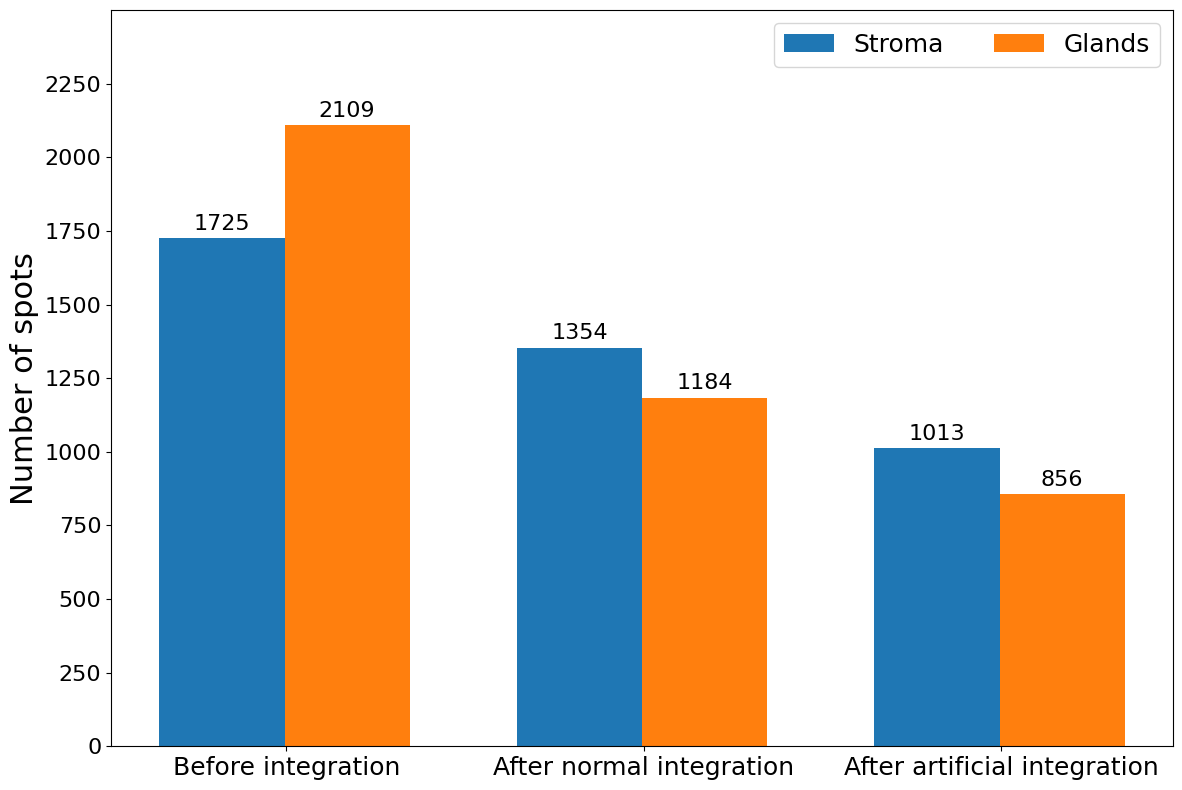

In [104]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(12,8))
states = ("Before Integration", "After Integration", "After artificial integration")
states_text = ('Before integration', 'After normal integration', 'After artificial integration')
# data = {
#     'Stroma': (2115, 1387, 994),
#     'Glands': (1724, 1200, 836),
#     # '3': (189.95, 195.82, 217.19),
# }
# data = {
#     'Stroma': (2126, 1358, 948),
#     'Glands': (1722, 1179, 810),
#     # '3': (189.95, 195.82, 217.19),
# }
data = {
    'Stroma': (1725, 1354, 1013),
    'Glands': (2109, 1184, 856),
    # '3': (189.95, 195.82, 217.19),
}


x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = axs.bar(x + offset, measurement, width, label=attribute)
    axs.bar_label(rects, padding=3, fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('Number of spots', fontsize=22)
axs.set_yticks(axs.get_yticks(), [str(int(x)) for x in axs.get_yticks()], fontsize=16)
# ax.set_xlabel('
# ax.set_title('Penguin attributes by species')
axs.set_xticks(x + width-0.17, states_text, fontsize=18)
axs.legend(loc='upper right', ncols=3, fontsize=18)
axs.set_ylim(0, 2500)

# plt.show()
fig.tight_layout()
# plt.savefig('../../images/citsper_citrate_analysis/stroma_gland_neg_dist.png')
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/stroma_gland_neg_dist.png')

In [105]:
# Compute matching tissue types

merged_neg_correct_df_red2.core_name.unique()

array(['002_01', '001_04', '045_03', '004_03', '003_02', '047_04',
       '048_02'], dtype=object)

In [106]:
far_cores = ['001_04', '002_01', '003_02', '004_03']
near_cores = ['045_03', '047_04', '048_02']

In [107]:
n100 = merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name.isin(far_cores)].shape[0]
n50 = merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name.isin(near_cores)].shape[0]
n80 = merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name.isin(far_cores)].shape[0]
n40 = merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name.isin(near_cores)].shape[0]
n40, n80, n50, n100

(1257, 1277, 1267, 1271)

In [108]:
near_neg_cores = merged_neg_correct_df_red[merged_neg_correct_df_red.core_name.isin(near_cores)]
far_neg_cores = merged_neg_correct_df_red[merged_neg_correct_df_red.core_name.isin(far_cores)]
near_pos_cores = merged_pos_correct_df_red[merged_pos_correct_df_red.core_name.isin(near_cores)]
far_pos_cores = merged_pos_correct_df_red[merged_pos_correct_df_red.core_name.isin(far_cores)]
n40 = (near_pos_cores['Histology Class'] == near_pos_cores.msi_hist).sum()
n50 = (near_neg_cores['Histology Class'] == near_neg_cores.msi_hist).sum()
n80 = (far_pos_cores['Histology Class'] == far_pos_cores.msi_hist).sum()
n100 = (far_neg_cores['Histology Class'] == far_neg_cores.msi_hist).sum()

n40/near_pos_cores.shape[0], n50/near_neg_cores.shape[0], n80/far_pos_cores.shape[0], n100/far_neg_cores.shape[0]

(0.7540491901619676,
 0.7418032786885246,
 0.6043539990534784,
 0.5978363123236125)

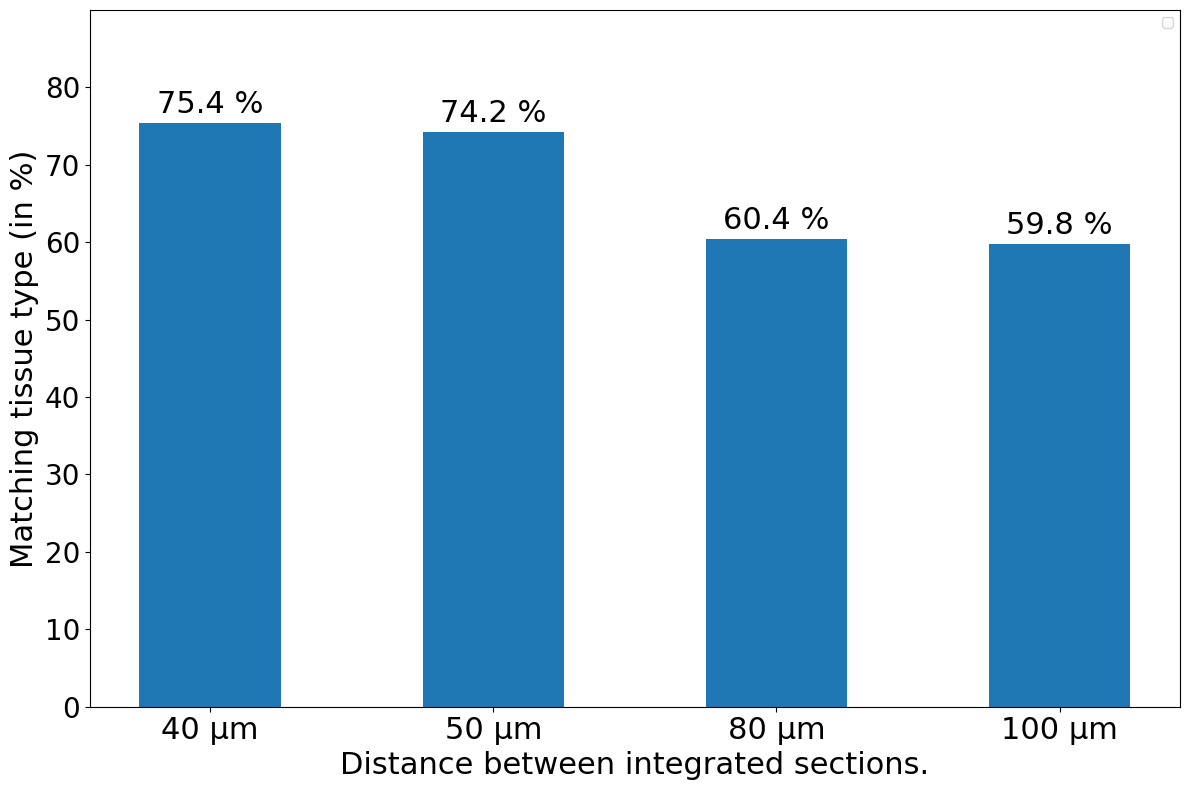

In [66]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(12,8))
states = ('40 μm', '50 μm', '80 μm', '100 μm')
states_text = states
# states_text = ('No integration', 'Integration', 'Artificial integration')
# data = {
#     'Stroma': (2120, 1505, 1095),
#     'Glands': (1729, 1035, 660),
#     # '3': (189.95, 195.82, 217.19),
# }
# data = {'spots': (74.8, 71.0, 61.1, 61.8)}
data = {'spots': (75.4, 74.2, 60.4, 59.8)}

x = np.arange(len(states))  # the label locations
width = 0.5  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = axs.bar(x + offset, measurement, width, label=attribute)
    axs.bar_label(rects, padding=3, fontsize=22, labels=[f'{x} %' for x in measurement])
    multiplier += .5

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('Matching tissue type (in %)', fontsize=22)
axs.set_yticks(axs.get_yticks(), [str(int(x)) for x in axs.get_yticks()], fontsize=20)
axs.set_xlabel('Distance between integrated sections.', fontsize=22)
# ax.set_title('Penguin attributes by species')
# axs.set_xticks(x + width - 0.75, states_text, fontsize=18)
axs.set_xticks(x + width - 0.5, states_text, fontsize=22)
axs.set_yticks(axs.get_yticks(), [str(int(x)) for x in axs.get_yticks()], fontsize=20)
axs.legend(loc='upper right', ncols=3, fontsize=22)
axs.set_ylim(0, 90)
axs.legend([], [], frameon=True)

# plt.show()
fig.tight_layout()
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/matching_spots_barplot.png')
# plt.savefig('../../images/citsper_citrate_analysis/matching_spots_barplot.png')

(0.0, 1.0)

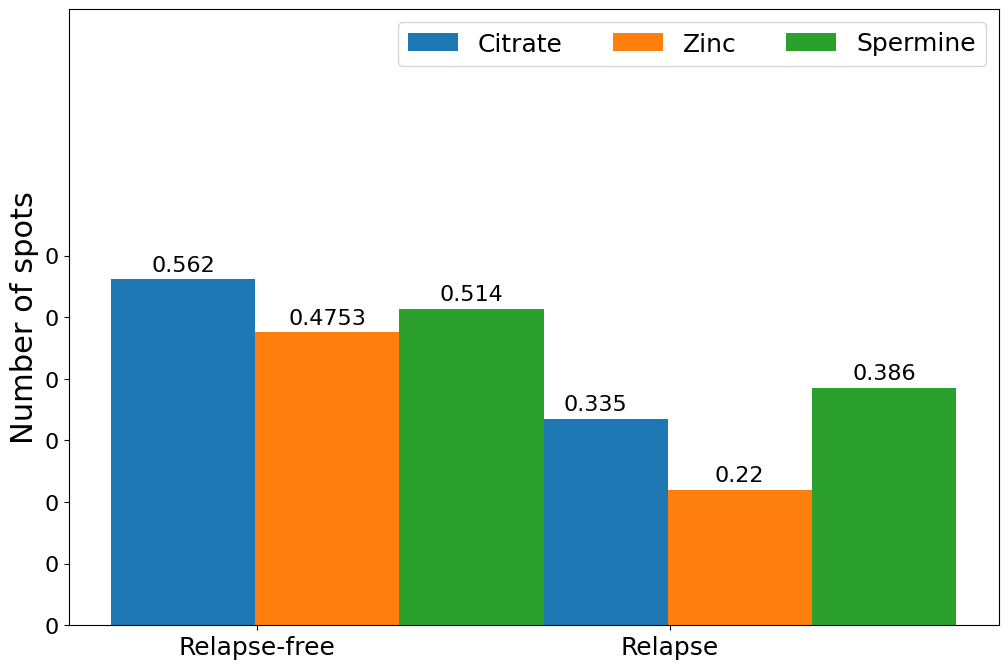

In [110]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

_, axs = plt.subplots(1, 1, figsize=(12,8))
# states = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
# states_text = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
states = ("Relapse-free", "Relapse")
states_text = ("Relapse-free", "Relapse")
data = {
    'Citrate': (0.562, 0.335),
    'Zinc': (0.4753, 0.220),
    'Spermine': (0.514, 0.386),
    # '3': (189.95, 195.82, 217.19),
}

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = axs.bar(x + offset, measurement, width, label=attribute)
    axs.bar_label(rects, padding=3, fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('Number of spots', fontsize=22)
axs.set_yticks(axs.get_yticks(), [str(int(x)) for x in axs.get_yticks()], fontsize=16)
# ax.set_xlabel('
# ax.set_title('Penguin attributes by species')
axs.set_xticks(x + width-0.17, states_text, fontsize=18)
axs.legend(loc='upper right', ncols=3, fontsize=18)
axs.set_ylim(0, 1)

# plt.show()
# plt.savefig('images/citsper_citrate_analysis/stroma_gland_neg_dist.png')

In [111]:
mm_df

index      mean    median       std  n        exp  experiment_no  \
0     control  0.568456  0.564231  0.042937  3   nc_2_cit              2   
1  recurrence  0.424961  0.400269  0.162624  3   nc_2_cit              2   
2         all  0.496709  0.546010  0.132262  6   nc_2_cit              2   
0     control  0.386641  0.419355  0.113809  3   nc_1_cit              1   
1  recurrence  0.316345  0.329358  0.075007  3   nc_1_cit              1   
2         all  0.351493  0.356676  0.094413  6   nc_1_cit              1   
0     control  0.325696  0.328816  0.018992  3   nw_2_cit              2   
1  recurrence  0.464828  0.464828       NaN  1   nw_2_cit              2   
2         all  0.360479  0.335875  0.071274  4   nw_2_cit              2   
0     control       NaN       NaN       NaN  0   nw_1_cit              1   
1  recurrence  0.194010  0.194010       NaN  1   nw_1_cit              1   
2         all  0.194010  0.194010       NaN  1   nw_1_cit              1   
0     control  0.450770  0.454575  0.067406  3  nc_2_zinc              2   
1  recurrence  0.373478  0.364105  0.112349  3  nc_2_zinc              2   
2         all  0.412124  0.418059  0.093052  6  nc_2_zinc              2   
0     control  0.324377  0.355413  0.114625  3  nc_1_zinc              1   
1  recurrence  0.263079  0.244455  0.081576  3  nc_1_zinc              1   
2         all  0.293728  0.298406  0.095103  6  nc_1_zinc              1   
0     control  0.372623  0.372623  0.017279  2  nw_2_zinc              2   
1  recurrence  0.485560  0.485560       NaN  1  nw_2_zinc              2   
2         all  0.410268  0.384841  0.066339  3  nw_2_zinc              2   
0     control       NaN       NaN       NaN  0  nw_1_zinc              1   
1  recurrence -0.014083 -0.014083  0.288523  2  nw_1_zinc              1   
2         all -0.014083 -0.014083  0.288523  2  nw_1_zinc              1   
0     control  0.549161  0.518806  0.066691  3   pc_2_spe              2   
1  recurrence  0.424089  0.430729  0.119723  4   pc_2_spe              2   
2         all  0.477691  0.503048  0.114538  7   pc_2_spe              2   
0     control  0.362100  0.423986  0.110718  3   pc_1_spe              1   
1  recurrence  0.325770  0.294502  0.085519  4   pc_1_spe              1   
2         all  0.341340  0.315903  0.090111  7   pc_1_spe              1   
0     control  0.346793  0.343911  0.024636  3   pw_2_spe              2   
1  recurrence  0.414301  0.414301       NaN  1   pw_2_spe              2   
2         all  0.363670  0.358327  0.039293  4   pw_2_spe              2   
0     control       NaN       NaN       NaN  0   pw_1_spe              1   
1  recurrence       NaN       NaN       NaN  0   pw_1_spe              1   
2         all       NaN       NaN       NaN  0   pw_1_spe              1   

   correct  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False

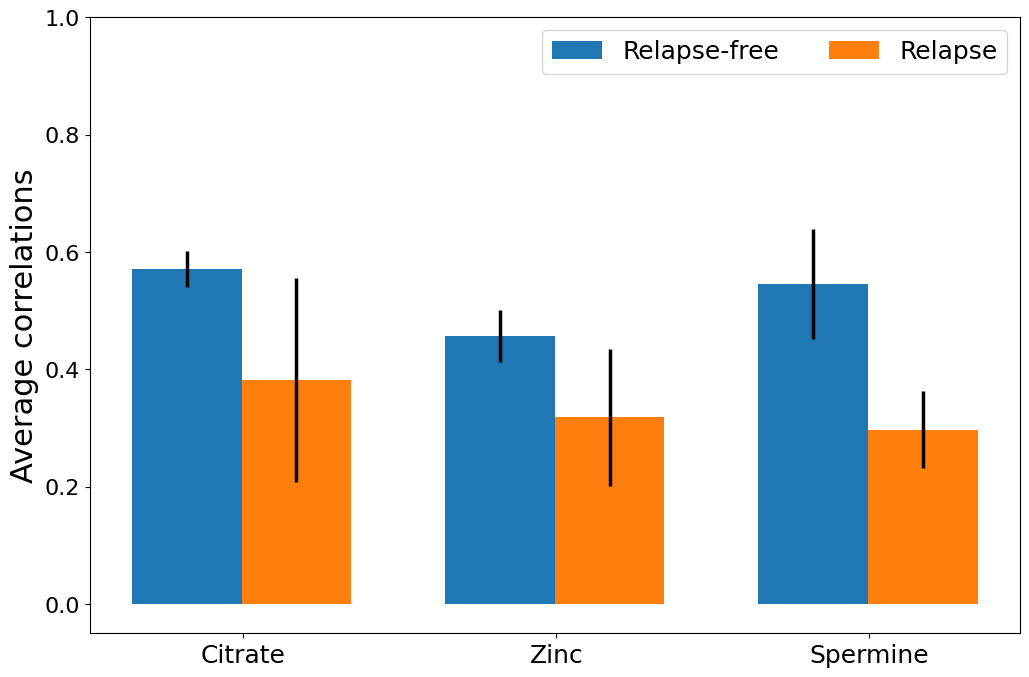

In [113]:

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(12,8))
# states = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
# states_text = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
states = ('Citrate', 'Zinc', 'Spermine')
states_text = ('Citrate', 'Zinc', 'Spermine')
# data = {
#     'Relapse-free': (0.562, 0.4753, 0.514),
#     'Relapse': (0.335, 0.220, 0.386),
#     # '3': (189.95, 195.82, 217.19),
# }
# data = {
#     'Relapse-free': ((0.562, 0.4753, 0.514), np.array((0.040, 0.065, 0.097))),
#     'Relapse': ((0.335, 0.220, 0.386), np.array((0.160, 0.244, 0.134))),
#     # '3': (189.95, 195.82, 217.19),
# }
data = {
    'Relapse-free': ((0.571, 0.4563, 0.5459), np.array((0.031, 0.044, 0.0936))),
    'Relapse': ((0.382, 0.318, 0.297), np.array((0.174, 0.117, 0.066))),
}

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = axs.bar(x + offset, measurement[0], width, label=attribute, yerr=measurement[1], error_kw={'lw': 2.5} )
    # axs.bar_label(rects, padding=3, fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('Average correlations', fontsize=22)
# ax.set_xlabel('
# ax.set_title('Penguin attributes by species')
axs.set_xticks(x + width-0.17, states_text, fontsize=18)
axs.legend(loc='upper right', ncols=3, fontsize=18)
axs.set_ylim(-0.05, 1)
axs.set_yticks(axs.get_yticks()[1:], ['{:.1f}'.format(x) for x in axs.get_yticks()[1:]], fontsize=16)

# plt.show()
# fig.tight_layout()
# plt.savefig('../../images/citsper_citrate_analysis/relapse_relapsefree_barplot.png')

In [114]:

data = {
    'Relapse-free': ((0.571, 0.4563, 0.5459), np.array((0.031, 0.044, 0.0936))),
    'Relapse': ((0.382, 0.318, 0.297), np.array((0.174, 0.117, 0.066))),
}

In [115]:
mm_df

index      mean    median       std  n        exp  experiment_no  \
0     control  0.568456  0.564231  0.042937  3   nc_2_cit              2   
1  recurrence  0.424961  0.400269  0.162624  3   nc_2_cit              2   
2         all  0.496709  0.546010  0.132262  6   nc_2_cit              2   
0     control  0.386641  0.419355  0.113809  3   nc_1_cit              1   
1  recurrence  0.316345  0.329358  0.075007  3   nc_1_cit              1   
2         all  0.351493  0.356676  0.094413  6   nc_1_cit              1   
0     control  0.325696  0.328816  0.018992  3   nw_2_cit              2   
1  recurrence  0.464828  0.464828       NaN  1   nw_2_cit              2   
2         all  0.360479  0.335875  0.071274  4   nw_2_cit              2   
0     control       NaN       NaN       NaN  0   nw_1_cit              1   
1  recurrence  0.194010  0.194010       NaN  1   nw_1_cit              1   
2         all  0.194010  0.194010       NaN  1   nw_1_cit              1   
0     control  0.450770  0.454575  0.067406  3  nc_2_zinc              2   
1  recurrence  0.373478  0.364105  0.112349  3  nc_2_zinc              2   
2         all  0.412124  0.418059  0.093052  6  nc_2_zinc              2   
0     control  0.324377  0.355413  0.114625  3  nc_1_zinc              1   
1  recurrence  0.263079  0.244455  0.081576  3  nc_1_zinc              1   
2         all  0.293728  0.298406  0.095103  6  nc_1_zinc              1   
0     control  0.372623  0.372623  0.017279  2  nw_2_zinc              2   
1  recurrence  0.485560  0.485560       NaN  1  nw_2_zinc              2   
2         all  0.410268  0.384841  0.066339  3  nw_2_zinc              2   
0     control       NaN       NaN       NaN  0  nw_1_zinc              1   
1  recurrence -0.014083 -0.014083  0.288523  2  nw_1_zinc              1   
2         all -0.014083 -0.014083  0.288523  2  nw_1_zinc              1   
0     control  0.549161  0.518806  0.066691  3   pc_2_spe              2   
1  recurrence  0.424089  0.430729  0.119723  4   pc_2_spe              2   
2         all  0.477691  0.503048  0.114538  7   pc_2_spe              2   
0     control  0.362100  0.423986  0.110718  3   pc_1_spe              1   
1  recurrence  0.325770  0.294502  0.085519  4   pc_1_spe              1   
2         all  0.341340  0.315903  0.090111  7   pc_1_spe              1   
0     control  0.346793  0.343911  0.024636  3   pw_2_spe              2   
1  recurrence  0.414301  0.414301       NaN  1   pw_2_spe              2   
2         all  0.363670  0.358327  0.039293  4   pw_2_spe              2   
0     control       NaN       NaN       NaN  0   pw_1_spe              1   
1  recurrence       NaN       NaN       NaN  0   pw_1_spe              1   
2         all       NaN       NaN       NaN  0   pw_1_spe              1   

   correct  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False  
0     True  
1     True  
2     True  
0     True  
1     True  
2     True  
0    False  
1    False  
2    False  
0    False  
1    False  
2    False

In [116]:
def transpose_dict(dct, labels):
    dct2 = {x: [] for x in labels}
    for key in dct:
        for idx, label in enumerate(labels):
            dct2[label].append(dct[key][idx])
    return dct2 

In [117]:
d_dict = {
    'citrate': [],
    'zinc': [],
    'spermine': []
}
labels = ['NormIntMatchHist', 'NormIntWithoutMatchHist', 'ArtIntMatchHist', 'ArtIntWithoutMatchHist']
for exp_type in ['NormIntMatchHist', 'NormIntWithoutMatchHist', 'ArtIntMatchHist', 'ArtIntWithoutMatchHist']:
    metabolite = 'citrate'
    citrate_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    metabolite = 'zinc'
    zinc_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    metabolite = 'spermine'
    spermine_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    # d_dict[exp_type] = (citrate_vals, zinc_vals, spermine_vals)
    d_dict['citrate'].append(citrate_vals)
    d_dict['zinc'].append(zinc_vals)
    d_dict['spermine'].append(spermine_vals)

# exp_type = 'NormIntMatchHist'
# metabolite = 'citrate'
# d_dict[exp_type] = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()

IntMatchHist [0.4376500089981407, 0.3556338307829322, 0.47769122418537313]
IntWithoutMatchHist [0.3022602328767635, 0.24428390388023472, 0.3413399240191346]
ArtIntMatchHist [0.22919015188871536, 0.23851272369121387, 0.20581137485705656]
ArtIntWithoutMatchHist [0.016243515313086904, 0.02652044576707813, -0.0231278173453438]


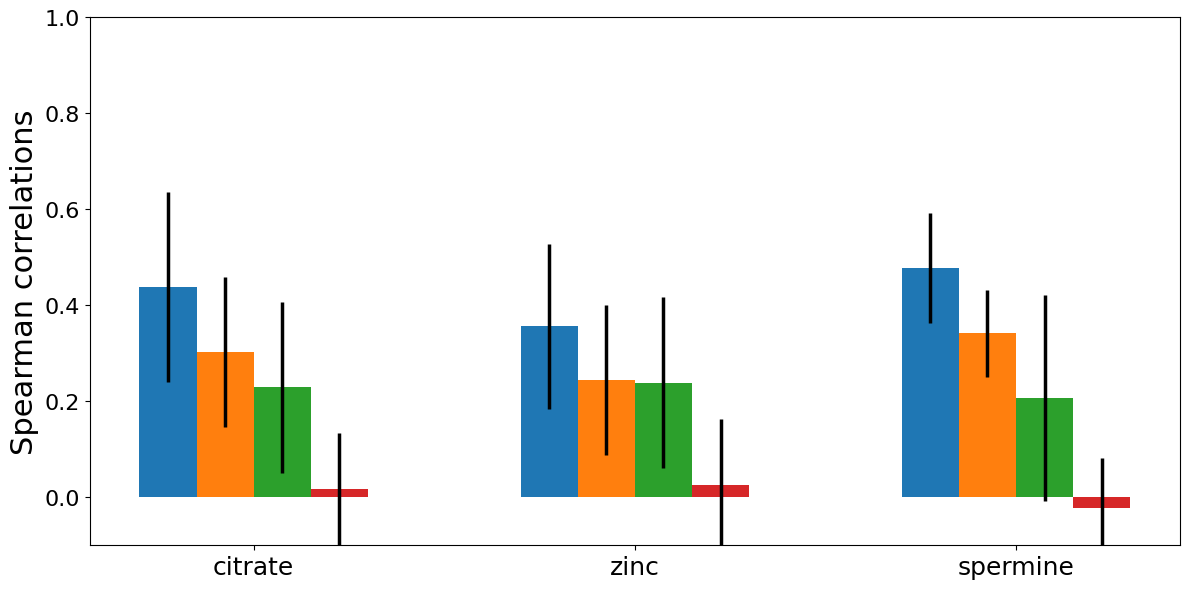

In [118]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(12,6))
# states = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
# states_text = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
# states = ('Citrate', 'Zinc', 'Spermine')
# states_text = ('Citrate', 'Zinc', 'Spermine')
states = ['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist', 'ArtIntWithoutMatchHist']
states_text = states
# data = {
#     'Relapse-free': (0.562, 0.4753, 0.514),
#     'Relapse': (0.335, 0.220, 0.386),
#     # '3': (189.95, 195.82, 217.19),
# }
d_dict = {
    'citrate': [],
    'zinc': [],
    'spermine': []
}
for exp_type in states:
    metabolite = 'citrate'
    citrate_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    metabolite = 'zinc'
    zinc_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    metabolite = 'spermine'
    spermine_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    # d_dict[exp_type] = (citrate_vals, zinc_vals, spermine_vals)
    d_dict['citrate'].append(citrate_vals)
    d_dict['zinc'].append(zinc_vals)
    d_dict['spermine'].append(spermine_vals)
d_dict = transpose_dict(d_dict,states)

derr_dict = {
    'citrate': [],
    'zinc': [],
    'spermine': []
}
for exp_type in states:
    metabolite = 'citrate'
    citrate_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].std()
    metabolite = 'zinc'
    zinc_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].std()
    metabolite = 'spermine'
    spermine_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].std()
    # d_dict[exp_type] = (citrate_vals, zinc_vals, spermine_vals)
    derr_dict['citrate'].append(citrate_vals)
    derr_dict['zinc'].append(zinc_vals)
    derr_dict['spermine'].append(spermine_vals)
derr_dict = transpose_dict(derr_dict,states)
states = ['citrate', 'zinc', 'spermine']
states_text = states
# data = {
#     'Relapse-free': ((0.562, 0.4753, 0.514), np.array((0.040, 0.065, 0.097))),
#     'Relapse': ((0.335, 0.220, 0.386), np.array((0.160, 0.244, 0.134))),
#     # '3': (189.95, 195.82, 217.19),
# }

x = np.arange(len(states))  # the label locations
# width = 0.35  # the width of the bars
width = 0.15  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in d_dict.items():
    err_measurement = derr_dict[attribute]
    print(attribute, measurement)
    offset = width * multiplier
    # rects = axs.bar(x + offset, measurement[0], width, label=attribute, yerr=measurement[1], error_kw={'lw': 2.5} )
    rects = axs.bar(x + offset, tuple(measurement), width, label=attribute, yerr=err_measurement, error_kw={'lw': 2.5})
    # axs.bar_label(rects, padding=3, fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('Spearman correlations', fontsize=22)
# ax.set_xlabel('
# ax.set_title('Penguin attributes by species')
# axs.set_xticks(x + width-0.17, states_text, fontsize=18)
axs.set_xticks(x + width+0.075, states_text, fontsize=18)
# axs.legend(loc='upper right', ncols=1, fontsize=18)
axs.set_ylim(-0.1, 1)
axs.set_yticks(axs.get_yticks()[1:], ['{:.1f}'.format(x) for x in axs.get_yticks()[1:]], fontsize=16)

# plt.show()
fig.tight_layout()
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/comparison_int_datasets_corr.png')
# plt.savefig('../../images/citsper_citrate_analysis/comparison_int_datasets_corr.png')

IntMatchHist [6, 6, 7]
IntWithoutMatchHist [6, 6, 7]
ArtIntMatchHist [4, 3, 4]
ArtIntWithoutMatchHist [1, 2, 0]


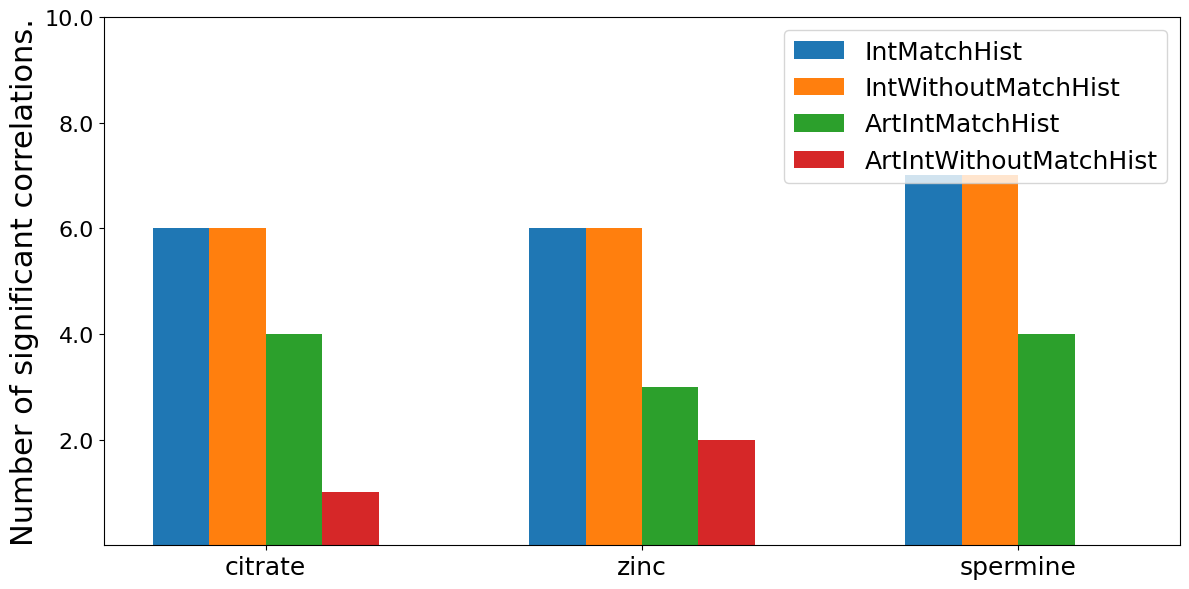

In [119]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(12,6))
# states = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
# states_text = ("NormIntMatchHist", "NormIntWithoutMatchHist", "ArtIntMatchHist", "ArtIntWithoutMatchHist")
# states = ('Citrate', 'Zinc', 'Spermine')
# states_text = ('Citrate', 'Zinc', 'Spermine')
states = ['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist', 'ArtIntWithoutMatchHist']
states_text = states
# data = {
#     'Relapse-free': (0.562, 0.4753, 0.514),
#     'Relapse': (0.335, 0.220, 0.386),
#     # '3': (189.95, 195.82, 217.19),
# }
d_dict = {
    'citrate': [],
    'zinc': [],
    'spermine': []
}
for exp_type in states:
    metabolite = 'citrate'
    sub_df = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)].pvalue
    citrate_vals = (sub_df < 0.0001).sum()
    # citrate_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    metabolite = 'zinc'
    sub_df = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)].pvalue
    zinc_vals = (sub_df < 0.0001).sum()
    # zinc_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    metabolite = 'spermine'
    sub_df = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)].pvalue
    spermine_vals = (sub_df < 0.0001).sum()
    # spermine_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
    # d_dict[exp_type] = (citrate_vals, zinc_vals, spermine_vals)
    d_dict['citrate'].append(citrate_vals)
    d_dict['zinc'].append(zinc_vals)
    d_dict['spermine'].append(spermine_vals)
d_dict = transpose_dict(d_dict,states)

states = ['citrate', 'zinc', 'spermine']
states_text = states
# data = {
#     'Relapse-free': ((0.562, 0.4753, 0.514), np.array((0.040, 0.065, 0.097))),
#     'Relapse': ((0.335, 0.220, 0.386), np.array((0.160, 0.244, 0.134))),
#     # '3': (189.95, 195.82, 217.19),
# }

x = np.arange(len(states))  # the label locations
# width = 0.35  # the width of the bars
width = 0.15  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in d_dict.items():
    print(attribute, measurement)
    offset = width * multiplier
    # rects = axs.bar(x + offset, measurement[0], width, label=attribute, yerr=measurement[1], error_kw={'lw': 2.5} )
    rects = axs.bar(x + offset, tuple(measurement), width, label=attribute, )
    # axs.bar_label(rects, padding=3, fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('Number of significant correlations.', fontsize=22)
# ax.set_xlabel('
# ax.set_title('Penguin attributes by species')
# axs.set_xticks(x + width-0.17, states_text, fontsize=18)
axs.set_xticks(x + width+0.075, states_text, fontsize=18)
axs.legend(loc='upper right', ncols=1, fontsize=18)
axs.set_ylim(0, 10)
axs.set_yticks(axs.get_yticks()[1:], ['{:.1f}'.format(x) for x in axs.get_yticks()[1:]], fontsize=16)

# plt.show()
fig.tight_layout()
# plt.savefig('../../images/citsper_citrate_analysis/comparison_int_datasets_n_sigs.png')
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/comparison_int_datasets_n_sigs.png')


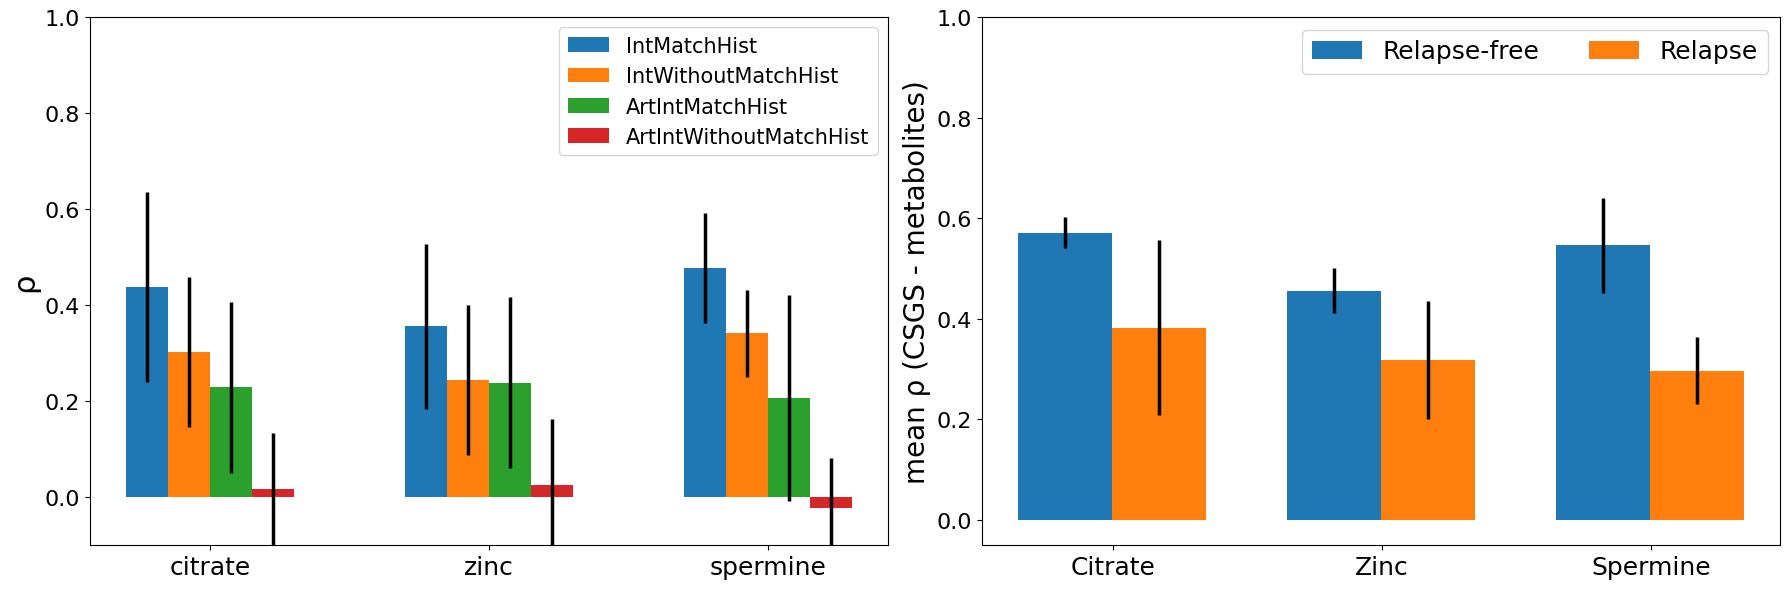

In [120]:
def plot_average_rho_analysis3(ax):
    states = ['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist', 'ArtIntWithoutMatchHist']
    states_text = states
    d_dict = {
        'citrate': [],
        'zinc': [],
        'spermine': []
    }
    for exp_type in states:
        metabolite = 'citrate'
        citrate_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
        metabolite = 'zinc'
        zinc_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
        metabolite = 'spermine'
        spermine_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].mean()
        # d_dict[exp_type] = (citrate_vals, zinc_vals, spermine_vals)
        d_dict['citrate'].append(citrate_vals)
        d_dict['zinc'].append(zinc_vals)
        d_dict['spermine'].append(spermine_vals)
    d_dict = transpose_dict(d_dict,states)

    derr_dict = {
        'citrate': [],
        'zinc': [],
        'spermine': []
    }
    for exp_type in states:
        metabolite = 'citrate'
        citrate_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].std()
        metabolite = 'zinc'
        zinc_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].std()
        metabolite = 'spermine'
        spermine_vals = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)]['Spearman correlation'].std()
        # d_dict[exp_type] = (citrate_vals, zinc_vals, spermine_vals)
        derr_dict['citrate'].append(citrate_vals)
        derr_dict['zinc'].append(zinc_vals)
        derr_dict['spermine'].append(spermine_vals)
    derr_dict = transpose_dict(derr_dict,states)
    states = ['citrate', 'zinc', 'spermine']
    states_text = states

    x = np.arange(len(states))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0
    for attribute, measurement in d_dict.items():
        err_measurement = derr_dict[attribute]
        offset = width * multiplier
        rects = ax.bar(x + offset, tuple(measurement), width, label=attribute, yerr=err_measurement, error_kw={'lw': 2.5})
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('ρ', fontsize=22)
    ax.set_xticks(x + width+0.075, states_text, fontsize=18)
    ax.set_ylim(-0.1, 1)
    ax.set_yticks(ax.get_yticks()[1:], ['{:.1f}'.format(x) for x in ax.get_yticks()[1:]], fontsize=16)
    ax.legend(loc='upper right', ncols=1, fontsize=15)
    return ax

    # # plt.show()
    # fig.tight_layout()
    # plt.savefig('images/citsper_citrate_analysis/comparison_int_datasets_corr.png')
    
def plot_n_sigs_analysis3(ax):
    states = ['IntMatchHist', 'IntWithoutMatchHist', 'ArtIntMatchHist', 'ArtIntWithoutMatchHist']
    states_text = states
    d_dict = {
        'citrate': [],
        'zinc': [],
        'spermine': []
    }
    for exp_type in states:
        metabolite = 'citrate'
        sub_df = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)].pvalue
        citrate_vals = (sub_df < 0.0001).sum()
        metabolite = 'zinc'
        sub_df = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)].pvalue
        zinc_vals = (sub_df < 0.0001).sum()
        metabolite = 'spermine'
        sub_df = all_stats[(all_stats['Experiment type'] == exp_type) & (all_stats.metabolite == metabolite)].pvalue
        spermine_vals = (sub_df < 0.0001).sum()
        d_dict['citrate'].append(citrate_vals)
        d_dict['zinc'].append(zinc_vals)
        d_dict['spermine'].append(spermine_vals)
    d_dict = transpose_dict(d_dict,states)

    states = ['citrate', 'zinc', 'spermine']
    states_text = states
    x = np.arange(len(states))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    for attribute, measurement in d_dict.items():
        print(attribute, measurement)
        offset = width * multiplier
        rects = ax.bar(x + offset, tuple(measurement), width, label=attribute, )
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of significant ρ\'s', fontsize=22)
    ax.set_xticks(x + width+0.075, states_text, fontsize=18)
    ax.legend(loc='upper right', ncols=1, fontsize=15)
    ax.set_ylim(0, 10)
    ax.set_yticks(ax.get_yticks()[1:], ['{:.1f}'.format(x) for x in ax.get_yticks()[1:]], fontsize=16)
    

def plot_spot_dist_analysis3(axs):
    # states = ("Before Integration", "After Integration", "After artificial integration")
    # states_text = ('Before integration', 'After normal integration', 'After artificial integration')
    states = ("Without tissue\ntype matching", "Tissue type matching\nafter integration", "Tissue type matching\nafter artificial integration")
    states_text = states
    # states_text = ('Before integration', 'After normal integration', 'After artificial integration')
    data = {
        'Stroma': (2126, 1358, 948),
        'Glands': (1722, 1179, 810),
        # '3': (189.95, 195.82, 217.19),
    }

    x = np.arange(len(states))  # the label locations
    width = 0.35  # the width of the bars
    multiplier = 0

    # fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = axs.bar(x + offset, measurement, width, label=attribute)
        axs.bar_label(rects, padding=3, fontsize=16)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs.set_ylabel('Number of spots', fontsize=22)
    axs.set_yticks(axs.get_yticks(), [str(int(x)) for x in axs.get_yticks()], fontsize=16)
    # ax.set_xlabel('
    # ax.set_title('Penguin attributes by species')
    axs.set_xticks(x + width-0.17, states_text, fontsize=14)
    axs.legend(loc='upper right', ncols=3, fontsize=18)
    axs.set_ylim(0, 2500)
    
def plot_rel_rel_free_analysis4(axs):
    states = ('Citrate', 'Zinc', 'Spermine')
    states_text = ('Citrate', 'Zinc', 'Spermine')
    # data = {
    #     'Relapse-free': ((0.562, 0.4753, 0.514), np.array((0.040, 0.065, 0.097))),
    #     'Relapse': ((0.335, 0.220, 0.386), np.array((0.160, 0.244, 0.134))),
    # }
    data = {
        'Relapse-free': ((0.571, 0.4563, 0.5459), np.array((0.031, 0.044, 0.0936))),
        'Relapse': ((0.382, 0.318, 0.297), np.array((0.174, 0.117, 0.066))),
    }

    x = np.arange(len(states))  # the label locations
    width = 0.35  # the width of the bars
    multiplier = 0
    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = axs.bar(x + offset, measurement[0], width, label=attribute, yerr=measurement[1], error_kw={'lw': 2.5} )
        multiplier += 1

    axs.set_ylabel('mean ρ (CSGS - metabolites)', fontsize=20)
    axs.set_xticks(x + width-0.17, states_text, fontsize=18)
    axs.legend(loc='upper right', ncols=3, fontsize=18)
    axs.set_ylim(-0.05, 1)
    axs.set_yticks(axs.get_yticks()[1:], ['{:.1f}'.format(x) for x in axs.get_yticks()[1:]], fontsize=16)

# Print 4 subplots together
# fig, axs = plt.subplots(2, 2, figsize=(24, 14))
# plot_average_rho_analysis3(axs[0,0])
# plot_n_sigs_analysis3(axs[0,1])
# plot_spot_dist_analysis3(axs[1,0])
# plot_rel_rel_free_analysis4(axs[1,1])
# fig.tight_layout()
# fig.savefig('images/citsper_citrate_analysis/panel_2_lower_half.png', transparent=True)

# fig, axs = plt.subplots(1, 3, figsize=(24, 6))
# plot_average_rho_analysis3(axs[0])
# # plot_n_sigs_analysis3(axs[0,1])
# plot_spot_dist_analysis3(axs[1])
# plot_rel_rel_free_analysis4(axs[2])
# fig.tight_layout()
# fig.savefig('images/citsper_citrate_analysis/panel_2_lower_half.png', transparent=True)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
plot_average_rho_analysis3(axs[0])
# plot_n_sigs_analysis3(axs[0,1])
# plot_spot_dist_analysis3(axs[1])
plot_rel_rel_free_analysis4(axs[1])
fig.tight_layout()
# fig.savefig('../../images/citsper_citrate_analysis/panel_2_lower_half.png', transparent=True)
fig.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/panel_2_lower_half.png', transparent=True)

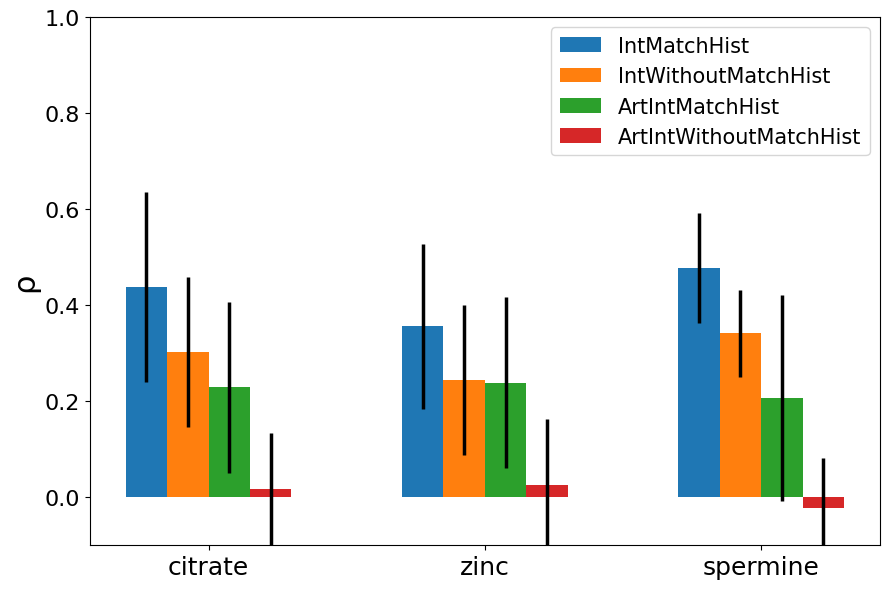

In [121]:
fig, axs = plt.subplots(1, 1, figsize=(9, 6))
plot_average_rho_analysis3(axs)
# plot_n_sigs_analysis3(axs[0,1])
# plot_spot_dist_analysis3(axs[1])
# plot_rel_rel_free_analysis4(axs)
fig.tight_layout()
fig.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/panel_2_average_rhos.png', transparent=True)
# fig.savefig('../../images/citsper_citrate_analysis/panel_2_average_rhos.png', transparent=True)

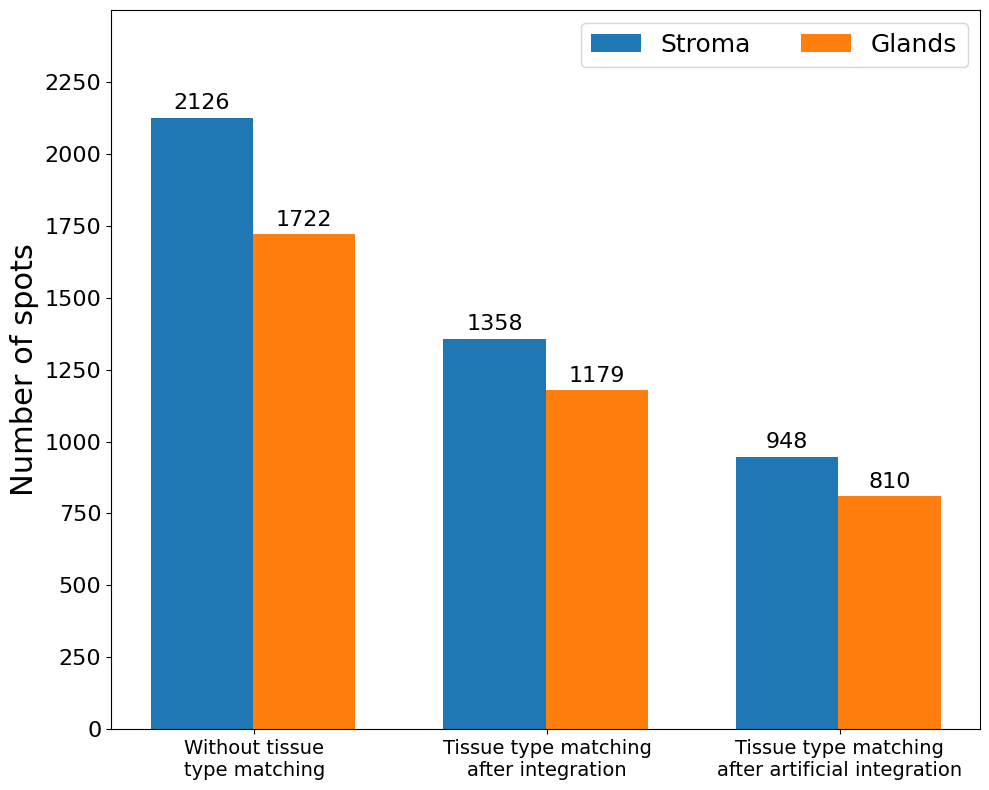

In [122]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
plot_spot_dist_analysis3(axs)
fig.tight_layout()
# plt.savefig('images/citsper_citrate_analysis/number_spots_left.png')
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/number_spots_left.png', transparent=True)


In [123]:
['{:.1f}'.format(x) for x in axs.get_yticks()]

['0.0',
 '250.0',
 '500.0',
 '750.0',
 '1000.0',
 '1250.0',
 '1500.0',
 '1750.0',
 '2000.0',
 '2250.0']

In [124]:
from collections import Counter

Counter(merged_pos_wrong_df_red2['Histology Class'])

Counter({'Stroma': 1005, 'Gland': 832})

In [68]:
core_ids_to_paper_ids = {
    '001_04': 'P06_7',
    '002_01': 'P04_3',
    '003_02': 'P08_3',
    '004_03': 'P07_7',
    '045_03': 'P28_3',
    '047_04': 'P30_4',
    '048_02': 'P22_4'
}

plot_order =['P06_7', 'P04_3', 'P08_3', 'P07_7', 'P28_3', 'P30_4', 'P22_4']
merged_neg_correct_df_red2['paper_id'] = merged_neg_correct_df_red2.core_name.apply(lambda x: core_ids_to_paper_ids[x])
merged_pos_correct_df_red2['paper_id'] = merged_pos_correct_df_red2.core_name.apply(lambda x: core_ids_to_paper_ids[x])
merged_neg_correct_df_red['paper_id'] = merged_neg_correct_df_red.core_name.apply(lambda x: core_ids_to_paper_ids[x])
merged_pos_correct_df_red['paper_id'] = merged_pos_correct_df_red.core_name.apply(lambda x: core_ids_to_paper_ids[x])

/mnt/scratch/tmp/ipykernel_24015/898662266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_neg_correct_df_red2['paper_id'] = merged_neg_correct_df_red2.core_name.apply(lambda x: core_ids_to_paper_ids[x])
/mnt/scratch/tmp/ipykernel_24015/898662266.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pos_correct_df_red2['paper_id'] = merged_pos_correct_df_red2.core_name.apply(lambda x: core_ids_to_paper_ids[x])


In [128]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [150]:
import statannot
# statannot.add_stat_annotation(
#     ax,
#     data=df,
#     x=x,
#     y=y,
#     hue=hue,
#     box_pairs=[
#         (("Biscoe", "Male"), ("Torgersen", "Female")),
#         (("Dream", "Male"), ("Dream", "Female")),
#     ],
#     test="t-test_ind",
#     text_format="star",
#     loc="outside",
# )

In [152]:
from statannotations.Annotator import Annotator

In [136]:
order = ['P06_7', 'P04_3', 'P28_3', 'P08_3', 'P07_7', 'P30_4', 'P22_4']

box_pairs

[(('P06_7', 'Stroma'), ('P06_7', 'Gland')),
 (('P04_3', 'Stroma'), ('P04_3', 'Gland')),
 (('P28_3', 'Stroma'), ('P28_3', 'Gland')),
 (('P08_3', 'Stroma'), ('P08_3', 'Gland')),
 (('P07_7', 'Stroma'), ('P07_7', 'Gland')),
 (('P30_4', 'Stroma'), ('P30_4', 'Gland')),
 (('P22_4', 'Stroma'), ('P22_4', 'Gland'))]

In [156]:
# fig, ax = plt.subplots(1,1, figsize=(8,8))
# order = ['P06_7', 'P04_3', 'P28_3', 'P08_3', 'P07_7', 'P30_4', 'P22_4']
# box_pairs = [((x, 'Stroma'), (x, 'Gland')) for x in order]



# ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='Citsper', hue='unified_hp_class', hue_order=['Stroma', 'Gland'], order=order)

# annotator = Annotator(ax, box_pairs, data=merged_neg_correct_df_red, x='paper_id', y='Citsper', 
#                       order=order, hue='unified_hp_class', hue_order=['Stroma', 'Gland'])


# # annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
# # annot.configure(test='Mann-Whitney', verbose=2)
# # annot.apply_test()
# # annot.annotate()

# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# # statannot.add_stat_annotation(ax, data=merged_neg_correct_df_red, x='paper_id', y='Citsper', hue='unified_hp_class', 
# #                             box_pairs=box_pairs, test='t-test_ind', text_format='star', loc='outside')

In [ ]:
sns.categorical._Box

/mnt/scratch/tmp/ipykernel_24015/1631432856.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/1631432856.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/1631432856.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015/1631432856.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_24015

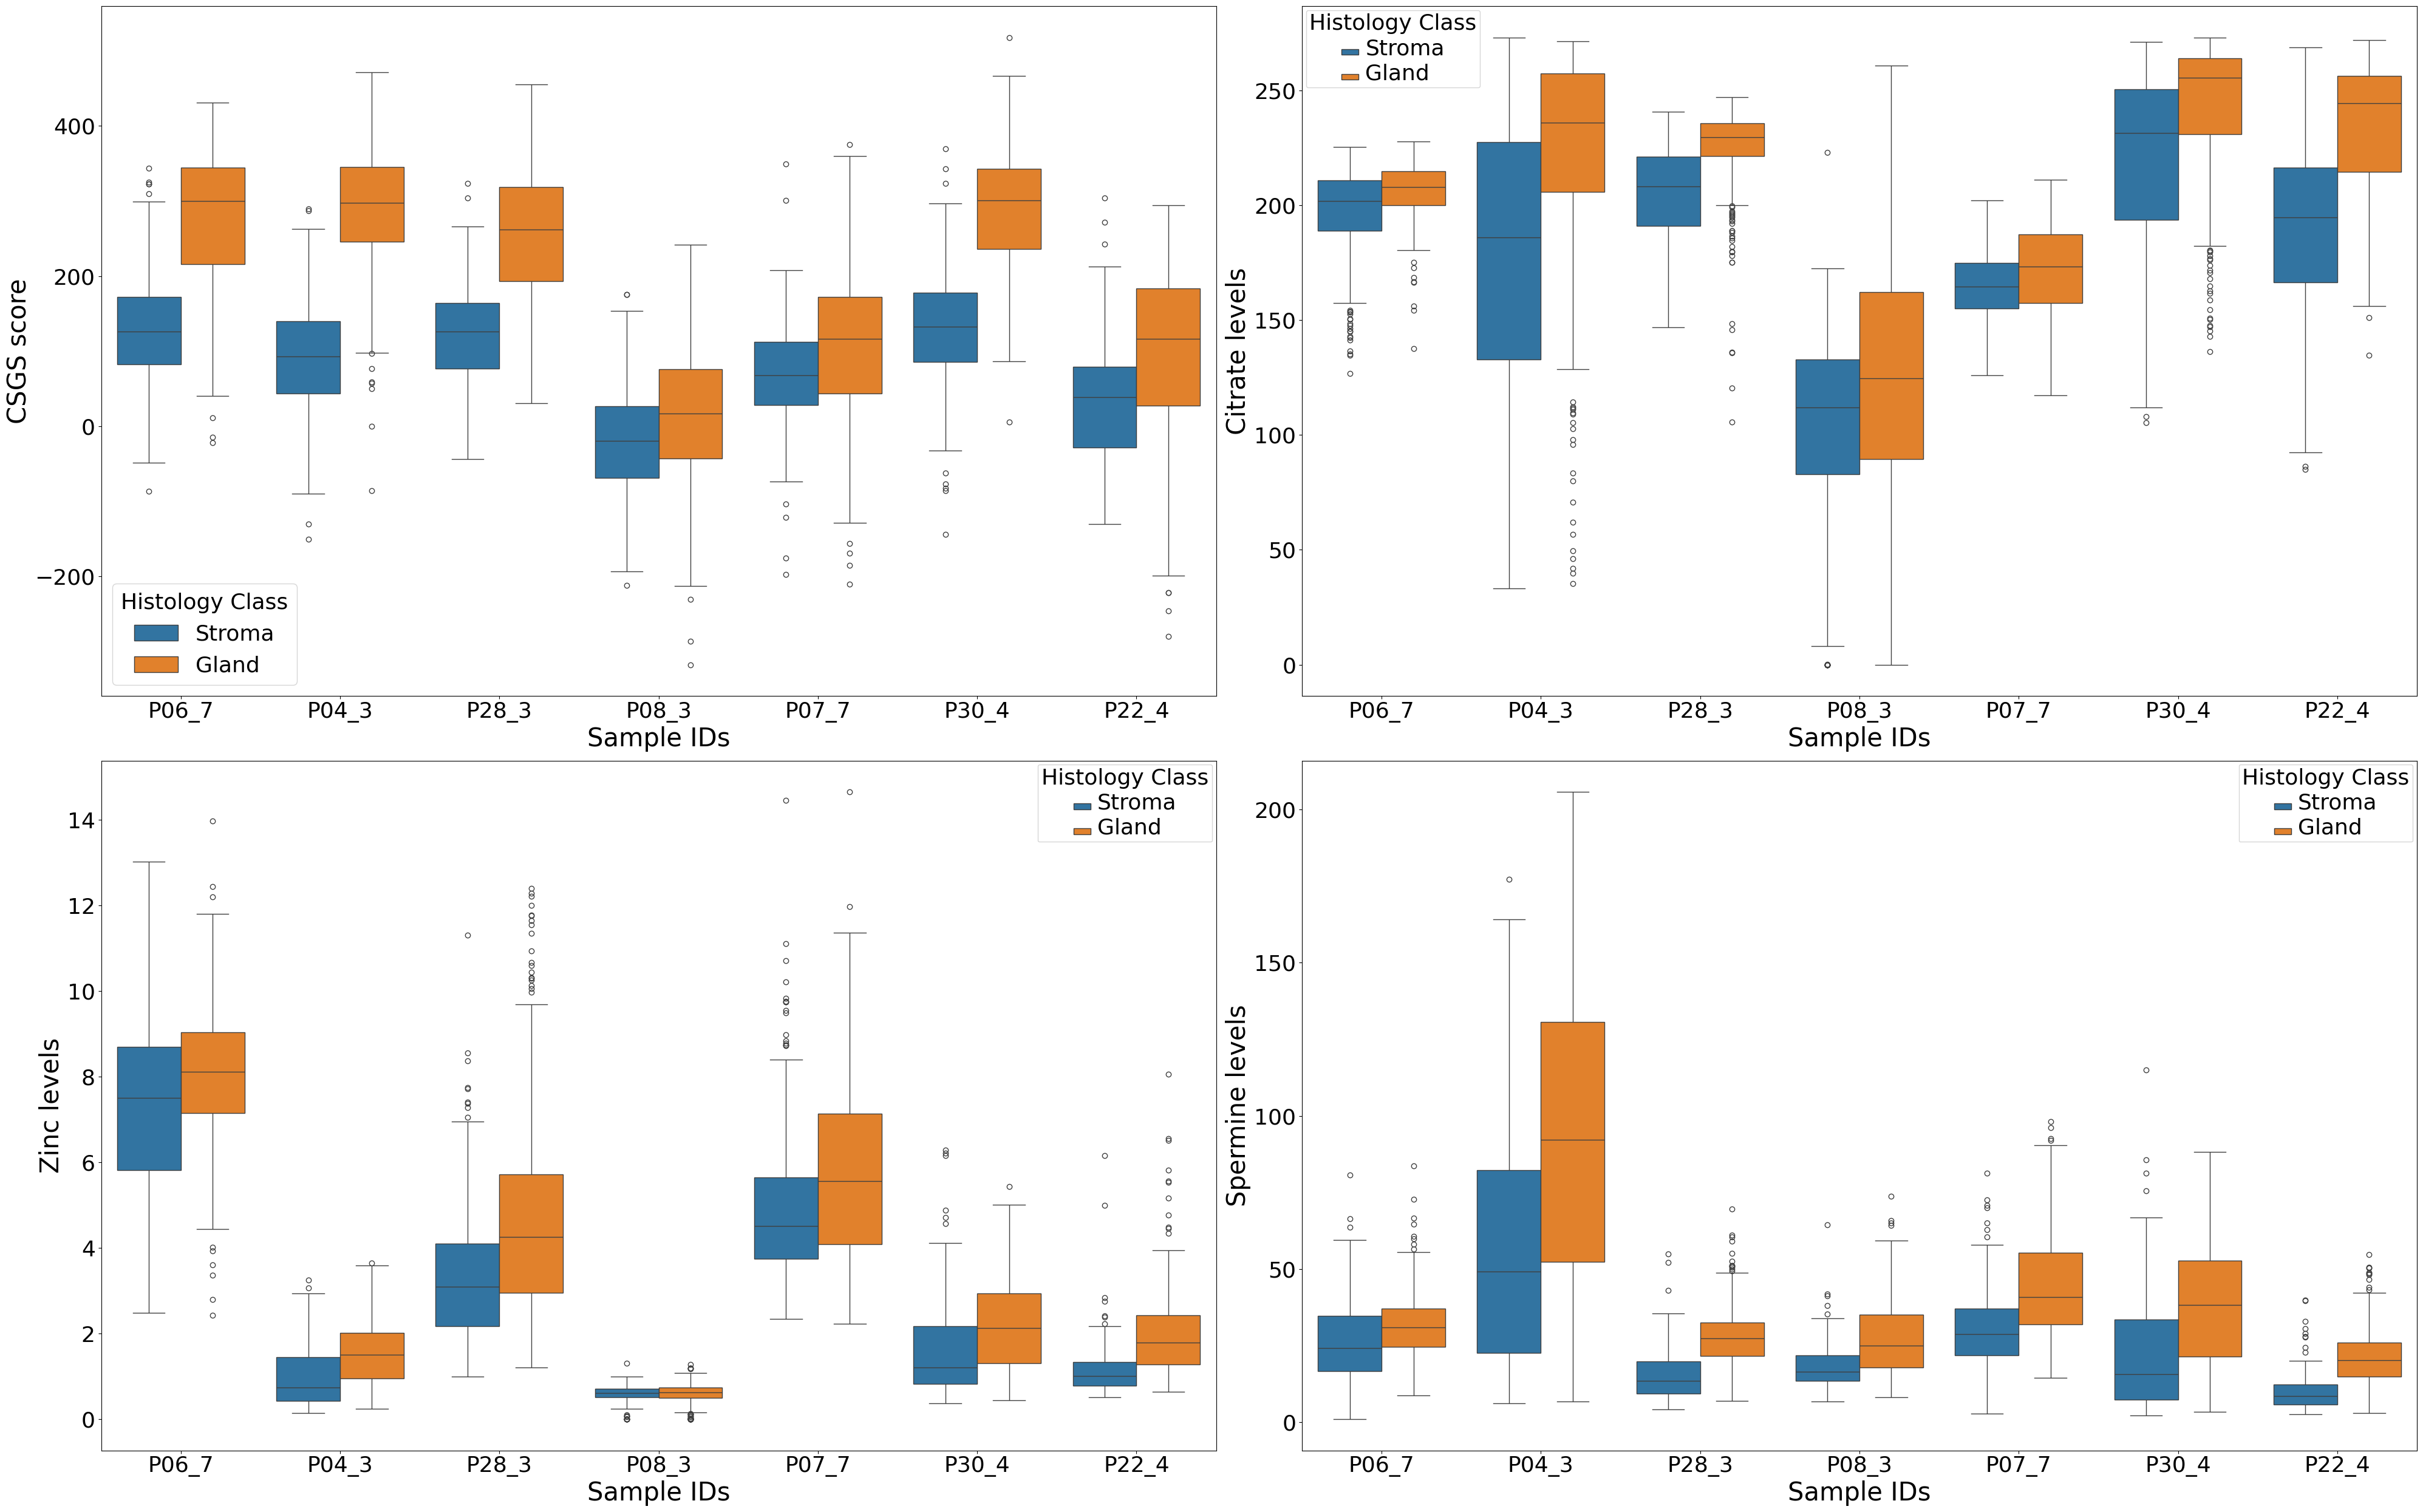

In [69]:
order = ['P06_7', 'P04_3', 'P28_3', 'P08_3', 'P07_7', 'P30_4', 'P22_4']
fontsize=30
tick_fontsize=26
legend_fontsize=26
fig, axs = plt.subplots(2, 2, figsize=(40, 25))
ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='Citsper', hue='unified_hp_class', hue_order=['Stroma', 'Gland'], order=order, ax=axs[0,0])
# ax.legend([],[], frameon=False)
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('CSGS score', fontsize=fontsize)
# ax.set_title('Sample-wise CSGS score', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title
ax.legend(title='Histology Class', loc='lower left', fontsize=legend_fontsize, title_fontsize=legend_fontsize )
# legend = ax.legend()
# legend.set_title('Histology Class', prop={'size': legend_fontsize})

ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='Citrate', hue='Histology Class',hue_order=['Stroma', 'Gland'], order=order,  ax=axs[0,1])
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('Citrate levels', fontsize=fontsize)
# ax.set_title('Sample-wise Citrate levels', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title

ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='Zinc', hue='Histology Class',hue_order=['Stroma', 'Gland'], order=order,  ax=axs[1,0])
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('Zinc levels', fontsize=fontsize)
# ax.set_title('Sample-wise Zinc levels', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title

ax = sns.boxplot(merged_pos_correct_df_red, x='paper_id', y='Spermine', hue='Histology Class',hue_order=['Stroma', 'Gland'], order=order,  ax=axs[1,1])
ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('Spermine levels', fontsize=fontsize)
# ax.set_title('Sample-wise Spermine levels', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title

fig.tight_layout()
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/cczs_levels_boxplot_dif_layout.png', transparent=True)
# plt.savefig('../../images/citsper_citrate_analysis/cczs_levels_boxplot_dif_layout.png', transparent=True)

/mnt/scratch/tmp/ipykernel_14160/2496589976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(merged_neg_correct_df_red, x='unified_hp_class', y='Citsper', order=['Stroma', 'Gland'], ax=axs[0], palette=cmap)
/mnt/scratch/tmp/ipykernel_14160/2496589976.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2496589976.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2496589976.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

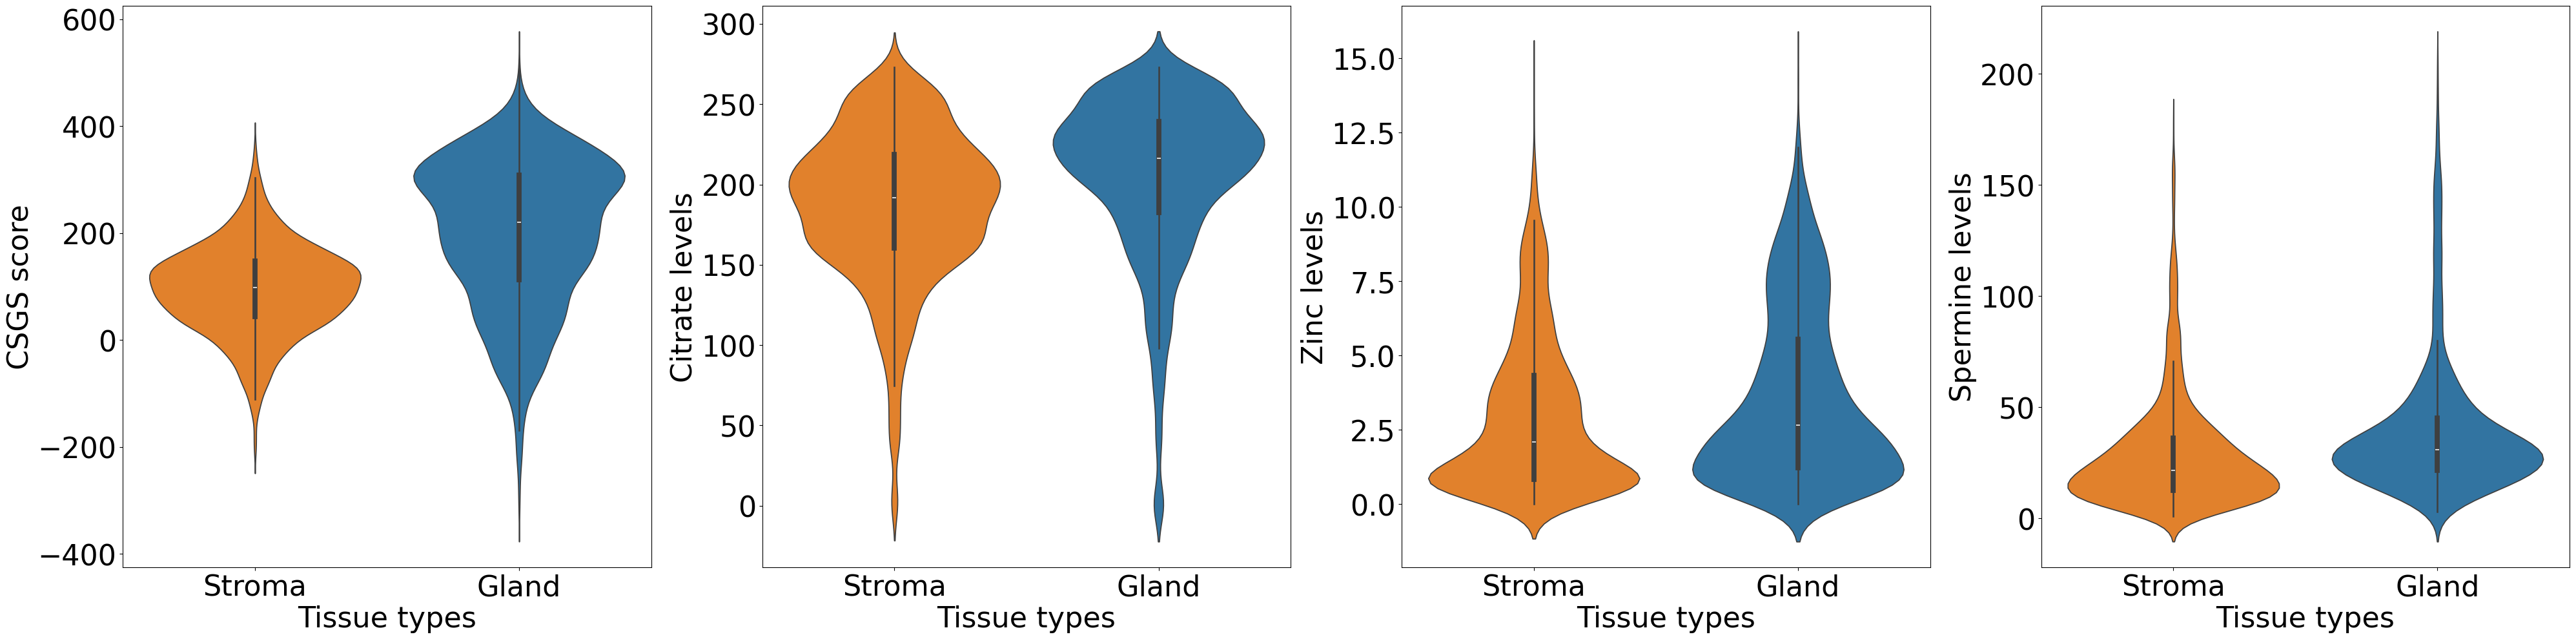

In [143]:
cmap = {'Stroma': 'tab:orange', 'Gland': 'tab:blue'}
order = ['P06_7', 'P04_3', 'P28_3', 'P08_3', 'P07_7', 'P30_4', 'P22_4']
fontsize=32
tick_fontsize=32
legend_fontsize=32
fig, axs = plt.subplots(1, 4, figsize=(40, 10))
# ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='Citsper', hue='unified_hp_class', hue_order=['Stroma', 'Gland'], order=order, ax=axs[0,0])
# ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='Citsper', hue='unified_hp_class', hue_order=['Stroma', 'Gland'], order=order, ax=axs[0,0])
ax = sns.violinplot(merged_neg_correct_df_red, x='unified_hp_class', y='Citsper', order=['Stroma', 'Gland'], ax=axs[0], palette=cmap)
# ax.legend([],[], frameon=False)
# ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('CSGS score', fontsize=fontsize)
ax.set_xlabel('Tissue types', fontsize=fontsize)
# ax.set_title('Sample-wise CSGS score', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
# plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title
# ax.legend(title='Histology Class', loc='lower left', fontsize=legend_fontsize, title_fontsize=legend_fontsize )
# legend = ax.legend()
# legend.set_title('Histology Class', prop={'size': legend_fontsize})

# ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='met_Citrate', hue='Histology Class',hue_order=['Stroma', 'Gland'], order=order,  ax=axs[0,1])
ax = sns.violinplot(merged_neg_correct_df_red, x='unified_hp_class', y='Citrate', order=['Stroma', 'Gland'], ax=axs[1], palette=cmap)
# ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('Citrate levels', fontsize=fontsize)
ax.set_xlabel('Tissue types', fontsize=fontsize)
# ax.set_title('Sample-wise Citrate levels', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
# plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title

# ax = sns.boxplot(merged_neg_correct_df_red, x='paper_id', y='met_Zinc', hue='Histology Class',hue_order=['Stroma', 'Gland'], order=order,  ax=axs[1,0])
ax = sns.violinplot(merged_neg_correct_df_red, x='unified_hp_class', y='Zinc', order=['Stroma', 'Gland'], ax=axs[2], palette=cmap)
# ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('Zinc levels', fontsize=fontsize)
ax.set_xlabel('Tissue types', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
# plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title

# ax = sns.boxplot(merged_pos_correct_df_red, x='paper_id', y='met_Spermine', hue='Histology Class',hue_order=['Stroma', 'Gland'], order=order,  ax=axs[1,1])
ax = sns.violinplot(merged_pos_correct_df_red, x='unified_hp_class', y='Spermine', order=['Stroma', 'Gland'], ax=axs[3], palette=cmap)
# ax.set_xlabel('Sample IDs', fontsize=fontsize)
ax.set_ylabel('Spermine levels', fontsize=fontsize)
ax.set_xlabel('Tissue types', fontsize=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), size=tick_fontsize)
ax.set_yticklabels(ax.get_yticklabels(), size=tick_fontsize)
# plt.setp(ax.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize=legend_fontsize) # for legend title

fig.tight_layout()
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/cczs_all_samples.png', transparent=True)
# plt.savefig('../../images/citsper_citrate_analysis/cczs_all_samples.png', transparent=True)

In [74]:
from scipy.stats import mannwhitneyu

def compute_log_fold_change(d1, d2, pseudo_count=0):
    return np.log2(d1 + pseudo_count) - np.log2(d2 + pseudo_count)

In [75]:
merged_neg_correct_df_red.shape, merged_neg_correct_df_red2.shape

((3834, 53), (2538, 53))

In [76]:
(merged_neg_correct_df_red.unified_hp_class == 'Gland').sum(), (merged_neg_correct_df_red.unified_hp_class == 'Stroma').sum()

(2109, 1725)

In [77]:
# Do log fold change only for citrate, zinc and spermine

paper_id_to_citrate_fold_change = {}
paper_id_to_zinc_fold_change = {}
paper_id_to_spermine_fold_change = {}
paper_id_to_citrate_stats = {}
paper_id_to_zinc_stats = {}
paper_id_to_spermine_stats = {}
paper_id_to_fold_change = {}
for paper_id in merged_neg_correct_df_red.paper_id.unique():

    sample_df = merged_neg_correct_df_red[merged_neg_correct_df_red.paper_id == paper_id]
    group1 = sample_df[sample_df.unified_hp_class == 'Stroma'].Citsper
    group2 = sample_df[sample_df.unified_hp_class == 'Gland'].Citsper
    # lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    # paper_id_to_citrate_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('csgs', paper_id)]  = [np.NAN, m_stats.statistic, m_stats.pvalue]

    sample_df = merged_neg_correct_df_red[merged_neg_correct_df_red.paper_id == paper_id]
    group1 = sample_df[sample_df.msi_hist == 'Stroma'].Citrate
    group2 = sample_df[sample_df.msi_hist == 'Gland'].Citrate
    lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    paper_id_to_citrate_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('citrate', paper_id)]  = [lfc, m_stats.statistic, m_stats.pvalue]

    group1 = sample_df[sample_df.msi_hist == 'Stroma'].Zinc
    group2 = sample_df[sample_df.msi_hist == 'Gland'].Zinc
    lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    paper_id_to_zinc_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('zinc', paper_id)]  = [lfc, m_stats.statistic, m_stats.pvalue]

    sample_df = merged_pos_correct_df_red[merged_pos_correct_df_red.paper_id == paper_id]
    group1 = sample_df[sample_df.msi_hist == 'Stroma'].Spermine
    group2 = sample_df[sample_df.msi_hist == 'Gland'].Spermine
    lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    paper_id_to_spermine_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('spermine', paper_id)]  = [lfc, m_stats.statistic, m_stats.pvalue]
    

In [78]:
paper_id_to_citrate_fold_change = {}
paper_id_to_zinc_fold_change = {}
paper_id_to_spermine_fold_change = {}
paper_id_to_citrate_stats = {}
paper_id_to_zinc_stats = {}
paper_id_to_spermine_stats = {}
paper_id_to_fold_change = {}
for paper_id in merged_neg_correct_df_red.paper_id.unique():

    sample_df = merged_neg_correct_df_red[merged_neg_correct_df_red.paper_id == paper_id]
    group1 = sample_df[sample_df.unified_hp_class == 'Stroma'].Citsper
    group2 = sample_df[sample_df.unified_hp_class == 'Gland'].Citsper
    # lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    # paper_id_to_citrate_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('csgs', paper_id)]  = [np.NAN, m_stats.statistic, m_stats.pvalue]

    sample_df = merged_neg_correct_df_red[merged_neg_correct_df_red.paper_id == paper_id]
    group1 = sample_df[sample_df.msi_hist == 'Stroma'].Citrate
    group2 = sample_df[sample_df.msi_hist == 'Gland'].Citrate
    lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    paper_id_to_citrate_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('citrate', paper_id)]  = [lfc, m_stats.statistic, m_stats.pvalue]

    group1 = sample_df[sample_df.msi_hist == 'Stroma'].Zinc
    group2 = sample_df[sample_df.msi_hist == 'Gland'].Zinc
    lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    paper_id_to_zinc_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('zinc', paper_id)]  = [lfc, m_stats.statistic, m_stats.pvalue]

    sample_df = merged_pos_correct_df_red[merged_pos_correct_df_red.paper_id == paper_id]
    group1 = sample_df[sample_df.msi_hist == 'Stroma'].Spermine
    group2 = sample_df[sample_df.msi_hist == 'Gland'].Spermine
    lfc = compute_log_fold_change(group1.mean(), group2.mean())
    m_stats = mannwhitneyu(group1, group2)
    paper_id_to_spermine_fold_change[paper_id] = [lfc, m_stats.statistic, m_stats.pvalue]
    paper_id_to_fold_change[('spermine', paper_id)]  = [lfc, m_stats.statistic, m_stats.pvalue]
    

In [88]:
paper_id = 'P08_3'
sample_df = merged_neg_correct_df_red[merged_neg_correct_df_red.paper_id == paper_id]
sample_df

unified_hp_class adjusted_core_type  Citsper  \
V19S23_107_B_TTATATTTGGCAATCC-1           Stroma                  n  -17.351   
V19S23_107_B_TTATTAGAGCGTGTTC-1            Gland                  n   90.055   
V19S23_107_B_TTCAATACTCTGAATC-1           Stroma                  n  -25.251   
V19S23_107_B_TTCACGAAAGGATCAC-1            Gland                  n   13.359   
V19S23_107_B_TTCCACACAGATTTGA-1            Gland                  n  -16.735   
...                                          ...                ...      ...   
V19S23_107_B_GGGCGGCAAATGAATT-1            Gland                  n   -2.580   
V19S23_107_B_GGGCGATATGTGTGAA-1           Stroma                  n  -90.560   
V19S23_107_B_GGGCCCGTCTTAAACA-1            Gland                  n  -62.437   
V19S23_107_B_GGGAGTTAATGAGGCG-1            Gland                  n  -54.024   
V19S23_107_B_GGCTATTAAGTTGTAT-1            Gland                  n   38.133   

                                st_identifier             barcode  \
V19S23_107_B_TTATATTTGGCAATCC-1  V19S23_107_B  TTATATTTGGCAATCC-1   
V19S23_107_B_TTATTAGAGCGTGTTC-1  V19S23_107_B  TTATTAGAGCGTGTTC-1   
V19S23_107_B_TTCAATACTCTGAATC-1  V19S23_107_B  TTCAATACTCTGAATC-1   
V19S23_107_B_TTCACGAAAGGATCAC-1  V19S23_107_B  TTCACGAAAGGATCAC-1   
V19S23_107_B_TTCCACACAGATTTGA-1  V19S23_107_B  TTCCACACAGATTTGA-1   
...                                       ...                 ...   
V19S23_107_B_GGGCGGCAAATGAATT-1  V19S23_107_B  GGGCGGCAAATGAATT-1   
V19S23_107_B_GGGCGATATGTGTGAA-1  V19S23_107_B  GGGCGATATGTGTGAA-1   
V19S23_107_B_GGGCCCGTCTTAAACA-1  V19S23_107_B  GGGCCCGTCTTAAACA-1   
V19S23_107_B_GGGAGTTAATGAGGCG-1  V19S23_107_B  GGGAGTTAATGAGGCG-1   
V19S23_107_B_GGCTATTAAGTTGTAT-1  V19S23_107_B  GGCTATTAAGTTGTAT-1   

                                correct_st_identifier core_name  recurrence  \
V19S23_107_B_TTATATTTGGCAATCC-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_TTATTAGAGCGTGTTC-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_TTCAATACTCTGAATC-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_TTCACGAAAGGATCAC-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_TTCCACACAGATTTGA-1          V19S23_107_B    003_02  recurrence   
...                                               ...       ...         ...   
V19S23_107_B_GGGCGGCAAATGAATT-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_GGGCGATATGTGTGAA-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_GGGCCCGTCTTAAACA-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_GGGAGTTAATGAGGCG-1          V19S23_107_B    003_02  recurrence   
V19S23_107_B_GGCTATTAAGTTGTAT-1          V19S23_107_B    003_02  recurrence   

                                   type patient_id  ...  PS 122  PI 123  \
V19S23_107_B_TTATATTTGGCAATCC-1  Normal    PS_A008  ...   2.247   1.371   
V19S23_107_B_TTATTAGAGCGTGTTC-1  Normal    PS_A008  ...   3.604   2.605   
V19S23_107_B_TTCAATACTCTGAATC-1  Normal    PS_A008  ...   1.127   0.627   
V19S23_107_B_TTCACGAAAGGATCAC-1  Normal    PS_A008  ...   6.215   6.530   
V19S23_107_B_TTCCACACAGATTTGA-1  Normal    PS_A008  ...   2.944   2.951   
...                                 ...        ...  ...     ...     ...   
V19S23_107_B_GGGCGGCAAATGAATT-1  Normal    PS_A008  ...   5.720   5.895   
V19S23_107_B_GGGCGATATGTGTGAA-1  Normal    PS_A008  ...   8.483   6.475   
V19S23_107_B_GGGCCCGTCTTAAACA-1  Normal    PS_A008  ...   3.742   4.866   
V19S23_107_B_GGGAGTTAATGAGGCG-1  Normal    PS_A008  ...   1.681   0.806   
V19S23_107_B_GGCTATTAAGTTGTAT-1  Normal    PS_A008  ...   4.152   2.510   

                                 PS 124  PS 125  PI 126  PI 128  PI 129  \
V19S23_107_B_TTATATTTGGCAATCC-1   1.170   0.750   0.873   0.618   0.619   
V19S23_107_B_TTATTAGAGCGTGTTC-1   1.411   0.626   2.207   1.279   1.148   
V19S23_107_B_TTCAATACTCTGAATC-1   0.507   0.319   0.597   0.359   0.311   
V19S23_107_B_TTCACGAAAGGATCAC-1   0.981   1.281   2.427   2.427   2.721   
V19S23_107_B_TTCC

In [90]:
group1 = sample_df[sample_df.msi_hist == 'Stroma'].Zinc
group2 = sample_df[sample_df.msi_hist == 'Gland'].Zinc

group1.mean(), group2.mean()

(0.48168748866811606, 0.6744055880103449)

In [86]:
paper_id_to_zinc_fold_change

{'P04_3': [-1.1188436814822353, 6711.0, 1.315643172614087e-47],
 'P06_7': [-0.2837822117458342, 19581.0, 1.784535242770919e-19],
 'P28_3': [-0.4754287523912417, 38657.0, 2.866632519618587e-17],
 'P07_7': [-0.47880035082553674, 11599.0, 1.5176297450999912e-21],
 'P08_3': [-0.48551903834870247, 7253.0, 3.3015709598478116e-05],
 'P30_4': [-0.9872938965704616, 10303.0, 4.435467803532719e-51],
 'P22_4': [-0.5164707255819969, 7680.0, 8.202209883841472e-15]}

In [79]:
group1 = merged_neg_correct_df_red[merged_neg_correct_df_red.unified_hp_class == 'Stroma'].Citrate
group2 = merged_neg_correct_df_red[merged_neg_correct_df_red.unified_hp_class == 'Gland'].Citrate
m_stats = mannwhitneyu(group1, group2)
m_stats

MannwhitneyuResult(statistic=1319611.0, pvalue=1.4248754384266925e-48)

In [80]:
group1 = merged_neg_correct_df_red[merged_neg_correct_df_red.unified_hp_class == 'Stroma'].Zinc
group2 = merged_neg_correct_df_red[merged_neg_correct_df_red.unified_hp_class == 'Gland'].Zinc
m_stats = mannwhitneyu(group1, group2)
m_stats

MannwhitneyuResult(statistic=1565004.0, pvalue=9.374966034524132e-14)

In [81]:
group1 = merged_pos_correct_df_red[merged_pos_correct_df_red.unified_hp_class == 'Stroma'].Spermine
group2 = merged_pos_correct_df_red[merged_pos_correct_df_red.unified_hp_class == 'Gland'].Spermine
m_stats = mannwhitneyu(group1, group2)
m_stats

MannwhitneyuResult(statistic=1243121.0, pvalue=4.49943032172312e-56)

In [82]:
group1 = merged_neg_correct_df_red[merged_neg_correct_df_red.unified_hp_class == 'Stroma'].Citsper
group2 = merged_neg_correct_df_red[merged_neg_correct_df_red.unified_hp_class == 'Gland'].Citsper
m_stats = mannwhitneyu(group1, group2)
m_stats

MannwhitneyuResult(statistic=915277.0, pvalue=8.648931053676199e-155)

In [85]:
paper_id_to_fold_change

{('csgs', 'P04_3'): [nan, 4744.0, 3.7648658544379036e-90],
 ('citrate', 'P04_3'): [-0.49262129398911103, 6641.0, 7.434268562723724e-48],
 ('zinc', 'P04_3'): [-1.1188436814822353, 6711.0, 1.315643172614087e-47],
 ('spermine', 'P04_3'): [-1.2611733693220621, 5036.0, 4.59058625144174e-56],
 ('csgs', 'P06_7'): [nan, 8052.0, 2.0899503949950023e-53],
 ('citrate', 'P06_7'): [-0.1376280599702202, 8731.0, 1.5863983896709877e-51],
 ('zinc', 'P06_7'): [-0.2837822117458342, 19581.0, 1.784535242770919e-19],
 ('spermine', 'P06_7'): [-0.6798091143600145, 10882.0, 1.1287104868355104e-43],
 ('csgs', 'P28_3'): [nan, 13468.0, 9.636922013148047e-65],
 ('citrate', 'P28_3'): [-0.14881454297025076, 19362.0, 8.673825250049769e-55],
 ('zinc', 'P28_3'): [-0.4754287523912417, 38657.0, 2.866632519618587e-17],
 ('spermine', 'P28_3'): [-0.8926376683287272, 14093.0, 4.930598747141456e-68],
 ('csgs', 'P07_7'): [nan, 24522.0, 5.740838455213657e-07],
 ('citrate', 'P07_7'): [-0.13786413835532318, 13143.0, 2.219742264886

In [83]:
pd.set_option('display.precision', 3)
# pd.options.display.float_format = '{:.0f}'.format

In [84]:
def convert_pvalue_string(n, dp = 3):
    if 'E' in n:
        f, s = n.split('E')
        s_idx = f.find('.')
        f = f[:s_idx+dp+1]
        f = f + 'E' + s
    else:
        s_idx = n.find('.')
        f = n[:s_idx+dp+1]
    return f

# citrate_fc_df = pd.DataFrame(paper_id_to_citrate_fold_change, index=['fc', 'statistic', 'pvalue'])
# zinc_fc_df = pd.DataFrame(paper_id_to_zinc_fold_change, index=['fc', 'statistic', 'pvalue'])
# spermine_fc_df = pd.DataFrame(paper_id_to_spermine_fold_change, index=['fc', 'statistic', 'pvalue'])
# citrate_fc_df['metabolite'] = 'citrate'
# zinc_fc_df['metabolite'] = 'zinc'
# spermine_fc_df['metabolite'] = 'spermine'
fc_df = pd.DataFrame(paper_id_to_fold_change, index=['fc', 'statistic', 'pvalue']).transpose().sort_index()
# fc_df['pvalue']
fc_df.pvalue = fc_df.pvalue.astype(str).str.replace('e', 'E').apply(lambda x: convert_pvalue_string(x))
fc_df.fc = fc_df.fc.astype(str).str.replace('e', 'E').apply(lambda x: convert_pvalue_string(x))
fc_df

fc  statistic     pvalue
citrate  P04_3  -0.492     6641.0  7.434E-48
         P06_7  -0.137     8731.0  1.586E-51
         P07_7  -0.137    13143.0  2.219E-17
         P08_3  -0.818     3904.0  2.918E-19
         P22_4  -0.242     7151.0  7.848E-17
         P28_3  -0.148    19362.0  8.673E-55
         P30_4  -0.262     8048.0  1.699E-58
csgs     P04_3     nan     4744.0  3.764E-90
         P06_7     nan     8052.0  2.089E-53
         P07_7     nan    24522.0  5.740E-07
         P08_3     nan    11882.0  2.856E-05
         P22_4     nan     9068.0  7.322E-10
         P28_3     nan    13468.0  9.636E-65
         P30_4     nan     7237.0  1.055E-72
spermine P04_3  -1.261     5036.0  4.590E-56
         P06_7  -0.679    10882.0  1.128E-43
         P07_7  -0.597    12114.0  2.180E-24
         P08_3  -0.498     5737.0  1.150E-11
         P22_4  -1.011     3749.0  1.222E-31
         P28_3  -0.892    14093.0  4.930E-68
         P30_4  -1.293     7189.0  4.673E-53
zinc     P04_3  -1.118     6711.0  1.315E-47
         P06_7  -0.283    19581.0  1.784E-19
         P07_7  -0.478    11599.0  1.517E-21
         P08_3  -0.485     7253.0  3.301E-05
         P22_4  -0.516     7680.0  8.202E-15
         P28_3  -0.475    38657.0  2.866E-17
         P30_4  -0.987    10303.0  4.435E-51

In [156]:
fc_df.to_csv('fc_gland_stroma.csv')

In [157]:
# Citrate Spermine correlation

In [158]:
# nc_1_cit_core_sp_stats = get_basic_stats(merged_neg_correct_df_red, src_col, dst_neg_col, c_type)

In [159]:
merged_neg_correct_df_red.set_index('copy_index', inplace=True)
merged_pos_correct_df_red.set_index('copy_index', inplace=True)

KeyError: "None of ['copy_index'] are in the columns"

In [160]:
merged_neg_correct_df_red['Spermine'] = merged_pos_correct_df_red['Spermine']
merged_pn_c_df_red = merged_neg_correct_df_red.copy()
print(merged_pn_c_df_red.shape[0])
merged_pn_c_df_red = merged_pn_c_df_red[~merged_pn_c_df_red['Spermine'].isna()]
print(merged_pn_c_df_red.shape[0])

3834
3733


In [161]:
merged_neg_correct_df_red2['Spermine'] = merged_pos_correct_df_red2['Spermine']
merged_pn_c_df_red2 = merged_neg_correct_df_red2.copy()
print(merged_pn_c_df_red2.shape[0])
merged_pn_c_df_red2 = merged_pn_c_df_red2[~merged_pn_c_df_red2['Spermine'].isna()]
print(merged_pn_c_df_red2.shape[0])

2538
2337


/mnt/scratch/tmp/ipykernel_14160/1196515266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_neg_correct_df_red2['Spermine'] = merged_pos_correct_df_red2['Spermine']


In [162]:
merged_neg_correct_df_red.recurrence

V19S23_002_A_ATGGGCCTCGGCCTCT-1       control
V19S23_002_A_CAATGGATCTCTACCA-1       control
V19S23_002_A_CAATTAAGGGTGATGA-1       control
V19S23_002_A_CAATTTCGTATAAGGG-1       control
V19S23_002_A_CACAATGAGCTGCTAT-1       control
                                      ...    
V10A20_009_B_CGCACATGTCCACTAC-1    recurrence
V10A20_009_B_CGCATGGTGCGATGCT-1    recurrence
V10A20_009_B_CGCATTAGCTAATAGG-1    recurrence
V10A20_009_B_GAGTCCGCTTACCGGA-1    recurrence
V19S23_108_C_TTGTTTGTGTAAATTC-1    recurrence
Name: recurrence, Length: 3834, dtype: object

In [163]:
src_col = 'Citrate'
dst_col = 'Spermine'
get_basic_stats(merged_pn_c_df_red, src_col, dst_col, c_type)

/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))


statistic      pvalue    n
core_name                              
001_04    0      0.772  1.412e-106  533
002_01    0      0.801  1.260e-144  642
003_02    0      0.395   2.864e-16  396
004_03    0      0.544   8.873e-41  513
045_03    0      0.681   8.419e-98  710
047_04    0      0.891  3.481e-201  581
048_02    0      0.860  6.977e-106  358

In [164]:
src_col = 'Citrate'
dst_col = 'Spermine'
stats_citrate_spermine = get_basic_stats(merged_pn_c_df_red2, src_col, dst_col, c_type)
stats_citrate_spermine.index = [x[0] for x in stats_citrate_spermine.index]
stats_citrate_spermine['sample_id'] = core_ids_to_paper_ids
stats_citrate_spermine.set_index('sample_id').to_csv('citrate_spermine_correlations.csv')

/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))


In [165]:
core_ids_to_paper_ids

{'001_04': 'P06_7',
 '002_01': 'P04_3',
 '003_02': 'P08_3',
 '004_03': 'P07_7',
 '045_03': 'P28_3',
 '047_04': 'P30_4',
 '048_02': 'P22_4'}

In [166]:
stats_citrate_spermine.n.sum()

2337

In [167]:
src_col = 'Citrate'
dst_col = 'Zinc'
stats_citrate_zinc = get_basic_stats(merged_pn_c_df_red2, src_col, dst_col, c_type)
stats_citrate_zinc

/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))


statistic     pvalue    n
core_name                             
001_04    0      0.558  8.846e-25  286
002_01    0      0.823  5.181e-92  369
003_02    0      0.348  8.914e-06  155
004_03    0      0.724  7.044e-56  337
045_03    0      0.385  2.068e-20  538
047_04    0      0.809  4.753e-91  387
048_02    0      0.753  9.115e-50  265

In [168]:
src_col = 'Spermine'
dst_col = 'Zinc'
stats_spermine_zinc = get_basic_stats(merged_pn_c_df_red2, src_col, dst_col, c_type)
stats_spermine_zinc

/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))


statistic     pvalue    n
core_name                             
001_04    0      0.610  1.547e-30  286
002_01    0      0.792  9.007e-81  369
003_02    0      0.119  1.392e-01  155
004_03    0      0.380  5.123e-13  337
045_03    0      0.354  2.792e-17  538
047_04    0      0.765  2.014e-75  387
048_02    0      0.739  5.056e-47  265

In [170]:
core_name = '001_04'
cola = merged_pn_c_df_red[merged_pn_c_df_red.core_name == core_name]['Citrate']
cola = merged_pn_c_df_red[merged_pn_c_df_red.core_name == core_name]['Citrate']

In [171]:
group_col = 'recurrence'
src_col = 'Citsper'
citrate_rec_stats = get_basic_stats(merged_neg_correct_df_red2, src_col, dst_neg_col, c_type, group_col=group_col)
zinc_rec_stats = get_basic_stats(merged_neg_correct_df_red2, src_col, dst_neg_col2, c_type, group_col=group_col)
spe_rec_stats = get_basic_stats(merged_pos_correct_df_red2, src_col, dst_pos_col, c_type, group_col=group_col)

/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))
/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))
/mnt/scratch/tmp/ipykern

In [150]:
src_col

'Citsper'

In [151]:
dst_pos_col

'met_Spermine'

In [172]:
citrate_rec_stats

statistic      pvalue     n
recurrence                               
control    0      0.558  4.381e-106  1288
recurrence 0      0.522   3.099e-88  1250

In [173]:
zinc_rec_stats

statistic     pvalue     n
recurrence                              
control    0      0.411  1.271e-53  1288
recurrence 0      0.210  5.700e-14  1250

In [174]:
spe_rec_stats

statistic     pvalue     n
recurrence                              
control    0      0.340  4.077e-36  1288
recurrence 0      0.283  2.321e-24  1246

In [175]:
spe_rec_stats = get_basic_stats(merged_pos_correct_df_red2, src_col, dst_pos_col, c_type, group_col=group_col)

/mnt/scratch/tmp/ipykernel_14160/1627994887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(group_col).apply(lambda x: get_sp_stats(x, src_col, dst_col, corr_type=c_type))


/mnt/scratch/tmp/ipykernel_14160/2386629293.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2386629293.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2386629293.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2386629293.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2386629293.py:18: U

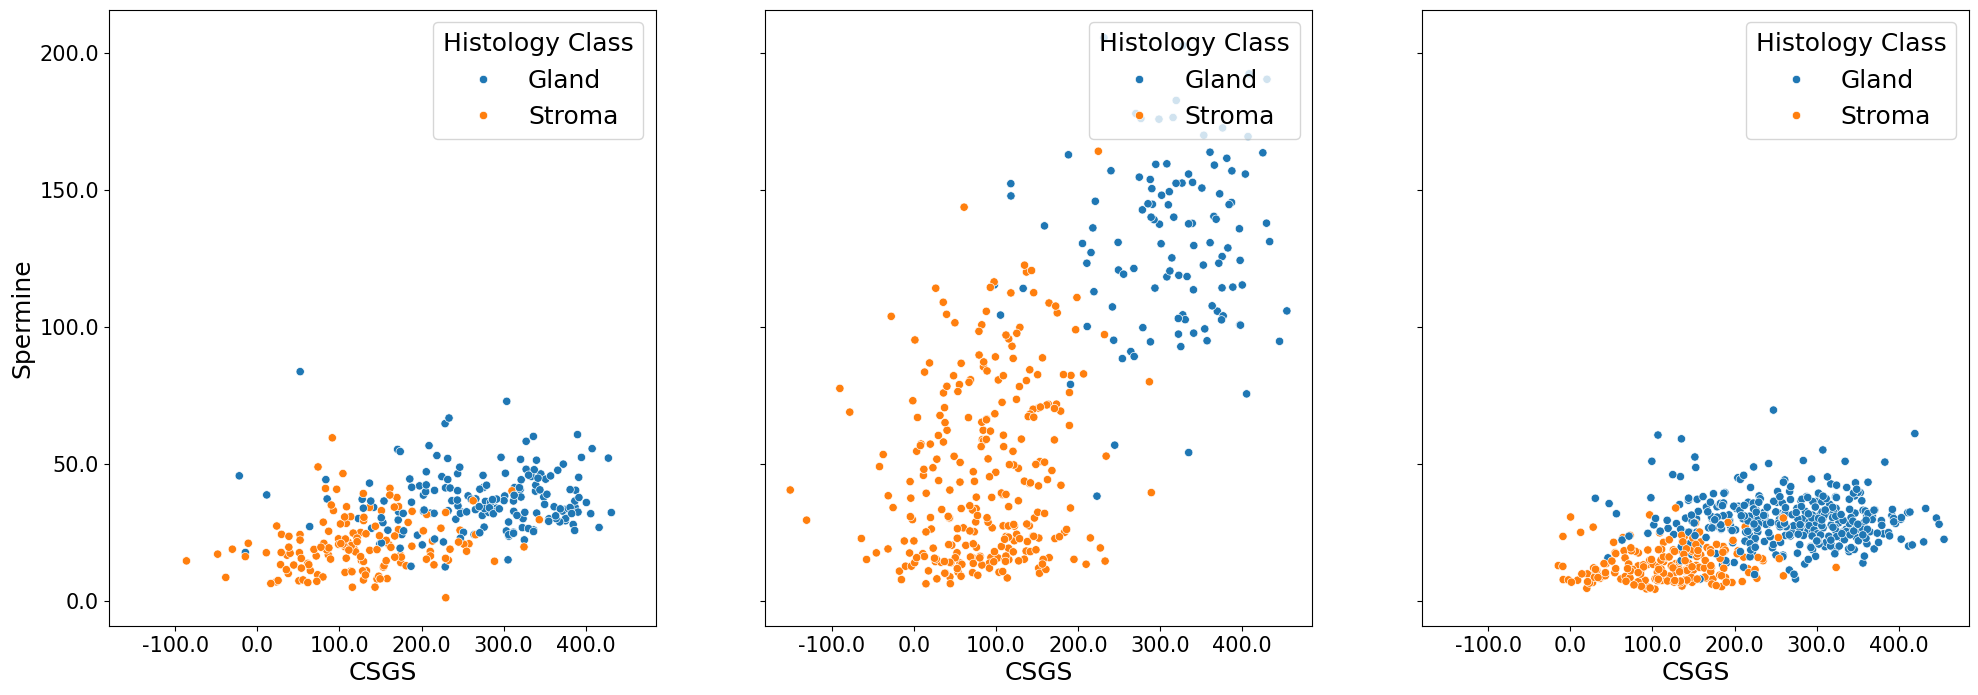

In [176]:
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_names = merged_pos_correct_df_red2.core_name.unique()
core_names = ['001_04', '002_01', '045_03']
_, axs = plt.subplots(1, len(core_names), figsize=(8*len(core_names), 8), sharex=True, sharey=True)
for idx, core_name in enumerate(core_names):
    ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=axs[idx])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Spermine', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
    # plt.savefig('images/citsper_citrate_analysis/scatterplot_csgs_czs.png', transparent=True)

array(['control'], dtype=object)

In [177]:
a = merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name.isin(['001_04', '045_03', '002_01'])]
scipy.stats.spearmanr(a['Citsper'], a['Spermine'])

SignificanceResult(statistic=0.3395274461655546, pvalue=4.076802385013624e-36)

/mnt/scratch/tmp/ipykernel_14160/1614390358.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/1614390358.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/1614390358.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/1614390358.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/1614390358.py:18: U

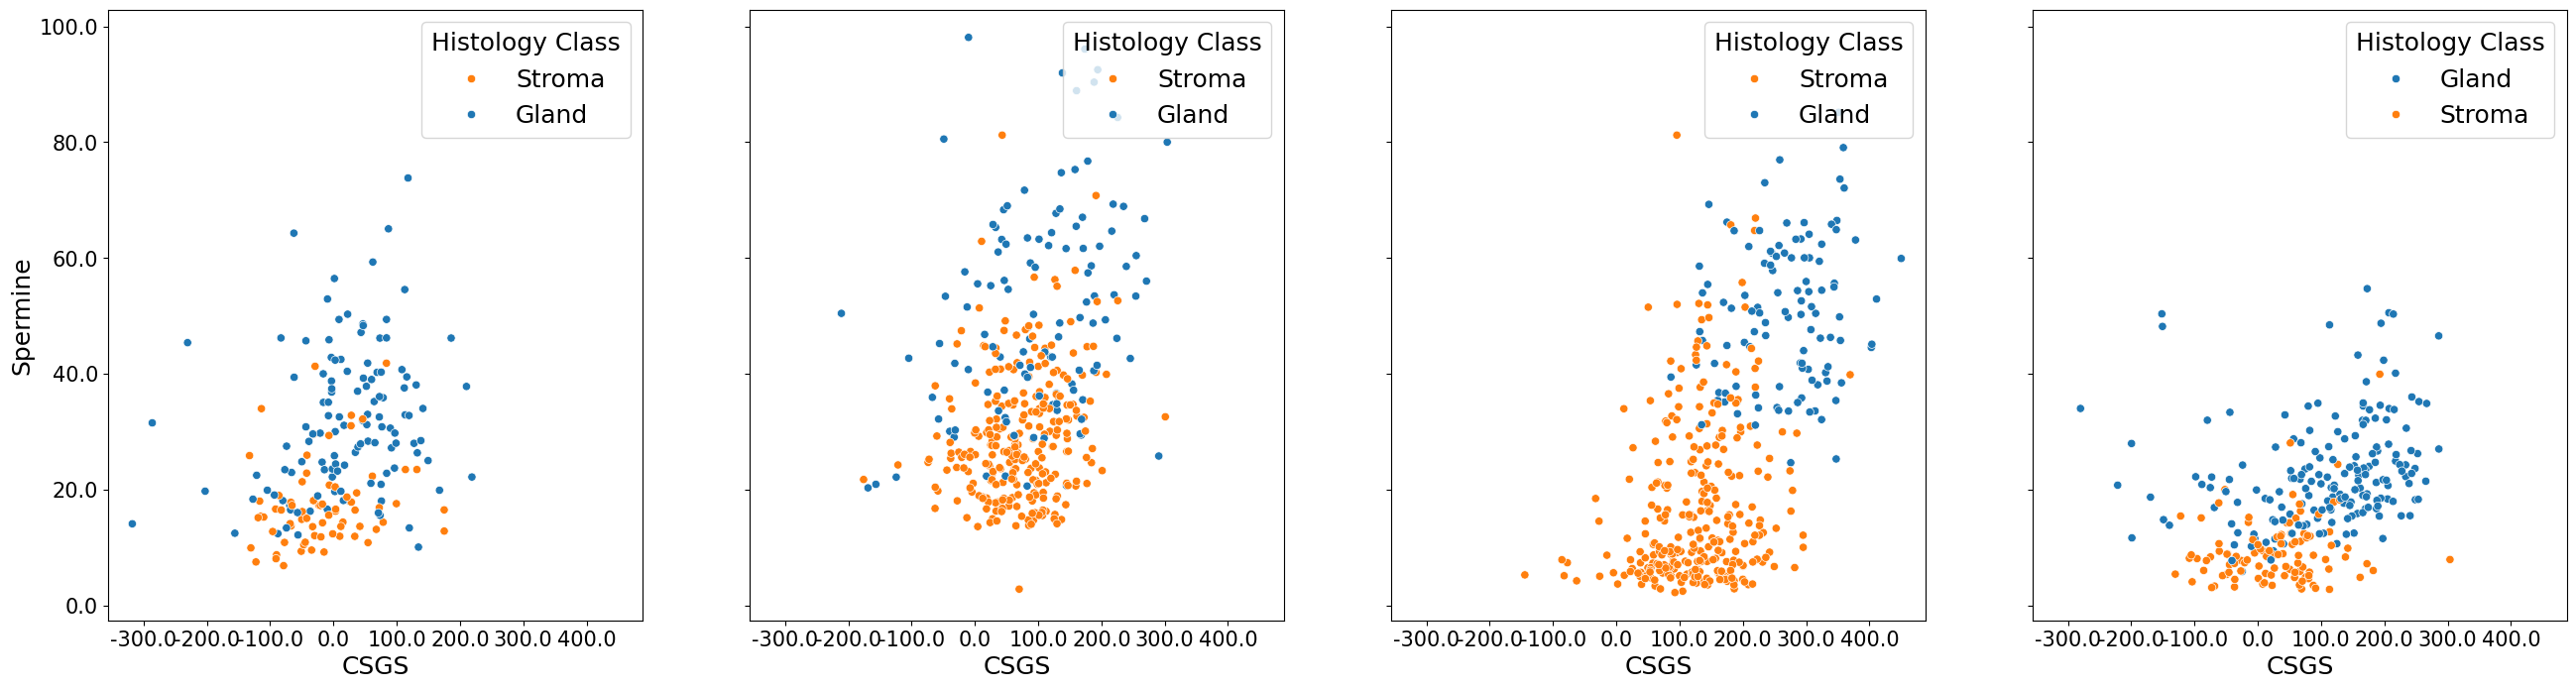

In [178]:
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_names = merged_pos_correct_df_red2.core_name.unique()
core_names = ['003_02', '004_03', '047_04', '048_02']
_, axs = plt.subplots(1, len(core_names), figsize=(8*len(core_names), 8), sharex=True, sharey=True)
for idx, core_name in enumerate(core_names):
    ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name == core_name], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=axs[idx])
    ax.set_xlabel('CSGS', fontsize=fontsize)
    ax.set_ylabel('Spermine', fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
    ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
    # plt.savefig('images/citsper_citrate_analysis/scatterplot_csgs_czs.png', transparent=True)

/mnt/scratch/tmp/ipykernel_14160/2644708739.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2644708739.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2644708739.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
/mnt/scratch/tmp/ipykernel_14160/2644708739.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)


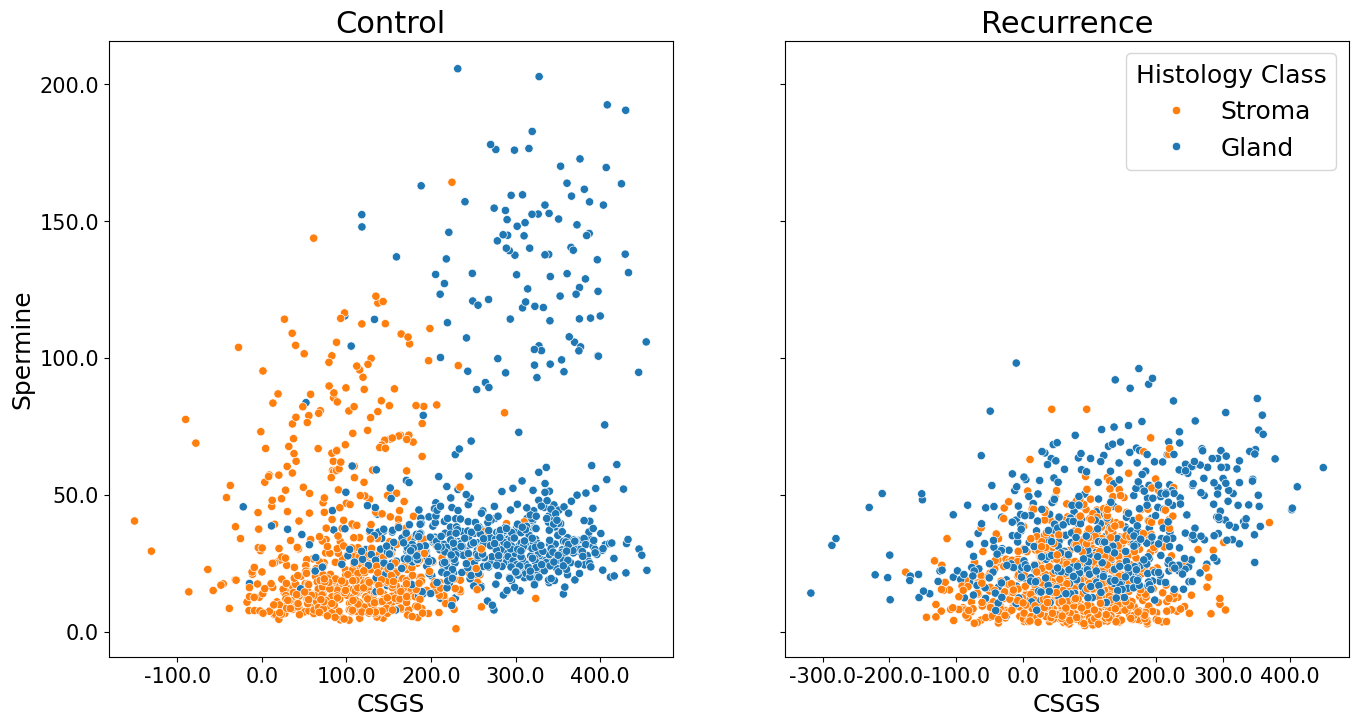

In [179]:
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_names = merged_pos_correct_df_red2.core_name.unique()
core_names = ['001_04', '002_01', '045_03']
_, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name.isin(core_names)], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=axs[0])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Spermine', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
ax.legend([],[], frameon=False)
ax.set_title('Control', fontsize=22)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)

core_names = ['003_02', '004_03', '047_04', '048_02']
ax = sns.scatterplot(data=merged_pos_correct_df_red2[merged_pos_correct_df_red2.core_name.isin(core_names)], x='Citsper', y='Spermine', hue='Histology Class', palette=color_mapping, ax=axs[1])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Spermine', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
ax.set_title('Recurrence', fontsize=22)
plt.savefig('/mnt/scratch/maximilw/data/paper1/plots/citsper_citrate_analysis/scatterplot_csgs_spermine.png', transparent=True)
# plt.savefig('../../images/citsper_citrate_analysis/scatterplot_csgs_spermine.png', transparent=True)

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


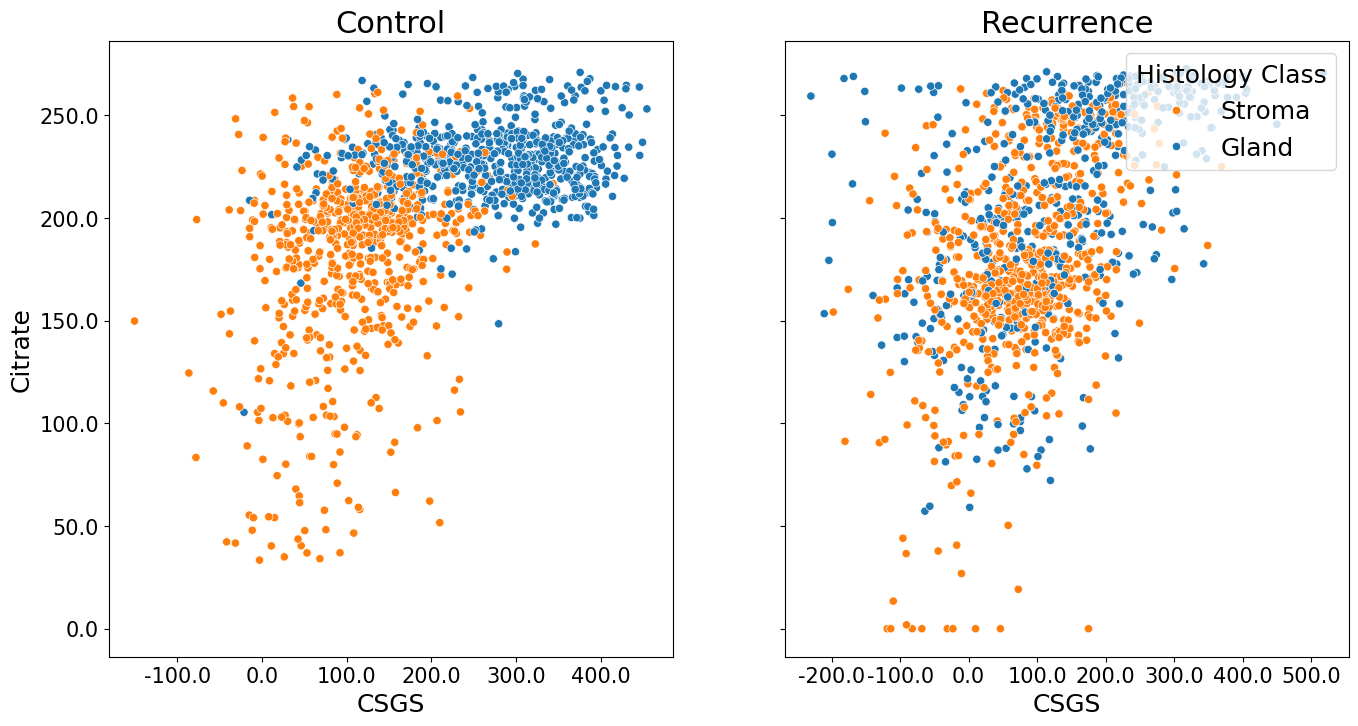

In [159]:
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_names = merged_pos_correct_df_red2.core_name.unique()
core_names = ['001_04', '002_01', '045_03']
_, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name.isin(core_names)], x='Citsper', y='met_Citrate', hue='Histology Class', palette=color_mapping, ax=axs[0])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Citrate', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
ax.set_title('Control', fontsize=22)
sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
ax.legend([],[], frameon=False)

core_names = ['003_02', '004_03', '047_04', '048_02']
ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name.isin(core_names)], x='Citsper', y='met_Citrate', hue='Histology Class', palette=color_mapping, ax=axs[1])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Citrate', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
ax.set_title('Recurrence', fontsize=22)
plt.savefig('../../images/citsper_citrate_analysis/scatterplot_csgs_citrate.png', transparent=True)

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


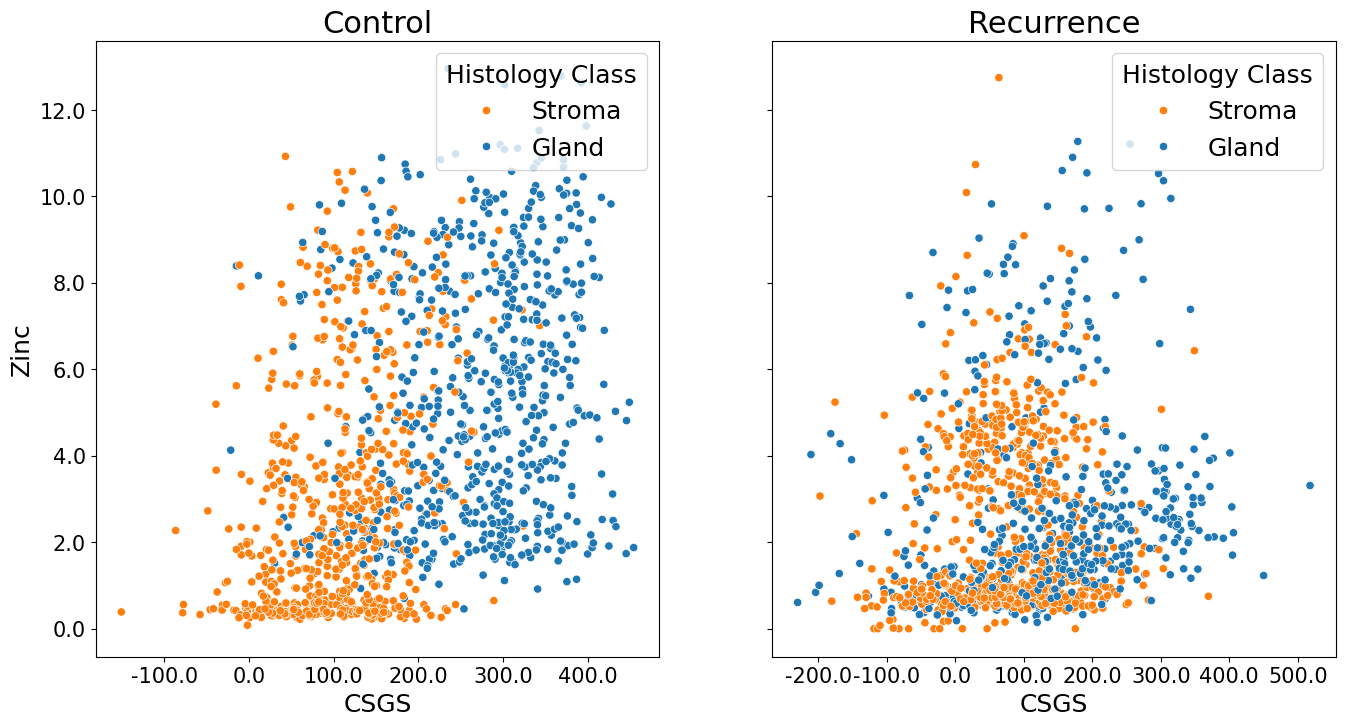

In [160]:
fontsize=18
tick_fontsize=15
standard_color = sns.color_palette()
color_mapping = {}
color_mapping['Stroma'] = standard_color[1]
color_mapping['Gland'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_neg_correct_df[merged_neg_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Stroma'] = standard_color[0]
# merged_pos_correct_df[merged_pos_correct_df['Histology Class'] == 'Non-cancer glands'] = standard_color[1]
core_names = merged_pos_correct_df_red2.core_name.unique()
core_names = ['001_04', '002_01', '045_03']
_, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name.isin(core_names)], x='Citsper', y='met_Zinc', hue='Histology Class', palette=color_mapping, ax=axs[0])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Zinc', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
ax.set_title('Control', fontsize=22)
sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)

core_names = ['003_02', '004_03', '047_04', '048_02']
ax = sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name.isin(core_names)], x='Citsper', y='met_Zinc', hue='Histology Class', palette=color_mapping, ax=axs[1])
ax.set_xlabel('CSGS', fontsize=fontsize)
ax.set_ylabel('Zinc', fontsize=fontsize)
ax.set_yticklabels(ax.get_yticks(), size=tick_fontsize)
ax.set_xticklabels(ax.get_xticks(), size=tick_fontsize)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.legend(title='Histology Class', labels=['Stroma', 'Gland'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper right", fontsize=fontsize, title_fontsize=fontsize)
ax.set_title('Recurrence', fontsize=22)
plt.savefig('../../images/citsper_citrate_analysis/scatterplot_csgs_zinc.png', transparent=True)

In [89]:
# sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == '047_04'], x='Citsper', y='met_Citrate', hue='Histology Class')

<Axes: xlabel='Citsper', ylabel='met_Citrate'>

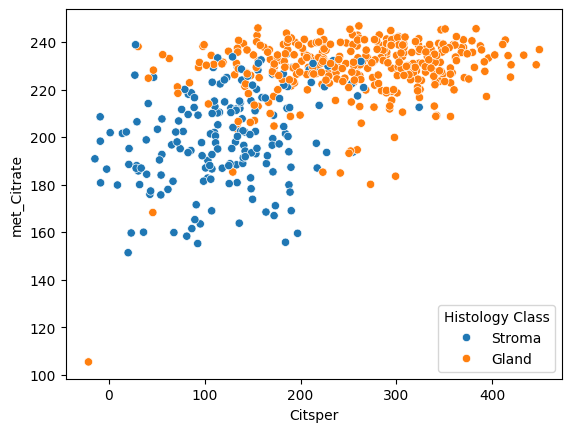

In [161]:
sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == '045_03'], x='Citsper', y='met_Citrate', hue='Histology Class')

<Axes: xlabel='Citsper', ylabel='met_Citrate'>

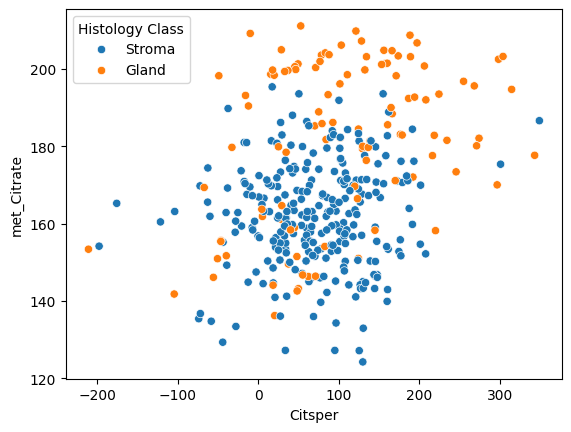

In [162]:
sns.scatterplot(data=merged_neg_correct_df_red2[merged_neg_correct_df_red2.core_name == '004_03'], x='Citsper', y='met_Citrate', hue='Histology Class')

In [77]:
rank_df = pd.read_csv('rankbased_experiments.csv', sep=';', index_col=[0,1])
multi_index = []
for idx in rank_df.index:
    if isinstance(idx[0], str):
        f_idx = idx[0]
        multi_index.append(idx)
        continue
    multi_index.append((f_idx, idx[1]))
multi_index = pd.MultiIndex.from_tuples(multi_index, names=['met', 'exp'])
rank_df.index = multi_index
rank_df

N1  N2  C3  C4  N5  C6  C7
met      exp                            
Citrate  ECM   1   1   1   1   1   1   1
         ECW   3   2   2   2   2   3   2
         EAM   2   3   4   3   3   2   3
         EAW   4   4   3   4   4   4   4
Zinc     ECM   1   1   4   1   1   1   1
         ECW   2   2   3   2   2   3   2
         EAM   3   3   1   3   3   2   3
         EAW   4   4   2   4   4   4   4
Spermine ECM   1   2   1   2   1   1   1
         ECW   2   1   2   1   2   3   2
         EAM   3   3   4   4   3   2   3
         EAW   4   4   3   3   4   4   4

In [180]:
rank_sic_df = pd.read_csv('rank_experiment_significance.csv', sep=';', index_col=[0,1])
multi_index = []
for idx in rank_sic_df.index:
    if isinstance(idx[0], str):
        f_idx = idx[0]
        multi_index.append(idx)
        continue
    multi_index.append((f_idx, idx[1]))
multi_index = pd.MultiIndex.from_tuples(multi_index, names=['met', 'exp'])
rank_sic_df.index = multi_index
rank_sic_df

FileNotFoundError: [Errno 2] No such file or directory: 'rank_experiment_significance.csv'

In [87]:
rank_sic_mat.sum(1)

array([6, 6, 4, 1, 6, 6, 3, 1, 7, 7, 3, 0], dtype=object)

In [79]:
rank_mat = rank_df.to_numpy()
rank_sic_mat = rank_sic_df.to_numpy()

In [81]:
rank_sic_mat[rank_sic_mat == '*'] = 1
rank_sic_mat[rank_sic_mat != 1] = 0
rank_sic_mat

array([[1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [84]:
joined_rank_mat = rank_mat * rank_sic_mat
for i in range(joined_rank_mat.shape[0]):
    row = joined_rank_mat[i, :]
    row = row[row != 0]
    print(row.mean())

1.0
2.3333333333333335
2.5
4.0
1.0
2.1666666666666665
2.6666666666666665
4.0
1.2857142857142858
1.8571428571428572
2.6666666666666665
nan


Mean of empty slice.
invalid value encountered in scalar divide


In [85]:
joined_rank_mat

array([[1, 1, 0, 1, 1, 1, 1],
       [3, 2, 0, 2, 2, 3, 2],
       [2, 3, 0, 0, 3, 2, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [1, 1, 0, 1, 1, 1, 1],
       [2, 2, 0, 2, 2, 3, 2],
       [3, 3, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [1, 2, 1, 2, 1, 1, 1],
       [2, 1, 2, 1, 2, 3, 2],
       [3, 0, 0, 0, 3, 2, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [109]:
all_stats[all_stats.metabolite == 'citrate'][['Dataset', 'sample_id', 'Spearman correlation', 'pvalue']].to_csv('corr_citrate.csv')
all_stats[all_stats.metabolite == 'zinc'][['Dataset', 'sample_id', 'Spearman correlation', 'pvalue']].to_csv('corr_zinc.csv')
all_stats[all_stats.metabolite == 'spermine'][['Dataset', 'sample_id', 'Spearman correlation', 'pvalue']].to_csv('corr_spermine.csv')

In [171]:
all_stats

Spearman correlation     pvalue    n            Dataset type core_id  \
001_04                 0.573  1.053e-33  371            IntMatchHist  001_04   
002_01                 0.601  8.019e-39  381            IntMatchHist  002_01   
003_02                 0.200  5.319e-03  192            IntMatchHist  003_02   
004_03                 0.237  4.303e-06  369            IntMatchHist  004_03   
045_03                 0.539  2.762e-42  543            IntMatchHist  045_03   
...                      ...        ...  ...                     ...     ...   
003_02                -0.098  5.305e-02  388  ArtIntWithoutMatchHist  003_02   
004_03                 0.107  2.129e-02  464  ArtIntWithoutMatchHist  004_03   
045_03                 0.115  3.497e-03  643  ArtIntWithoutMatchHist  045_03   
047_04                 0.098  1.748e-02  591  ArtIntWithoutMatchHist  047_04   
048_02                -0.050  3.369e-01  375  ArtIntWithoutMatchHist  048_02   

       sample_id background metabolite         Experiment type  \
001_04     P06_7        C03    citrate            IntMatchHist   
002_01     P04_3        C03    citrate            IntMatchHist   
003_02     P08_3        C03    citrate            IntMatchHist   
004_03     P07_7        C03    citrate            IntMatchHist   
045_03     P28_3        C03    citrate            IntMatchHist   
...          ...        ...        ...                     ...   
003_02     P08_3        NaN   spermine  ArtIntWithoutMatchHist   
004_03     P07_7        NaN   spermine  ArtIntWithoutMatchHist   
045_03     P28_3        NaN   spermine  ArtIntWithoutMatchHist   
047_04     P30_4        NaN   spermine  ArtIntWithoutMatchHist   
048_02     P22_4        NaN   spermine  ArtIntWithoutMatchHist   

                       Dataset  z_transformed_correlations  
001_04            IntMatchHist                       0.651  
002_01            IntMatchHist                       0.695  
003_02            IntMatchHist                       0.203  
004_03            IntMatchHist                       0.241  
045_03            IntMatchHist                       0.603  
...                        ...                         ...  
003_02  ArtIntWithoutMatchHist                      -0.099  
004_03  ArtIntWithoutMatchHist                       0.107  
045_03  ArtIntWithoutMatchHist                       0.116  
047_04  ArtIntWithoutMatchHist                       0.098  
048_02  ArtIntWithoutMatchHist                      -0.050  

[84 rows x 11 columns]

In [114]:
temp_df = pd.read_csv('comparison_correct_artificial_integration.csv')
temp_df[temp_df.metabolite == 'citrate']

metabolite sample_id  Spearman correlation_y  Spearman correlation_x  n_y  \
0    citrate     P06_7                   0.260                   0.564  542   
1    citrate     P04_3                   0.419                   0.613  656   
2    citrate     P08_3                   0.007                   0.083  406   
3    citrate     P07_7                   0.236                   0.276  522   
4    citrate     P28_3                   0.481                   0.528  717   
5    citrate     P30_4                   0.329                   0.599  621   
6    citrate     P22_4                   0.384                   0.400  370   

   n_x  diff_pvalues  
0  323     6.344e-08  
1  397     1.388e-05  
2  189     1.937e-01  
3  362     2.643e-01  
4  568     1.300e-01  
5  418     1.955e-08  
6  281     4.044e-01

In [117]:
all_stats[all_stats['Dataset type'] == 'IntMatchHist']['Spearman correlation'].mean()

0.42365835465548196

In [118]:
a = all_stats[all_stats['Dataset type'] == 'IntWithoutMatchHist']['Spearman correlation']

0.29596135359204423

In [125]:
fisher_df[(fisher_df.scrExp == 'IntMatchHist') & (fisher_df.dstExp == 'IntWithoutMatchHist') & (fisher_df.metabolite == 'citrate')]

sample_id metabolite        scrExp               dstExp  statistic  \
2      P06_7    citrate  IntMatchHist  IntWithoutMatchHist      5.283   
18     P04_3    citrate  IntMatchHist  IntWithoutMatchHist      4.191   
34     P08_3    citrate  IntMatchHist  IntWithoutMatchHist      0.864   
50     P07_7    citrate  IntMatchHist  IntWithoutMatchHist      0.630   
66     P28_3    citrate  IntMatchHist  IntWithoutMatchHist      1.126   
82     P30_4    citrate  IntMatchHist  IntWithoutMatchHist      5.495   
98     P22_4    citrate  IntMatchHist  IntWithoutMatchHist      0.242   

   distribution  pvalue  
2             z   1.000  
18            z   1.000  
34            z   0.806  
50            z   0.736  
66            z   0.870  
82            z   1.000  
98            z   0.596

In [121]:
fisher_df

sample_id metabolite                  scrExp                  dstExp  \
1       P06_7    citrate            IntMatchHist            IntMatchHist   
2       P06_7    citrate            IntMatchHist     IntWithoutMatchHist   
3       P06_7    citrate            IntMatchHist         ArtIntMatchHist   
4       P06_7    citrate            IntMatchHist  ArtIntWithoutMatchHist   
5       P06_7    citrate     IntWithoutMatchHist            IntMatchHist   
..        ...        ...                     ...                     ...   
332     P22_4   spermine         ArtIntMatchHist  ArtIntWithoutMatchHist   
333     P22_4   spermine  ArtIntWithoutMatchHist            IntMatchHist   
334     P22_4   spermine  ArtIntWithoutMatchHist     IntWithoutMatchHist   
335     P22_4   spermine  ArtIntWithoutMatchHist         ArtIntMatchHist   
336     P22_4   spermine  ArtIntWithoutMatchHist  ArtIntWithoutMatchHist   

     statistic distribution     pvalue  
1        0.000            z  5.000e-01  
2        5.283            z  1.000e+00  
3        3.445            z  9.997e-01  
4        9.303            z  1.000e+00  
5       -5.283            z  6.344e-08  
..         ...          ...        ...  
332      2.484            z  9.935e-01  
333     -9.190            z  1.956e-20  
334     -9.134            z  3.304e-20  
335     -2.484            z  6.497e-03  
336      0.000            z  5.000e-01  

[336 rows x 7 columns]